# Prediksi Churn Risk Score Website HackerEarth (Website yang menyediakan technical hiring bagi suatu Organisasi/Perusahaan dan jasa coding online untuk developers) Menggunakan Permodelan Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import sklearn.base as skb
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import sklearn.utils as sku
import sklearn.linear_model as sklm
import sklearn.neighbors as skn
import sklearn.ensemble as ske
from sklearn.preprocessing import LabelEncoder
import scipy.stats as sstats
from datetime import date
from scipy.stats import norm
from scipy import stats
import os

ModuleNotFoundError: No module named 'matplotlib'

# **1. IMPORT DATA**

In [3]:
df = pd.read_csv('churn.csv')

# ASUMSI MENGGUNAKAN BEBERAPA KOLOM SAJA SEHINGGA TIDAK MEMAKAN WAKTU YANG LAMA KETIKA RUN PEMODELAN.

Berikut kolom yang dipilih (16 kolom)

In [4]:
selected_col=['customer_id','age','gender','region_category','membership_category',
              'joined_through_referral','avg_time_spent','avg_transaction_value',
              'avg_frequency_login_days','points_in_wallet','used_special_discount',
              'offer_application_preference','past_complaint','complaint_status',
              'feedback','churn_risk_score']
df=df[selected_col]
df

customer_id  age gender region_category  \
0          fffe4300490044003600300030003800   18      F         Village   
1      fffe43004900440032003100300035003700   32      F            City   
2          fffe4300490044003100390032003600   44      F            Town   
3      fffe43004900440036003000330031003600   37      M            City   
4      fffe43004900440031003900350030003600   31      F            City   
...                                     ...  ...    ...             ...   
36987  fffe43004900440035003500390036003100   46      F             NaN   
36988  fffe43004900440033003500380036003600   29      F            Town   
36989      fffe4300490044003500330034003100   23      F             NaN   
36990  fffe43004900440031003200390039003000   53      M         Village   
36991  fffe43004900440033003600340034003200   35      M            Town   

       membership_category joined_through_referral  avg_time_spent  \
0      Platinum Membership                      No      300.630000   
1       Premium Membership                       ?      306.340000   
2            No Membership                     Yes      516.160000   
3            No Membership                     Yes       53.270000   
4            No Membership                      No      113.130000   
...                    ...                     ...             ...   
36987     Basic Membership                      No     -650.682759   
36988     Basic Membership                      No     -638.123421   
36989     Basic Membership                     Yes      154.940000   
36990  Platinum Membership                      No      482.610000   
36991    Silver Membership                      No       79.180000   

       avg_transaction_value avg_frequency_login_days  points_in_wallet  \
0                   53005.25                     17.0        781.750000   
1                   12838.38                     10.0               NaN   
2                   21027.00                     22.0        500.690000   
3                   25239.56                      6.0        567.660000   
4                   24483.66                     16.0        663.060000   
...                      ...                      ...               ...   
36987               27277.68                      6.0        639.510000   
36988               11069.71                     28.0        527.990000   
36989               38127.56                    Error        680.470000   
36990                2378.86                     20.0        197.264414   
36991                2189.68                    Error        719.970000   

      used_special_discount offer_application_preference past_complaint  \
0                       Yes                          Yes             No   
1                       Yes                           No            Yes   
2                        No                          Yes            Yes   
3                        No                          Yes            Yes   
4                        No                          Yes            Yes   
...                     ...                          ...            ...   
36987                    No                          Yes            Yes   
36988                   Yes                           No             No   
36989                    No                          Yes            Yes   
36990                   Yes                          Yes             No   
36991                   Yes                           No             No   

               complaint_status                  feedback  churn_risk_score  
0                Not Applicable  Products always in Stock                 2  
1                        Solved     Quality Customer Care                 1  
2           Solved in Follow-up              Poor Website                 5  
3                      Unsolved              Poor Website                 5  
4                        Solved              Poor Website                 5  
...                 

# **2. DATA UNDERSTANDING**

In [ ]:
df.head()

customer_id  age gender region_category  \
0      fffe4300490044003600300030003800   18      F         Village   
1  fffe43004900440032003100300035003700   32      F            City   
2      fffe4300490044003100390032003600   44      F            Town   
3  fffe43004900440036003000330031003600   37      M            City   
4  fffe43004900440031003900350030003600   31      F            City   

   membership_category joined_through_referral  avg_time_spent  \
0  Platinum Membership                      No          300.63   
1   Premium Membership                       ?          306.34   
2        No Membership                     Yes          516.16   
3        No Membership                     Yes           53.27   
4        No Membership                      No          113.13   

   avg_transaction_value avg_frequency_login_days  points_in_wallet  \
0               53005.25                     17.0            781.75   
1               12838.38                     10.0               NaN   
2               21027.00                     22.0            500.69   
3               25239.56                      6.0            567.66   
4               24483.66                     16.0            663.06   

  used_special_discount offer_application_preference past_complaint  \
0                   Yes                          Yes             No   
1                   Yes                           No            Yes   
2                    No                          Yes            Yes   
3                    No                          Yes            Yes   
4                    No                          Yes            Yes   

      complaint_status                  feedback  churn_risk_score  
0       Not Applicable  Products always in Stock                 2  
1               Solved     Quality Customer Care                 1  
2  Solved in Follow-up              Poor Website                 5  
3             Unsolved              Poor Website                 5  
4               Solved              Poor Website                 5

In [ ]:
df.columns

Index(['customer_id', 'age', 'gender', 'region_category',
       'membership_category', 'joined_through_referral', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'complaint_status', 'feedback', 'churn_risk_score'],
      dtype='object')

In [ ]:
df.describe()

age  avg_time_spent  avg_transaction_value  points_in_wallet  \
count  36992.000000    36992.000000           36992.000000      33549.000000   
mean      37.118161      243.472334           29271.194003        686.882199   
std       15.867412      398.289149           19444.806226        194.063624   
min       10.000000    -2814.109110             800.460000       -760.661236   
25%       23.000000       60.102500           14177.540000        616.150000   
50%       37.000000      161.765000           27554.485000        697.620000   
75%       51.000000      356.515000           40855.110000        763.950000   
max       64.000000     3235.578521           99914.050000       2069.069761   

       churn_risk_score  
count      36992.000000  
mean           3.463397  
std            1.409661  
min           -1.000000  
25%            3.000000  
50%            4.000000  
75%            5.000000  
max            5.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   age                           36992 non-null  int64  
 2   gender                        36992 non-null  object 
 3   region_category               31564 non-null  object 
 4   membership_category           36992 non-null  object 
 5   joined_through_referral       36992 non-null  object 
 6   avg_time_spent                36992 non-null  float64
 7   avg_transaction_value         36992 non-null  float64
 8   avg_frequency_login_days      36992 non-null  object 
 9   points_in_wallet              33549 non-null  float64
 10  used_special_discount         36992 non-null  object 
 11  offer_application_preference  36992 non-null  object 
 12  past_complaint                36992 non-null  object 
 13  c

In [ ]:
df.shape

(36992, 16)

In [ ]:
# check for duplicates
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(36992, 16)
(36992, 16)


# **3. Exploratory Data Analysis**

In [ ]:
num_col = df.select_dtypes(include=[np.number])
cat_col = ['gender', 'region_category', 'membership_category', 'joined_through_referral',
            'complaint_status', 'feedback']


### **3.1 DISTRIBUSI VARIABEL NUMERIK**

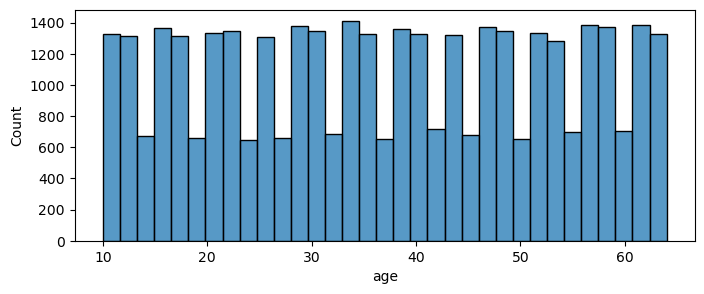

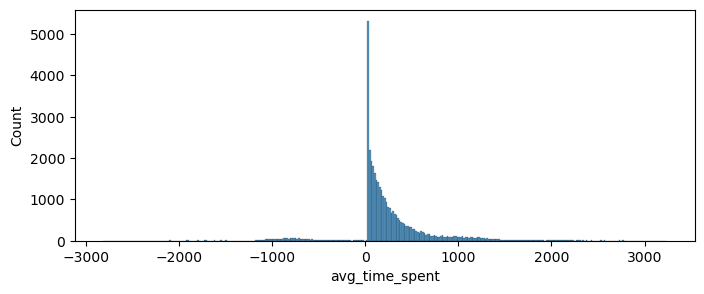

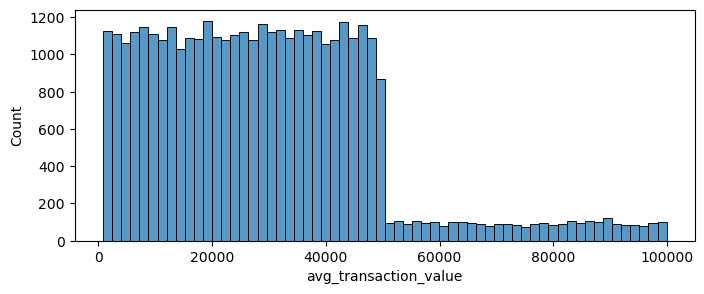

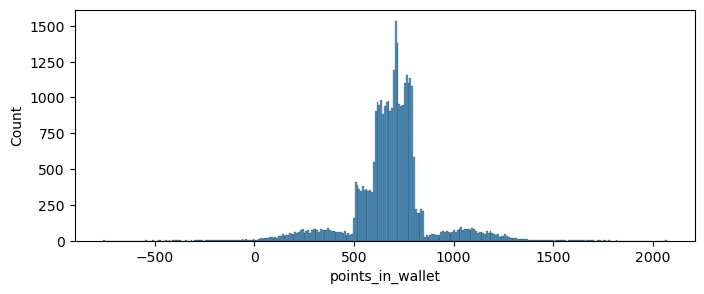

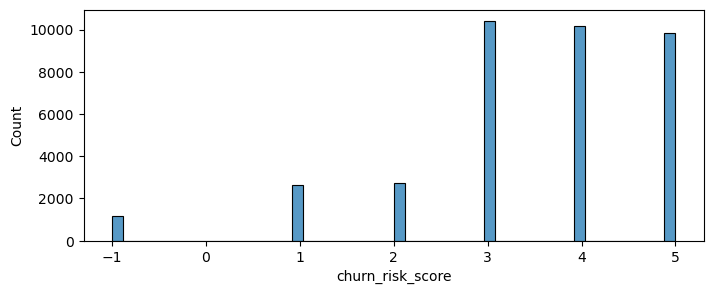

In [ ]:
for numerical in num_col:
    plt.figure(figsize=(8, 3))
    sns.histplot(data=df, x=numerical)
    plt.savefig(f"{numerical}.png")

In [ ]:
skewed_features = df.select_dtypes(include=[np.number]).apply(pd.Series.skew).sort_values(ascending=False)
skewed_features

avg_transaction_value    1.011027
avg_time_spent           0.539624
age                     -0.007319
points_in_wallet        -0.080309
churn_risk_score        -1.114305
dtype: float64

### **3.2 DISTRIBUSI VARIABEL KATEGORIS**

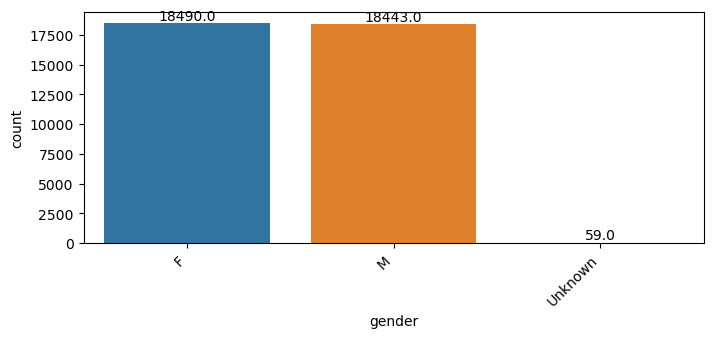

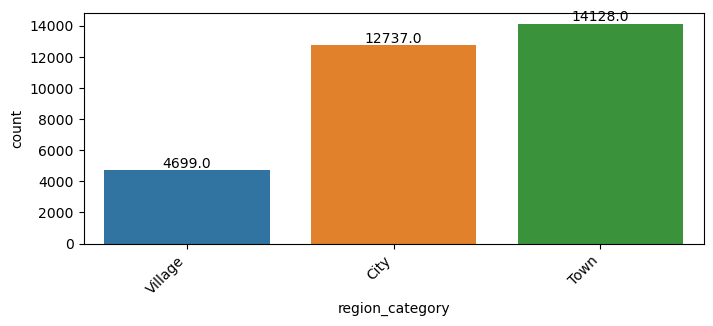

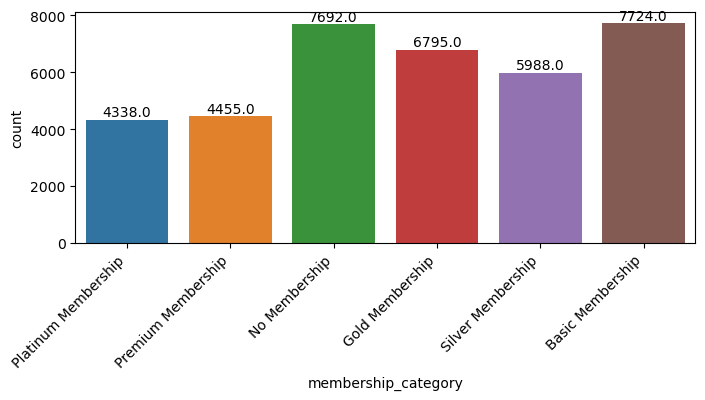

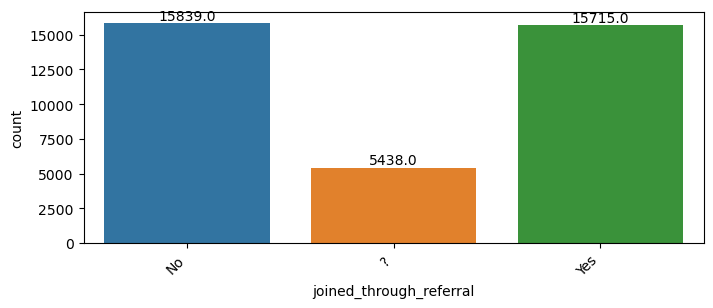

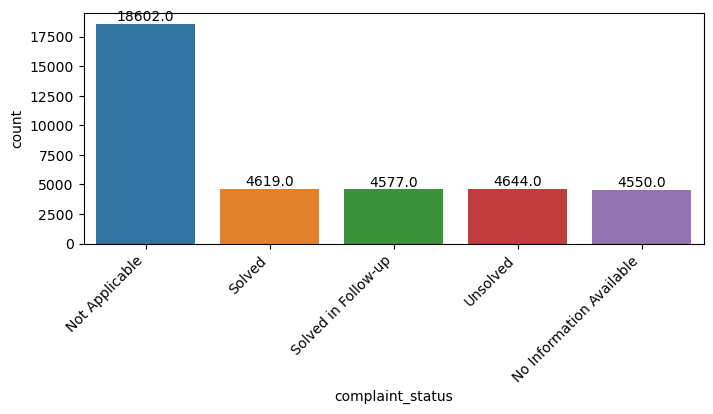

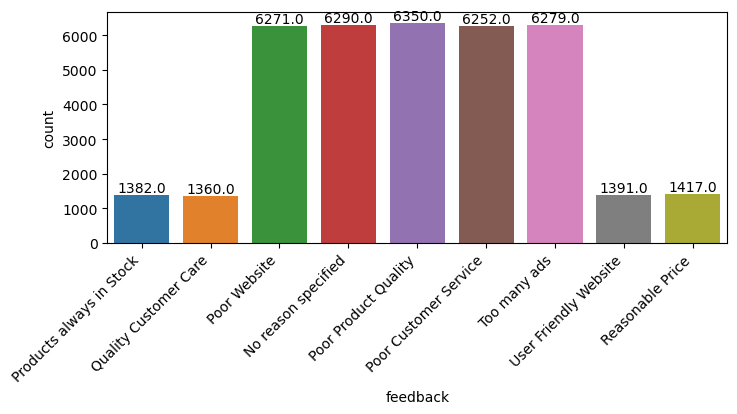

In [ ]:
output_folder = "countplots_kategoris"
os.makedirs(output_folder, exist_ok=True)

for category in cat_col:
    plt.figure(figsize=(8, 3))
    ax = sns.countplot(data=df, x=category)

    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')


    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


    output_path = os.path.join(output_folder, f"{category}.png")
    plt.savefig(output_path)

plt.show()

### **3.3 SCATTER PLOT**

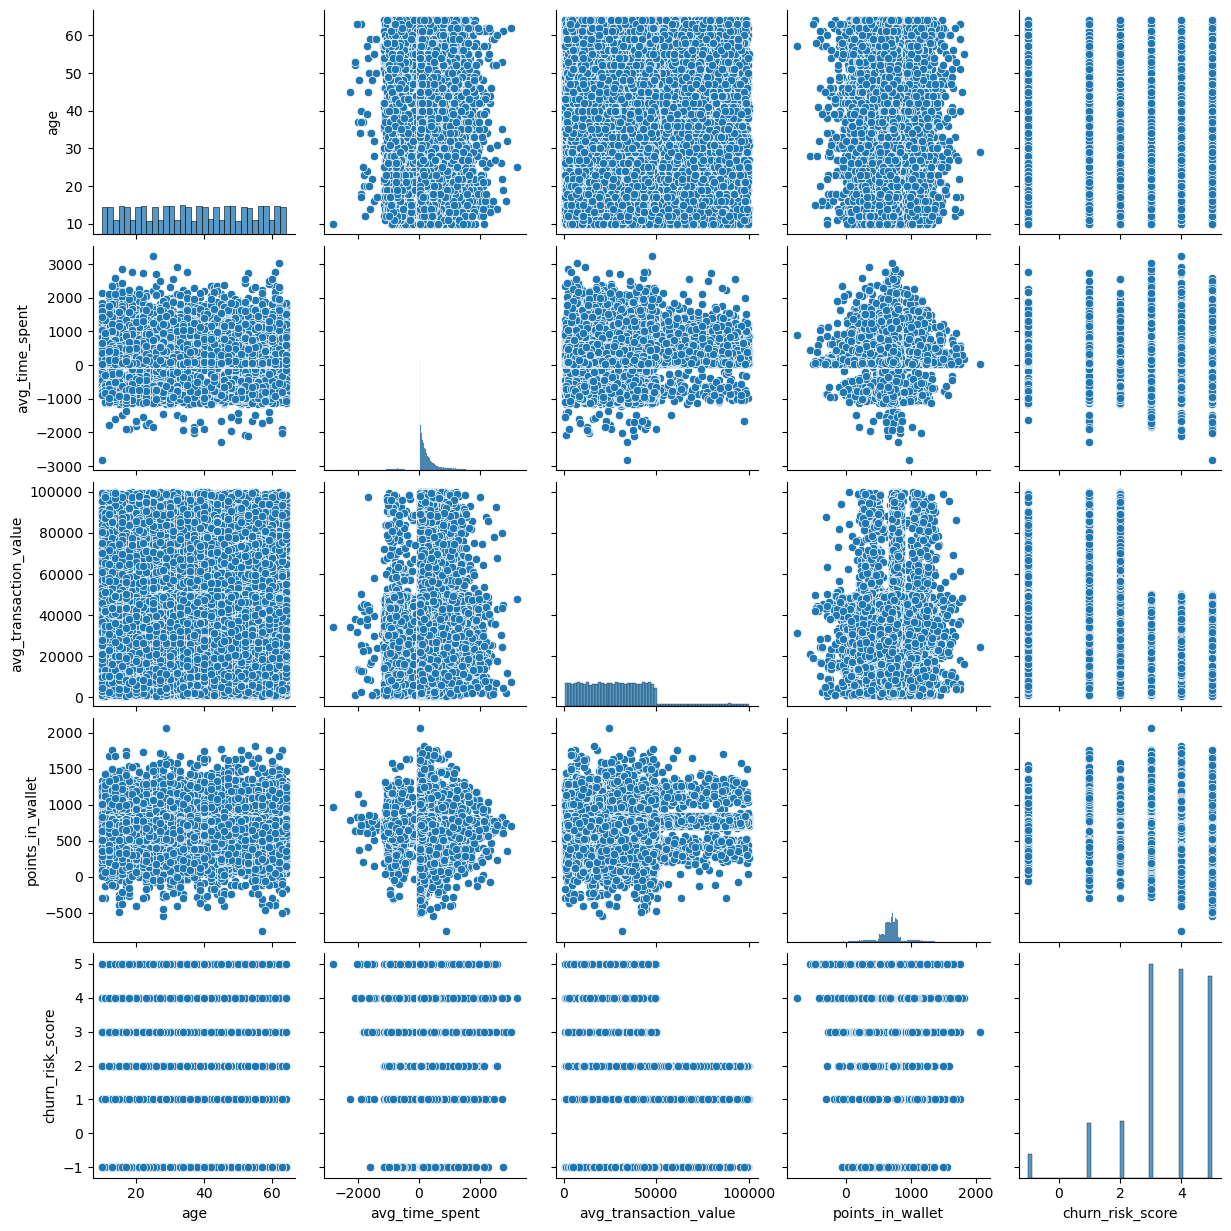

In [ ]:
sns.pairplot(df)
plt.show()

<AxesSubplot:xlabel='churn_risk_score', ylabel='points_in_wallet'>

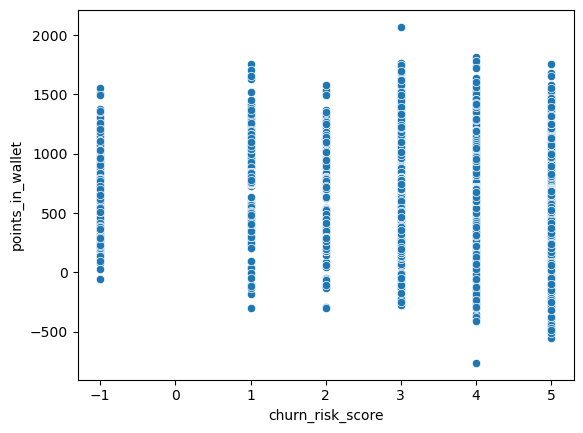

In [ ]:
sns.scatterplot(x='churn_risk_score',y='points_in_wallet',data=df)

### **3.4 HEATMAP CORRELATION**

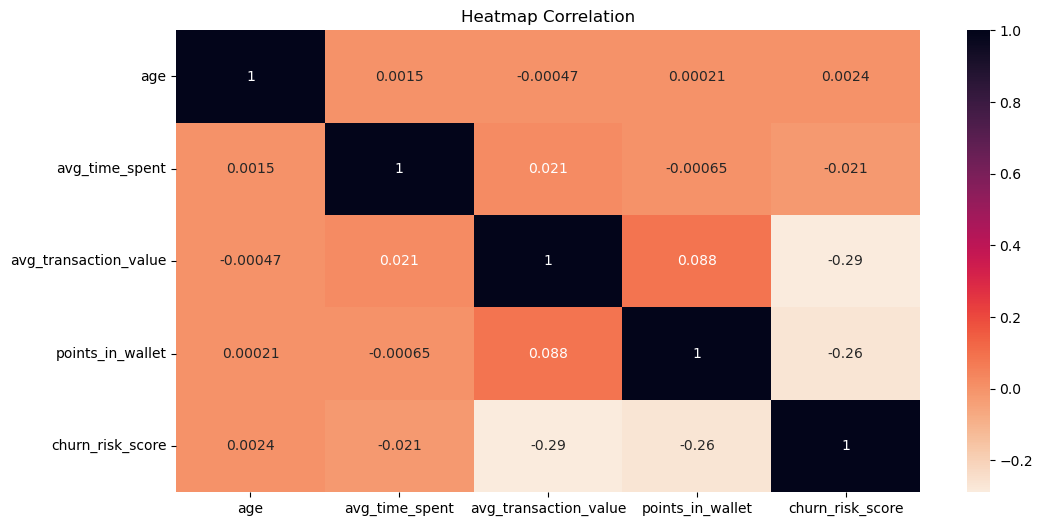

In [ ]:
# correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap=sns.cm.rocket_r)
plt.title("Heatmap Correlation")
plt.show()

### **3.5 MISSING VALUES**

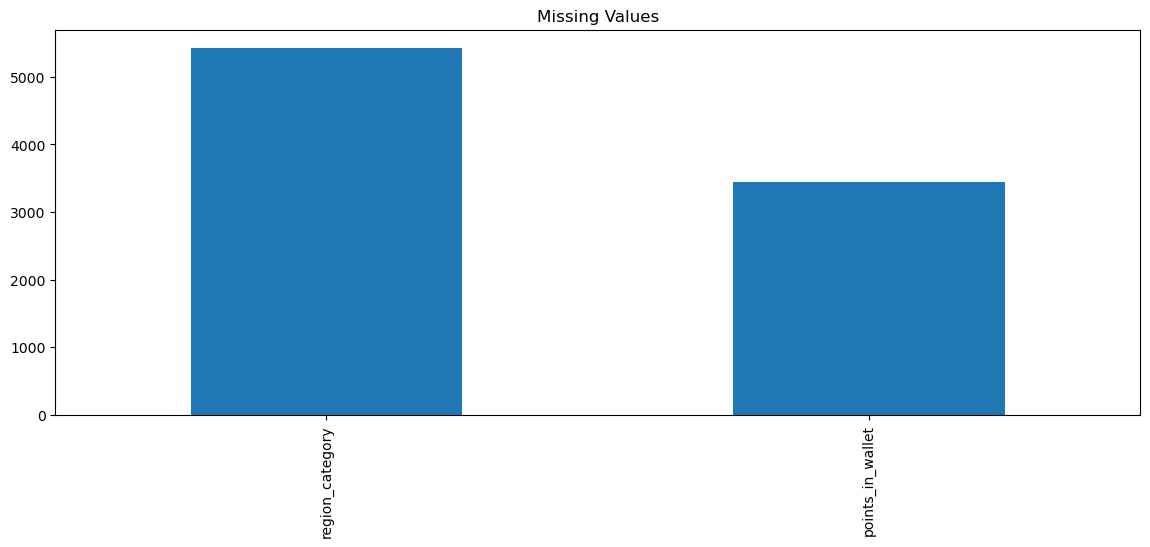

In [ ]:
# plot missing values

def calc_missing(df):
    missing = df.isna().sum().sort_values(ascending=False)
    missing = missing[missing != 0]
    missing_perc = missing/df.shape[0]*100
    return missing, missing_perc

if df.isna().any().sum()>0:
    missing, missing_perc = calc_missing(df)
    missing.plot(kind='bar',figsize=(14,5))
    plt.title('Missing Values')
    plt.show()
else:
    print("No Missing Values")

### **3.6 BOXPLOT NUMERIK UNTUK DETEKSI OUTLIER**

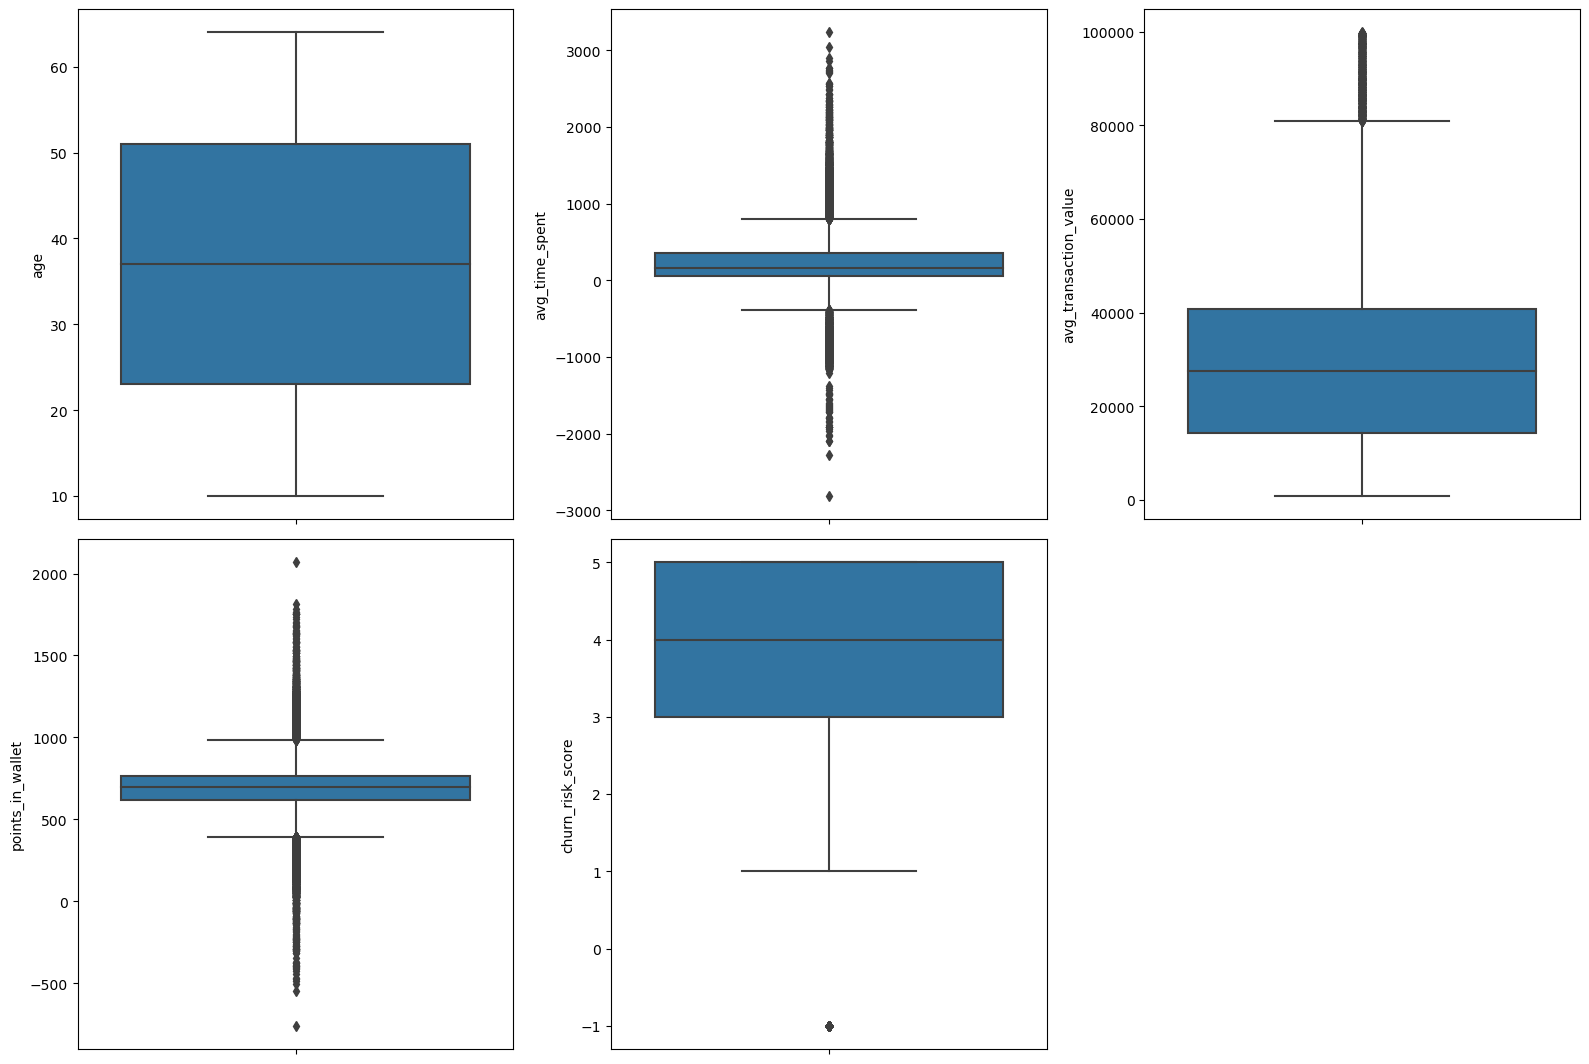

In [ ]:
fig = plt.figure(figsize=(16,16))
for i in range(len(num_col.columns)):
    fig.add_subplot(3, 3, i+1)
    sns.boxplot(y=num_col.iloc[:,i])
plt.tight_layout()
plt.show()

# **4. PRA PEMROSESAN (DATA CLEANING)**

In [ ]:
# remove all columns having no values
df.dropna(axis=1, how="all", inplace=True)
df.dropna(axis=0, how="all", inplace=True)
df.shape

(36992, 16)

### **4.1 MENGISI MISSING VALUE**

**1. region_category (mengisi missing value dengan modus dari variabel region_category)**

In [ ]:
df['region_category'].isna().any()

True

In [ ]:
df['region_category']

0        Village
1           City
2           Town
3           City
4           City
          ...   
36987        NaN
36988       Town
36989        NaN
36990    Village
36991       Town
Name: region_category, Length: 36992, dtype: object

In [ ]:
def fillNan(df, col, value):
    df[col].fillna(value, inplace=True)

# setting missing values to most occurring values
fillNan(df, 'region_category', df['region_category'].mode()[0])

In [ ]:
df['region_category']

0        Village
1           City
2           Town
3           City
4           City
          ...   
36987       Town
36988       Town
36989       Town
36990    Village
36991       Town
Name: region_category, Length: 36992, dtype: object

In [ ]:
df['region_category'].isna().any()

False

**2. points_in_wallet (mengisi missing value dengan rata-rata data)**

In [ ]:
df['points_in_wallet'].isna().any()

True

In [ ]:
df['points_in_wallet']

0        781.750000
1               NaN
2        500.690000
3        567.660000
4        663.060000
            ...    
36987    639.510000
36988    527.990000
36989    680.470000
36990    197.264414
36991    719.970000
Name: points_in_wallet, Length: 36992, dtype: float64

In [ ]:
# setting missing values to most occurring values
fillNan(df, 'points_in_wallet', df['points_in_wallet'].mean())
df['points_in_wallet'].isna().any()

False

**3. joined_through_referral (mengganti value "?" dengan "No")**

In [ ]:
# setting missing values to most occurring values
df['joined_through_referral'].unique()

array(['No', '?', 'Yes'], dtype=object)

In [ ]:
def replace_question_mark(value):
    if value == '?':
        return 'No'
    return value

df['joined_through_referral'] = df['joined_through_referral'].apply(replace_question_mark)

print(df['joined_through_referral'].unique())

['No' 'Yes']


### **4. avg_frequency_login_days (mengganti nilai "Error" dengan "0")**

In [ ]:
df['avg_frequency_login_days']

0         17.0
1         10.0
2         22.0
3          6.0
4         16.0
         ...  
36987      6.0
36988     28.0
36989    Error
36990     20.0
36991    Error
Name: avg_frequency_login_days, Length: 36992, dtype: object

In [ ]:
df['avg_frequency_login_days'].describe()

count     36992
unique     1654
top       Error
freq       3522
Name: avg_frequency_login_days, dtype: object

In [ ]:
# setting missing values to most occurring values
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].apply(lambda x:0 if x == 'Error' else x)
df['avg_frequency_login_days'].describe()

count     36992
unique     1654
top           0
freq       3522
Name: avg_frequency_login_days, dtype: int64

In [ ]:
#ubah data  menjadi numeric
df['avg_frequency_login_days'] = pd.to_numeric(df['avg_frequency_login_days'])
df['avg_frequency_login_days'].describe()

count    36992.000000
mean        14.455576
std          9.941579
min        -43.652702
25%          7.000000
50%         14.000000
75%         22.000000
max         73.061995
Name: avg_frequency_login_days, dtype: float64

In [ ]:
df.isna().any().sum()

0

### **4.2 Pada kolom target terdapat data -1 yang akan diubah menjadi 1 sehingga tidak terdapat nilai "-" (minus), karena churn risk score -1 memiliki arti risiko untuk berhenti berlangganan (churn) rendah sehingga disatukan/digolongkan bersama nilai 1.**

In [ ]:
#mengubah nilai churn rate -1 jadi 1
df['churn_risk_score'] = df['churn_risk_score'].apply(lambda x:1 if x == -1 else x)
df['churn_risk_score'].unique()

array([2, 1, 5, 3, 4], dtype=int64)

### **4.3 Menghapus fitur yang tidak diperlukan dalam pemodelan**

In [ ]:
df.head()

customer_id  age gender region_category  \
0      fffe4300490044003600300030003800   18      F         Village   
1  fffe43004900440032003100300035003700   32      F            City   
2      fffe4300490044003100390032003600   44      F            Town   
3  fffe43004900440036003000330031003600   37      M            City   
4  fffe43004900440031003900350030003600   31      F            City   

   membership_category joined_through_referral  avg_time_spent  \
0  Platinum Membership                      No          300.63   
1   Premium Membership                      No          306.34   
2        No Membership                     Yes          516.16   
3        No Membership                     Yes           53.27   
4        No Membership                      No          113.13   

   avg_transaction_value  avg_frequency_login_days  points_in_wallet  \
0               53005.25                      17.0        781.750000   
1               12838.38                      10.0        686.882199   
2               21027.00                      22.0        500.690000   
3               25239.56                       6.0        567.660000   
4               24483.66                      16.0        663.060000   

  used_special_discount offer_application_preference past_complaint  \
0                   Yes                          Yes             No   
1                   Yes                           No            Yes   
2                    No                          Yes            Yes   
3                    No                          Yes            Yes   
4                    No                          Yes            Yes   

      complaint_status                  feedback  churn_risk_score  
0       Not Applicable  Products always in Stock                 2  
1               Solved     Quality Customer Care                 1  
2  Solved in Follow-up              Poor Website                 5  
3             Unsolved              Poor Website                 5  
4               Solved              Poor Website                 5

In [ ]:
# remove indetifier
colsToRemove = ['customer_id']
df.drop(colsToRemove, inplace=True, axis=1)

In [ ]:
df.head()

age gender region_category  membership_category joined_through_referral  \
0   18      F         Village  Platinum Membership                      No   
1   32      F            City   Premium Membership                      No   
2   44      F            Town        No Membership                     Yes   
3   37      M            City        No Membership                     Yes   
4   31      F            City        No Membership                      No   

   avg_time_spent  avg_transaction_value  avg_frequency_login_days  \
0          300.63               53005.25                      17.0   
1          306.34               12838.38                      10.0   
2          516.16               21027.00                      22.0   
3           53.27               25239.56                       6.0   
4          113.13               24483.66                      16.0   

   points_in_wallet used_special_discount offer_application_preference  \
0        781.750000                   Yes                          Yes   
1        686.882199                   Yes                           No   
2        500.690000                    No                          Yes   
3        567.660000                    No                          Yes   
4        663.060000                    No                          Yes   

  past_complaint     complaint_status                  feedback  \
0             No       Not Applicable  Products always in Stock   
1            Yes               Solved     Quality Customer Care   
2            Yes  Solved in Follow-up              Poor Website   
3            Yes             Unsolved              Poor Website   
4            Yes               Solved              Poor Website   

   churn_risk_score  
0                 2  
1                 1  
2                 5  
3                 5  
4                 5

### **4.4 Membuat kolom avg_time_spent dan point in wallet menjadi positif (asumsi jika - adalah kesalahan) karena seharusnya nilai time spent dan point in wallet tidak negatif**

In [ ]:
# Membuat semua nilai negatif menjadi positif pada kolom avg_time_spent dan point_in_wallet
df['avg_time_spent'] = df['avg_time_spent'].apply(lambda x: abs(x))
df['points_in_wallet'] = df['points_in_wallet'].apply(lambda x: abs(x))

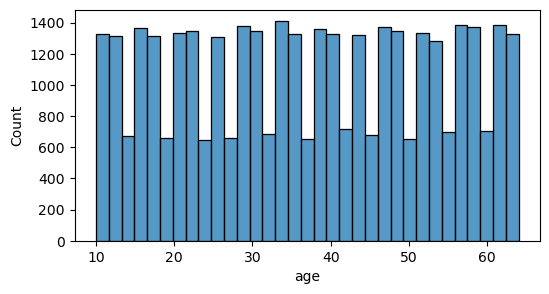

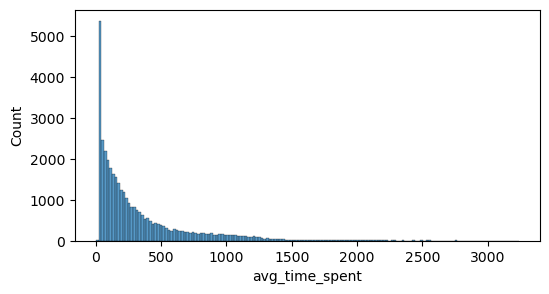

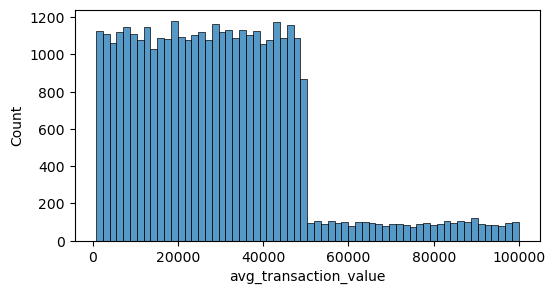

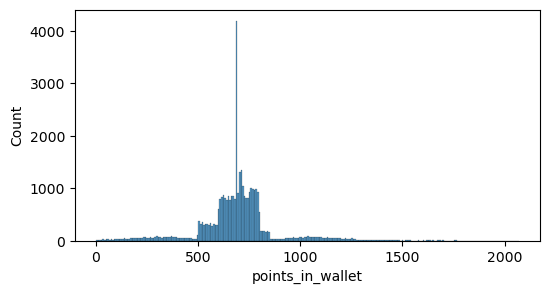

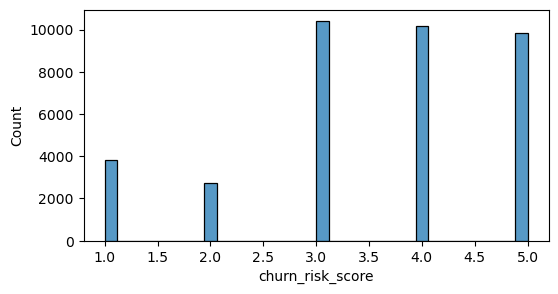

In [ ]:
for numerical in num_col:
  plt.figure(figsize=(6,3))
  sns.histplot(data=df, x=numerical)

# **4.5 Membuat data gender "Unknown" menjadi modus**

In [6]:
# Mengganti nilai "unknown" dalam kolom "gender" dengan modus
mode_gender = df['gender'].mode()[0]
df['gender'] = df['gender'].replace('Unknown', mode_gender)
df['gender'].unique()

array(['F', 'M'], dtype=object)

# **5. FEATURE TRANSFORMING**

**H0: distribusi normal H1: distribusi tidak normal**

In [ ]:
from scipy import stats

normaltest_result_churn = stats.normaltest(df['churn_risk_score'])[1]
normaltest_result_age = stats.normaltest(df['age'])[1]
normaltest_result_points_in_wallet = stats.normaltest(df['points_in_wallet'])[1]
normaltest_result_avg_time_spent = stats.normaltest(df['avg_time_spent'])[1]
normaltest_result_avg_transaction_value = stats.normaltest(df['avg_transaction_value'])[1]


#churn
if normaltest_result_churn>=5:
    print(f'The p-value for the null hypothesis of the Churn Risk Score being Normally distributed is {normaltest_result_churn}')
else:
    print(f'The p-value for the null hypothesis of the Churn Risk Score not being Normally distributed is {normaltest_result_churn}')

#age
if normaltest_result_age>=5:
    print(f'The p-value for the null hypothesis of the Age being Normally distributed is {normaltest_result_age}')
else:
    print(f'The p-value for the null hypothesis of the Age not being Normally distributed is {normaltest_result_age}')

#point in wallet
if normaltest_result_age>=5:
    print(f'The p-value for the null hypothesis of the Age being Normally distributed is {normaltest_result_points_in_wallet}')
else:
    print(f'The p-value for the null hypothesis of the Age not being Normally distributed is {normaltest_result_points_in_wallet}')

#avg time spent
if normaltest_result_age>=5:
    print(f'The p-value for the null hypothesis of the Age being Normally distributed is {normaltest_result_avg_time_spent}')
else:
    print(f'The p-value for the null hypothesis of the Age not being Normally distributed is {normaltest_result_avg_time_spent}')

#avg transaction value
if normaltest_result_age>=5:
    print(f'The p-value for the null hypothesis of the Age being Normally distributed is {normaltest_result_avg_transaction_value}')
else:
    print(f'The p-value for the null hypothesis of the Age not being Normally distributed is {normaltest_result_avg_transaction_value}')


The p-value for the null hypothesis of the Churn Risk Score not being Normally distributed is 0.0
The p-value for the null hypothesis of the Age not being Normally distributed is 0.0
The p-value for the null hypothesis of the Age not being Normally distributed is 0.0
The p-value for the null hypothesis of the Age not being Normally distributed is 0.0
The p-value for the null hypothesis of the Age not being Normally distributed is 0.0


**Karena p-value kurang dari 0.05 maka H0 ditolak atau distribusi tidak normal. Untuk menormalisasi data dilakukan log transform dan power transform.**

# **5.1 Membuat kolom menjadi Distribusi Normal**

In [ ]:
from sklearn.preprocessing import PowerTransformer

def apply_log(column):
    return np.log(column)

def normality_test(column):
    return stats.normaltest(column)

**1. KOLOM CHURN RISK SCORE**

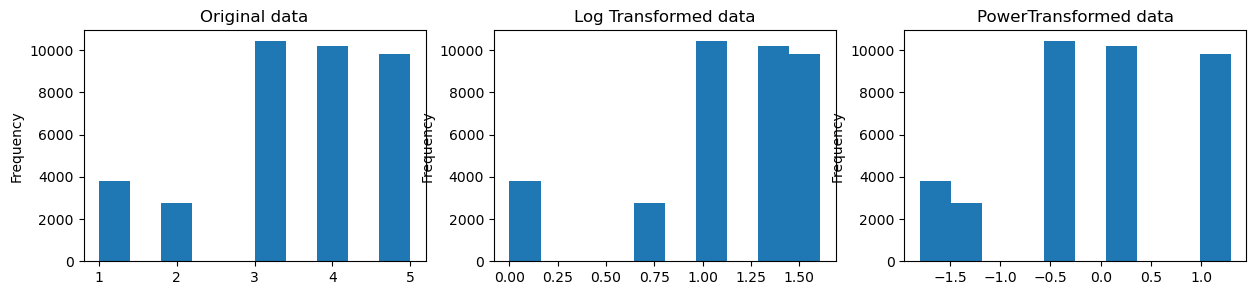

In [ ]:
# PowerTransform data
feature = df['churn_risk_score'].to_numpy().reshape(-1,1)

powtr = PowerTransformer()
feature_transf = powtr.fit_transform(feature)
array_1d = feature_transf.flatten()
feature = pd.Series(data=array_1d, index=list(range(len(array_1d))))

# Log Transform data
log_transformed_churn = apply_log(df['churn_risk_score'])

# Create axis for original data plot (ax1) and transformed data (ax2)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3))

# Plot original data & get metrics
df['churn_risk_score'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original data')
norm_test1 = normality_test(df['churn_risk_score'])

# Plot log transformed data & get metrics
log_transformed_churn.plot(kind='hist', ax=ax2);
ax2.title.set_text('Log Transformed data')
norm_test2 = normality_test(log_transformed_churn)

# Plot power transformed data & get metrics
feature.plot(kind='hist', ax=ax3);
ax3.title.set_text('PowerTransformed data')
norm_test3 = normality_test(feature)

# Create a DataFrame that shows normality test results for each tranformation
norm_results = [norm_test1, norm_test2, norm_test3]
metrics = pd.DataFrame(norm_results, index=['Original data', 'Log transform', 'PowerTransformer'])


**Setelah menjalankan tes, dapat dilihat bahwa data belum terdistribusi secara normal sehingga transformasi log maupun power belum mampu membuat data memiliki distribusi normal. Sehingga TIDAK akan dilakukan power transform maupun log transform untuk kolom churn_risk_score**

**2. KOLOM PONTS IN WALLET(PIW)**

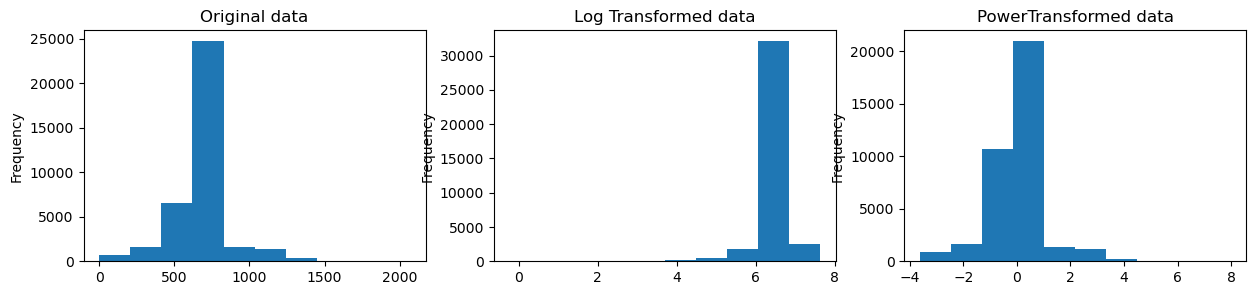

In [ ]:
# PowerTransform data
feature = df['points_in_wallet'].to_numpy().reshape(-1,1)

powtr = PowerTransformer()
feature_transf = powtr.fit_transform(feature)
array_1d = feature_transf.flatten()
feature2 = pd.Series(data=array_1d, index=list(range(len(array_1d))))

# Log Transform data
log_transformed_PIW = apply_log(df['points_in_wallet'])

# Create axis for original data plot (ax1) and transformed data (ax2)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3))

# Plot original data & get metrics
df['points_in_wallet'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original data')
norm_test1 = normality_test(df['points_in_wallet'])

# Plot log transformed data & get metrics
log_transformed_PIW.plot(kind='hist', ax=ax2);
ax2.title.set_text('Log Transformed data')
norm_test2 = normality_test(log_transformed_PIW)

# Plot power transformed data & get metrics
feature2.plot(kind='hist', ax=ax3);
ax3.title.set_text('PowerTransformed data')
norm_test3 = normality_test(feature)

# Create a DataFrame that shows normality test results for each tranformation
norm_results = [norm_test1, norm_test2, norm_test3]
metrics = pd.DataFrame(norm_results, index=['Original data', 'Log transform', 'PowerTransformer'])


**Setelah menjalankan tes, dapat dilihat bahwa data belum terdistribusi secara normal sehingga transformasi log maupun power belum mampu membuat data memiliki distribusi normal. Meskipun data yang didapatkan setelah distribusi belum normal, terjadi perubahan signifikan setelah data di transform log. Sehingga akan dilakukan LOG TRANSFORM pada kolom points_in_wallet**

**3. KOLOM AGE**

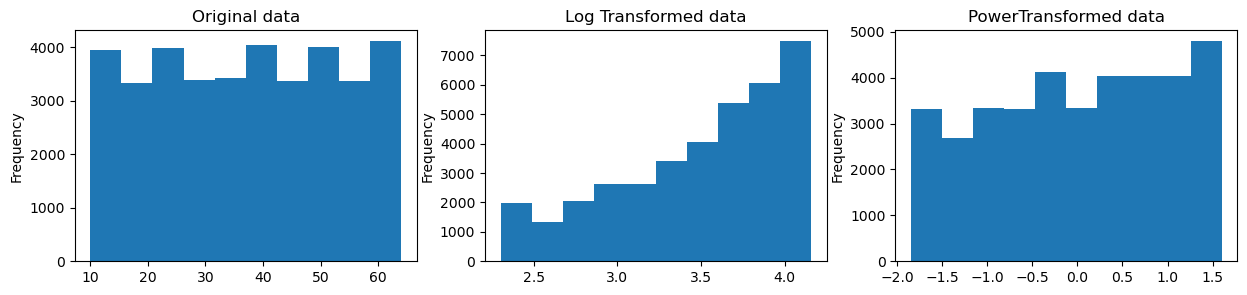

In [ ]:
# PowerTransform data
feature = df['age'].to_numpy().reshape(-1,1)

powtr = PowerTransformer()
feature_transf = powtr.fit_transform(feature)
array_1d = feature_transf.flatten()
feature3 = pd.Series(data=array_1d, index=list(range(len(array_1d))))

# Log Transform data
log_transformed_age = apply_log(df['age'])

# Create axis for original data plot (ax1) and transformed data (ax2)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3))

# Plot original data & get metrics
df['age'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original data')
norm_test1 = normality_test(df['age'])

# Plot log transformed data & get metrics
log_transformed_age.plot(kind='hist', ax=ax2);
ax2.title.set_text('Log Transformed data')
norm_test2 = normality_test(log_transformed_age)

# Plot power transformed data & get metrics
feature3.plot(kind='hist', ax=ax3);
ax3.title.set_text('PowerTransformed data')
norm_test3 = normality_test(feature)

# Create a DataFrame that shows normality test results for each tranformation
norm_results = [norm_test1, norm_test2, norm_test3]
metrics = pd.DataFrame(norm_results, index=['Original data', 'Log transform', 'PowerTransformer'])

**Setelah menjalankan tes, dapat dilihat bahwa data belum terdistribusi secara normal sehingga transformasi log maupun power belum mampu membuat data memiliki distribusi normal. Sehingga TIDAK akan dilakukan power transform maupun log transform untuk kolom age**

**4. KOLOM AVG_TIME_SPENT (ATS)**

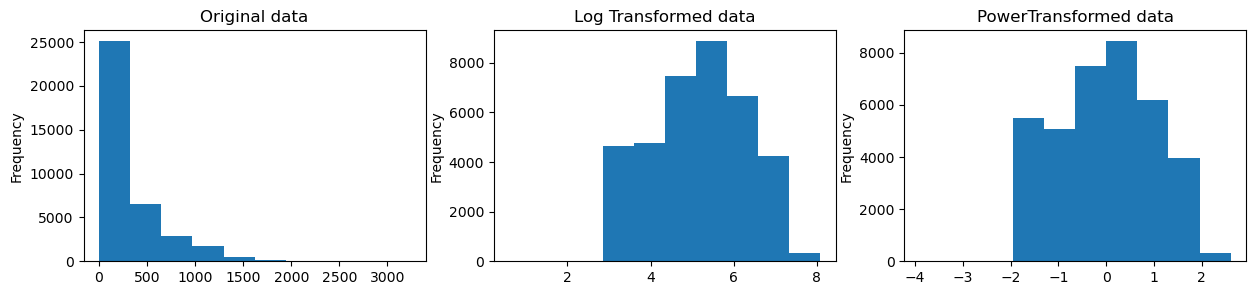

In [ ]:
# PowerTransform data
feature = df['avg_time_spent'].to_numpy().reshape(-1,1)

powtr = PowerTransformer()
feature_transf = powtr.fit_transform(feature)
array_1d = feature_transf.flatten()
feature4 = pd.Series(data=array_1d, index=list(range(len(array_1d))))

# Log Transform data
log_transformed_ATS = apply_log(df['avg_time_spent'])

# Create axis for original data plot (ax1) and transformed data (ax2)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3))

# Plot original data & get metrics
df['avg_time_spent'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original data')
norm_test1 = normality_test(df['avg_time_spent'])

# Plot log transformed data & get metrics
log_transformed_ATS.plot(kind='hist', ax=ax2);
ax2.title.set_text('Log Transformed data')
norm_test2 = normality_test(log_transformed_ATS)

# Plot power transformed data & get metrics
feature4.plot(kind='hist', ax=ax3);
ax3.title.set_text('PowerTransformed data')
norm_test3 = normality_test(feature)

# Create a DataFrame that shows normality test results for each tranformation
norm_results = [norm_test1, norm_test2, norm_test3]
metrics = pd.DataFrame(norm_results, index=['Original data', 'Log transform', 'PowerTransformer'])


**Setelah menjalankan tes, dapat dilihat bahwa data belum terdistribusi secara normal sehingga transformasi log maupun power belum mampu membuat data memiliki distribusi normal. Meskipun data yang didapatkan setelah distribusi belum normal, terjadi perubahan signifikan setelah data di transform. Sehingga akan dilakukan LOG TRANSFORM pada kolom avg_time_spent**

**5. KOLOM AVG_TRANSACTION_VALUE (ATV)**

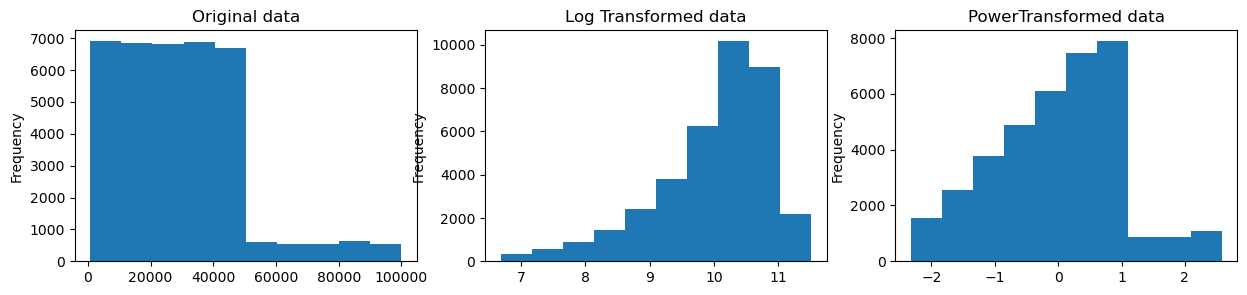

In [ ]:
# PowerTransform data
feature = df['avg_transaction_value'].to_numpy().reshape(-1,1)

powtr = PowerTransformer()
feature_transf = powtr.fit_transform(feature)
array_1d = feature_transf.flatten()
feature5 = pd.Series(data=array_1d, index=list(range(len(array_1d))))

# Log Transform data
log_transformed_ATV = apply_log(df['avg_transaction_value'])

# Create axis for original data plot (ax1) and transformed data (ax2)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3))

# Plot original data & get metrics
df['avg_transaction_value'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original data')
norm_test1 = normality_test(df['avg_transaction_value'])

# Plot log transformed data & get metrics
log_transformed_ATV.plot(kind='hist', ax=ax2);
ax2.title.set_text('Log Transformed data')
norm_test2 = normality_test(log_transformed_ATV)

# Plot power transformed data & get metrics
feature5.plot(kind='hist', ax=ax3);
ax3.title.set_text('PowerTransformed data')
norm_test3 = normality_test(feature)

# Create a DataFrame that shows normality test results for each tranformation
norm_results = [norm_test1, norm_test2, norm_test3]
metrics = pd.DataFrame(norm_results, index=['Original data', 'Log transform', 'PowerTransformer'])


**Setelah menjalankan tes, dapat dilihat bahwa data belum terdistribusi secara normal sehingga transformasi log maupun power belum mampu membuat data memiliki distribusi normal. Meskipun data yang didapatkan setelah distribusi belum normal, terjadi perubahan signifikan setelah data di transform. Sehingga akan dilakukan LOG TRANSFORM pada kolom avg_transaction_value**

In [ ]:
df['transf_PIW'] = log_transformed_PIW
df['transf_ATS'] = log_transformed_ATS
df['transf_ATV'] = log_transformed_ATV

In [ ]:
df_transformed = df.drop(['points_in_wallet', 'avg_time_spent', 'avg_transaction_value'], axis=1)
df=df_transformed

In [ ]:
df.head()

age gender region_category  membership_category joined_through_referral  \
0   18      F         Village  Platinum Membership                      No   
1   32      F            City   Premium Membership                      No   
2   44      F            Town        No Membership                     Yes   
3   37      M            City        No Membership                     Yes   
4   31      F            City        No Membership                      No   

   avg_frequency_login_days used_special_discount  \
0                      17.0                   Yes   
1                      10.0                   Yes   
2                      22.0                    No   
3                       6.0                    No   
4                      16.0                    No   

  offer_application_preference past_complaint     complaint_status  \
0                          Yes             No       Not Applicable   
1                           No            Yes               Solved   
2                          Yes            Yes  Solved in Follow-up   
3                          Yes            Yes             Unsolved   
4                          Yes            Yes               Solved   

                   feedback  churn_risk_score  transf_PIW  transf_ATS  \
0  Products always in Stock                 2    6.661535    5.705880   
1     Quality Customer Care                 1    6.532163    5.724696   
2              Poor Website                 5    6.215987    6.246417   
3              Poor Website                 5    6.341523    3.975373   
4              Poor Website                 5    6.496865    4.728538   

   transf_ATV  
0   10.878146  
1    9.460194  
2    9.953563  
3   10.136168  
4   10.105761

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36992 entries, 0 to 36991
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   region_category               36992 non-null  object 
 3   membership_category           36992 non-null  object 
 4   joined_through_referral       36992 non-null  object 
 5   avg_frequency_login_days      36992 non-null  float64
 6   used_special_discount         36992 non-null  object 
 7   offer_application_preference  36992 non-null  object 
 8   past_complaint                36992 non-null  object 
 9   complaint_status              36992 non-null  object 
 10  feedback                      36992 non-null  object 
 11  churn_risk_score              36992 non-null  int64  
 12  transf_PIW                    36992 non-null  float64
 13  t

In [ ]:
df.describe()

age  avg_frequency_login_days  churn_risk_score    transf_PIW  \
count  36992.000000              36992.000000      36992.000000  36992.000000   
mean      37.118161                 14.455576          3.526276      6.485526   
std       15.867412                  9.941579          1.244039      0.368063   
min       10.000000                -43.652702          1.000000     -0.237107   
25%       23.000000                  7.000000          3.000000      6.436735   
50%       37.000000                 14.000000          4.000000      6.532163   
75%       51.000000                 22.000000          5.000000      6.629376   
max       64.000000                 73.061995          5.000000      7.634854   

         transf_ATS    transf_ATV  
count  36992.000000  36992.000000  
mean       5.194138      9.990295  
std        1.098339      0.888766  
min        0.608351      6.685187  
25%        4.323172      9.559414  
50%        5.226687     10.223921  
75%        6.031058     10.617787  
max        8.081963     11.512066

# **6. FEATURE ENGINEERING**

### **6.1 ENCODE 1**

ONE HOT & LABEL ENCODE

In [ ]:
cat_features = df.select_dtypes(include=[np.object])

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
cat_features

gender region_category  membership_category joined_through_referral  \
0          F         Village  Platinum Membership                      No   
1          F            City   Premium Membership                      No   
2          F            Town        No Membership                     Yes   
3          M            City        No Membership                     Yes   
4          F            City        No Membership                      No   
...      ...             ...                  ...                     ...   
36987      F            Town     Basic Membership                      No   
36988      F            Town     Basic Membership                      No   
36989      F            Town     Basic Membership                     Yes   
36990      M         Village  Platinum Membership                      No   
36991      M            Town    Silver Membership                      No   

      used_special_discount offer_application_preference past_complaint  \
0                       Yes                          Yes             No   
1                       Yes                           No            Yes   
2                        No                          Yes            Yes   
3                        No                          Yes            Yes   
4                        No                          Yes            Yes   
...                     ...                          ...            ...   
36987                    No                          Yes            Yes   
36988                   Yes                           No             No   
36989                    No                          Yes            Yes   
36990                   Yes                          Yes             No   
36991                   Yes                           No             No   

               complaint_status                  feedback  
0                Not Applicable  Products always in Stock  
1                        Solved     Quality Customer Care  
2           Solved in Follow-up              Poor Website  
3                      Unsolved              Poor Website  
4                        Solved              Poor Website  
...                         ...                       ...  
36987  No Information Available       No reason specified  
36988            Not Applicable     Poor Customer Service  
36989                  Unsolved              Poor Website  
36990            Not Applicable       No reason specified  
36991            Not Applicable     Quality Customer Care  

[36992 rows x 9 columns]

In [ ]:
cat_features.columns

Index(['gender', 'region_category', 'membership_category',
       'joined_through_referral', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback'],
      dtype='object')

ONE HOT ENCODING

In [ ]:
# extract numerical and categorical for dummy and scaling later
custom_feat = ['region_category', 'complaint_status', 'feedback']
encode_data = df.copy()  # Duplikasi data df untuk operasi one-hot encoding

for feat in cat_features.columns:
    if len(df[feat].unique()) > 2 and feat in custom_feat:
        dummyVars = pd.get_dummies(encode_data[feat], drop_first=True, prefix=feat+"_")
        encode_data = pd.concat([encode_data, dummyVars], axis=1)
        encode_data.drop(feat, axis=1, inplace=True)

encode_data

age gender  membership_category joined_through_referral  \
0       18      F  Platinum Membership                      No   
1       32      F   Premium Membership                      No   
2       44      F        No Membership                     Yes   
3       37      M        No Membership                     Yes   
4       31      F        No Membership                      No   
...    ...    ...                  ...                     ...   
36987   46      F     Basic Membership                      No   
36988   29      F     Basic Membership                      No   
36989   23      F     Basic Membership                     Yes   
36990   53      M  Platinum Membership                      No   
36991   35      M    Silver Membership                      No   

       avg_frequency_login_days used_special_discount  \
0                          17.0                   Yes   
1                          10.0                   Yes   
2                          22.0                    No   
3                           6.0                    No   
4                          16.0                    No   
...                         ...                   ...   
36987                       6.0                    No   
36988                      28.0                   Yes   
36989                       0.0                    No   
36990                      20.0                   Yes   
36991                       0.0                   Yes   

      offer_application_preference past_complaint  churn_risk_score  \
0                              Yes             No                 2   
1                               No            Yes                 1   
2                              Yes            Yes                 5   
3                              Yes            Yes                 5   
4                              Yes            Yes                 5   
...                            ...            ...               ...   
36987                          Yes            Yes                 4   
36988                           No             No                 5   
36989                          Yes            Yes                 4   
36990                          Yes             No                 3   
36991                           No             No                 2   

       transf_PIW  ...  complaint_status__Solved in Follow-up  \
0        6.661535  ...                                      0   
1        6.532163  ...                                      0   
2        6.215987  ...                                      1   
3        6.341523  ...                                      0   
4        6.496865  ...                                      0   
...           ...  ...                                    ...   
36987    6.460702  ...                                      0   
36988    6.269077  ...                                      0   
36989    6.522784  ...                                      0   
36990    5.284545  ...                                      0   
36991    6.579210  ...                                      0   

       complaint_status__Unsolved  feedback__Poor Customer Service  \
0                               0                                0   
1                               0                                0   
2                               0                                0   
3                               1                                0   
4                               0                                0   
...                           ...                              ...   
36987                           0                                0   
36988                           0                                1   
36989                           1                                0   
36990                           0                                0   
36991                           0                                0   

       feedback__Poor Product Quality  feedback__Poor 

LABEL ENCODING

In [ ]:
cols = ['membership_category', 'gender',
        'joined_through_referral', 'used_special_discount',
        'offer_application_preference', 'past_complaint']

encoders = {}

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(encode_data[c].values))
    encode_data[c] = lbl.transform(list(encode_data[c].values))
    encoders[c] = lbl

In [ ]:
encode_data

age  gender  membership_category  joined_through_referral  \
0       18       0                    3                        0   
1       32       0                    4                        0   
2       44       0                    2                        1   
3       37       1                    2                        1   
4       31       0                    2                        0   
...    ...     ...                  ...                      ...   
36987   46       0                    0                        0   
36988   29       0                    0                        0   
36989   23       0                    0                        1   
36990   53       1                    3                        0   
36991   35       1                    5                        0   

       avg_frequency_login_days  used_special_discount  \
0                          17.0                      1   
1                          10.0                      1   
2                          22.0                      0   
3                           6.0                      0   
4                          16.0                      0   
...                         ...                    ...   
36987                       6.0                      0   
36988                      28.0                      1   
36989                       0.0                      0   
36990                      20.0                      1   
36991                       0.0                      1   

       offer_application_preference  past_complaint  churn_risk_score  \
0                                 1               0                 2   
1                                 0               1                 1   
2                                 1               1                 5   
3                                 1               1                 5   
4                                 1               1                 5   
...                             ...             ...               ...   
36987                             1               1                 4   
36988                             0               0                 5   
36989                             1               1                 4   
36990                             1               0                 3   
36991                             0               0                 2   

       transf_PIW  ...  complaint_status__Solved in Follow-up  \
0        6.661535  ...                                      0   
1        6.532163  ...                                      0   
2        6.215987  ...                                      1   
3        6.341523  ...                                      0   
4        6.496865  ...                                      0   
...           ...  ...                                    ...   
36987    6.460702  ...                                      0   
36988    6.269077  ...                                      0   
36989    6.522784  ...                                      0   
36990    5.284545  ...                                      0   
36991    6.579210  ...                                      0   

       complaint_status__Unsolved  feedback__Poor Customer Service  \
0                               0                                0   
1                               0                                0   
2                               0                                0   
3                               1                                0   
4                               0                                0   
...                           ...                              ...   
36987                           0                                0   
36988                           0                                1   
36989                           1                                0   
36990                           0                                0   
36991                           0                                

## **6.2 Split Data**

In [ ]:
response = encode_data['churn_risk_score']

encode_data = encode_data.drop(columns='churn_risk_score')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(encode_data, response,
                                                    stratify=response,
                                                    test_size = 0.2, #use 0.1 if data is huge.
                                                    random_state = 0)

#to resolve any class imbalance - use stratify parameter.

print("Number transactions X_train encode_data: ", X_train.shape)
print("Number transactions y_train encode_data: ", y_train.shape)
print("Number transactions X_test encode_data: ", X_test.shape)
print("Number transactions y_test encode_data: ", y_test.shape)

Number transactions X_train encode_data:  (29593, 25)
Number transactions y_train encode_data:  (29593,)
Number transactions X_test encode_data:  (7399, 25)
Number transactions y_test encode_data:  (7399,)


# **6.3 Scalling**

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [ ]:
X_train

age    gender  membership_category  joined_through_referral  \
34522  0.248893  1.006339             1.014573                -0.858300   
11435 -0.066020  1.006339             0.437805                 1.165094   
7050  -1.703565 -0.993701             0.437805                -0.858300   
18211  0.311875 -0.993701             1.014573                 1.165094   
27687 -0.884792  1.006339             0.437805                -0.858300   
...         ...       ...                  ...                      ...   
32610  0.878718 -0.993701             1.014573                -0.858300   
24030  0.689771  1.006339            -0.715733                -0.858300   
17960 -1.262687 -0.993701            -0.138964                -0.858300   
35931 -1.073740  1.006339            -1.292501                -0.858300   
34063 -0.003037 -0.993701            -0.715733                 1.165094   

       avg_frequency_login_days  used_special_discount  \
34522                 -0.344429              -1.108781   
11435                  0.157836              -1.108781   
7050                   0.157836               0.901891   
18211                  0.760553               0.901891   
27687                 -0.645788               0.901891   
...                         ...                    ...   
32610                  1.262818               0.901891   
24030                  0.258289               0.901891   
17960                  0.057383               0.901891   
35931                  1.162365               0.901891   
34063                  0.660100              -1.108781   

       offer_application_preference  past_complaint  transf_PIW  transf_ATS  \
34522                      0.903062        1.004369    0.343640    1.682524   
11435                      0.903062        1.004369    0.293789    1.248898   
7050                      -1.107343        1.004369    1.013414   -0.058454   
18211                     -1.107343       -0.995650    0.519498    1.242043   
27687                     -1.107343        1.004369   -1.935814   -0.858981   
...                             ...             ...         ...         ...   
32610                     -1.107343       -0.995650    0.526709   -1.592956   
24030                     -1.107343        1.004369   -0.054765   -0.247746   
17960                     -1.107343       -0.995650   -0.340095   -1.209687   
35931                     -1.107343        1.004369    0.125465    0.006921   
34063                      0.903062        1.004369   -0.224484   -0.746051   

       ...  complaint_status__Solved in Follow-up  complaint_status__Unsolved  \
34522  ...                              -0.374328                   -0.380696   
11435  ...                               2.671451                   -0.380696   
7050   ...                              -0.374328                   -0.380696   
18211  ...                              -0.374328                   -0.380696   
27687  ...                              -0.374328                   -0.380696   
...    ...                                    ...                         ...   
32610  ...                              -0.374328                   -0.380696   
24030  ...                              -0.374328                    2.626765   
17960  ...                              -0.374328                   -0.380696   
35931  ...                               2.671451                   -0.380696   
34063  ...                              -0.374328                    2.626765   

       feedback__Poor Customer Service  feedback__Poor Product Quality  \
34522                        -0.451604                       -0.455503   
11435                        -0.451604                        2.195374   
7050                         -0.451604                        2.195374   
18211                        -0.451604                        2.195374   
27687                        -0.451604                       -0.455503   
...                                ...          

# **7. FEATURE ENGINEERING 2**

# **7.1 Encode 2**

Label Encode

In [ ]:
cat_features

gender region_category  membership_category joined_through_referral  \
0          F         Village  Platinum Membership                      No   
1          F            City   Premium Membership                      No   
2          F            Town        No Membership                     Yes   
3          M            City        No Membership                     Yes   
4          F            City        No Membership                      No   
...      ...             ...                  ...                     ...   
36987      F            Town     Basic Membership                      No   
36988      F            Town     Basic Membership                      No   
36989      F            Town     Basic Membership                     Yes   
36990      M         Village  Platinum Membership                      No   
36991      M            Town    Silver Membership                      No   

      used_special_discount offer_application_preference past_complaint  \
0                       Yes                          Yes             No   
1                       Yes                           No            Yes   
2                        No                          Yes            Yes   
3                        No                          Yes            Yes   
4                        No                          Yes            Yes   
...                     ...                          ...            ...   
36987                    No                          Yes            Yes   
36988                   Yes                           No             No   
36989                    No                          Yes            Yes   
36990                   Yes                          Yes             No   
36991                   Yes                           No             No   

               complaint_status                  feedback  
0                Not Applicable  Products always in Stock  
1                        Solved     Quality Customer Care  
2           Solved in Follow-up              Poor Website  
3                      Unsolved              Poor Website  
4                        Solved              Poor Website  
...                         ...                       ...  
36987  No Information Available       No reason specified  
36988            Not Applicable     Poor Customer Service  
36989                  Unsolved              Poor Website  
36990            Not Applicable       No reason specified  
36991            Not Applicable     Quality Customer Care  

[36992 rows x 9 columns]

In [ ]:
encode_data_2 = df.copy()  # Duplikasi data df untuk operasi label encoding

In [ ]:
encode_data_2

age gender region_category  membership_category  \
0       18      F         Village  Platinum Membership   
1       32      F            City   Premium Membership   
2       44      F            Town        No Membership   
3       37      M            City        No Membership   
4       31      F            City        No Membership   
...    ...    ...             ...                  ...   
36987   46      F            Town     Basic Membership   
36988   29      F            Town     Basic Membership   
36989   23      F            Town     Basic Membership   
36990   53      M         Village  Platinum Membership   
36991   35      M            Town    Silver Membership   

      joined_through_referral  avg_frequency_login_days used_special_discount  \
0                          No                      17.0                   Yes   
1                          No                      10.0                   Yes   
2                         Yes                      22.0                    No   
3                         Yes                       6.0                    No   
4                          No                      16.0                    No   
...                       ...                       ...                   ...   
36987                      No                       6.0                    No   
36988                      No                      28.0                   Yes   
36989                     Yes                       0.0                    No   
36990                      No                      20.0                   Yes   
36991                      No                       0.0                   Yes   

      offer_application_preference past_complaint          complaint_status  \
0                              Yes             No            Not Applicable   
1                               No            Yes                    Solved   
2                              Yes            Yes       Solved in Follow-up   
3                              Yes            Yes                  Unsolved   
4                              Yes            Yes                    Solved   
...                            ...            ...                       ...   
36987                          Yes            Yes  No Information Available   
36988                           No             No            Not Applicable   
36989                          Yes            Yes                  Unsolved   
36990                          Yes             No            Not Applicable   
36991                           No             No            Not Applicable   

                       feedback  churn_risk_score  transf_PIW  transf_ATS  \
0      Products always in Stock                 2    6.661535    5.705880   
1         Quality Customer Care                 1    6.532163    5.724696   
2                  Poor Website                 5    6.215987    6.246417   
3                  Poor Website                 5    6.341523    3.975373   
4                  Poor Website                 5    6.496865    4.728538   
...                         ...               ...         ...         ...   
36987       No reason specified                 4    6.460702    6.478022   
36988     Poor Customer Service                 5    6.269077    6.458532   
36989              Poor Website                 4    6.522784    5.043038   
36990       No reason specified                 3    5.284545    6.179209   
36991     Quality Customer Care                 2    6.579210    4.371724   

       transf_ATV  
0       10.878146  
1        9.460194  
2        9.953563  
3       10.136168  
4       10.105761  
...           ...  
36987   10.213824  
36988    9.311968  
36989   10.548693  
36990    7.774377  
36991    7.691511  

[36992 rows x 15 columns]

In [ ]:
cols = cat_features
encoders = {}

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(encode_data_2[c].values))
    encode_data_2[c] = lbl.transform(list(encode_data_2[c].values))
    encoders[c] = lblcols = cat_features
encoders = {}

In [ ]:
encode_data_2

age  gender  region_category  membership_category  \
0       18       0                2                    3   
1       32       0                0                    4   
2       44       0                1                    2   
3       37       1                0                    2   
4       31       0                0                    2   
...    ...     ...              ...                  ...   
36987   46       0                1                    0   
36988   29       0                1                    0   
36989   23       0                1                    0   
36990   53       1                2                    3   
36991   35       1                1                    5   

       joined_through_referral  avg_frequency_login_days  \
0                            0                      17.0   
1                            0                      10.0   
2                            1                      22.0   
3                            1                       6.0   
4                            0                      16.0   
...                        ...                       ...   
36987                        0                       6.0   
36988                        0                      28.0   
36989                        1                       0.0   
36990                        0                      20.0   
36991                        0                       0.0   

       used_special_discount  offer_application_preference  past_complaint  \
0                          1                             1               0   
1                          1                             0               1   
2                          0                             1               1   
3                          0                             1               1   
4                          0                             1               1   
...                      ...                           ...             ...   
36987                      0                             1               1   
36988                      1                             0               0   
36989                      0                             1               1   
36990                      1                             1               0   
36991                      1                             0               0   

       complaint_status  feedback  churn_risk_score  transf_PIW  transf_ATS  \
0                     1         4                 2    6.661535    5.705880   
1                     2         5                 1    6.532163    5.724696   
2                     3         3                 5    6.215987    6.246417   
3                     4         3                 5    6.341523    3.975373   
4                     2         3                 5    6.496865    4.728538   
...                 ...       ...               ...         ...         ...   
36987                 0         0                 4    6.460702    6.478022   
36988                 1         1                 5    6.269077    6.458532   
36989                 4         3                 4    6.522784    5.043038   
36990                 1         0                 3    5.284545    6.179209   
36991                 1         5                 2    6.579210    4.371724   

       transf_ATV  
0       10.878146  
1        9.460194  
2        9.953563  
3       10.136168  
4       10.105761  
...           ...  
36987   10.213824  
36988    9.311968  
36989   10.548693  
36990    7.774377  
36991    7.691511  

[36992 rows x 15 columns]

In [ ]:
encode_data_2.columns

Index(['age', 'gender', 'region_category', 'membership_category',
       'joined_through_referral', 'avg_frequency_login_days',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'complaint_status', 'feedback', 'churn_risk_score',
       'transf_PIW', 'transf_ATS', 'transf_ATV'],
      dtype='object')

In [ ]:
encode_data_2.describe().T

count       mean        std        min  \
age                           36992.0  37.118161  15.867412  10.000000   
gender                        36992.0   0.498567   0.500005   0.000000   
region_category               36992.0   0.782710   0.651262   0.000000   
membership_category           36992.0   2.242458   1.736675   0.000000   
joined_through_referral       36992.0   0.424822   0.494323   0.000000   
avg_frequency_login_days      36992.0  14.455576   9.941579 -43.652702   
used_special_discount         36992.0   0.549903   0.497510   0.000000   
offer_application_preference  36992.0   0.552552   0.497237   0.000000   
past_complaint                36992.0   0.497135   0.499999   0.000000   
complaint_status              36992.0   1.625946   1.216914   0.000000   
feedback                      36992.0   3.072989   2.560848   0.000000   
churn_risk_score              36992.0   3.526276   1.244039   1.000000   
transf_PIW                    36992.0   6.485526   0.368063  -0.237107   
transf_ATS                    36992.0   5.194138   1.098339   0.608351   
transf_ATV                    36992.0   9.990295   0.888766   6.685187   

                                    25%        50%        75%        max  
age                           23.000000  37.000000  51.000000  64.000000  
gender                         0.000000   0.000000   1.000000   1.000000  
region_category                0.000000   1.000000   1.000000   2.000000  
membership_category            1.000000   2.000000   4.000000   5.000000  
joined_through_referral        0.000000   0.000000   1.000000   1.000000  
avg_frequency_login_days       7.000000  14.000000  22.000000  73.061995  
used_special_discount          0.000000   1.000000   1.000000   1.000000  
offer_application_preference   0.000000   1.000000   1.000000   1.000000  
past_complaint                 0.000000   0.000000   1.000000   1.000000  
complaint_status               1.000000   1.000000   2.000000   4.000000  
feedback                       1.000000   2.000000   5.000000   8.000000  
churn_risk_score               3.000000   4.000000   5.000000   5.000000  
transf_PIW                     6.436735   6.532163   6.629376   7.634854  
transf_ATS                     4.323172   5.226687   6.031058   8.081963  
transf_ATV                     9.559414  10.223921  10.617787  11.512066

# **7.2 Split Data 2**

In [ ]:
response_2 = encode_data_2['churn_risk_score']

encode_data_2 = encode_data_2.drop(columns='churn_risk_score')

In [ ]:
from sklearn.model_selection import train_test_split

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(encode_data_2, response_2,
                                                    stratify=response_2,
                                                    test_size = 0.2, #use 0.1 if data is huge.
                                                    random_state = 0)

#to resolve any class imbalance - use stratify parameter.

print("Number transactions X_train_2 encode_data_2: ", X_train_2.shape)
print("Number transactions y_train_2 encode_data_2: ", y_train_2.shape)
print("Number transactions X_test_2 encode_data_2: ", X_test_2.shape)
print("Number transactions y_test_2 encode_data_2: ", y_test_2.shape)

Number transactions X_train_2 encode_data_2:  (29593, 14)
Number transactions y_train_2 encode_data_2:  (29593,)
Number transactions X_test_2 encode_data_2:  (7399, 14)
Number transactions y_test_2 encode_data_2:  (7399,)


# **7.3 Scaling 2**

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_X2 = StandardScaler()
X_train2_2 = pd.DataFrame(sc_X2.fit_transform(X_train_2))
X_train2_2.columns = X_train_2.columns.values
X_train2_2.index = X_train_2.index.values
X_train_2 = X_train2_2

X_test2_2 = pd.DataFrame(sc_X2.transform(X_test_2))
X_test2_2.columns = X_test_2.columns.values
X_test2_2.index = X_test_2.index.values
X_test_2 = X_test2_2

In [ ]:
X_train_2

age    gender  region_category  membership_category  \
34522  0.248893  1.006339         1.871055             1.014573   
11435 -0.066020  1.006339         1.871055             0.437805   
7050  -1.703565 -0.993701         0.334404             0.437805   
18211  0.311875 -0.993701         0.334404             1.014573   
27687 -0.884792  1.006339         0.334404             0.437805   
...         ...       ...              ...                  ...   
32610  0.878718 -0.993701        -1.202246             1.014573   
24030  0.689771  1.006339         0.334404            -0.715733   
17960 -1.262687 -0.993701         0.334404            -0.138964   
35931 -1.073740  1.006339        -1.202246            -1.292501   
34063 -0.003037 -0.993701        -1.202246            -0.715733   

       joined_through_referral  avg_frequency_login_days  \
34522                -0.858300                 -0.344429   
11435                 1.165094                  0.157836   
7050                 -0.858300                  0.157836   
18211                 1.165094                  0.760553   
27687                -0.858300                 -0.645788   
...                        ...                       ...   
32610                -0.858300                  1.262818   
24030                -0.858300                  0.258289   
17960                -0.858300                  0.057383   
35931                -0.858300                  1.162365   
34063                 1.165094                  0.660100   

       used_special_discount  offer_application_preference  past_complaint  \
34522              -1.108781                      0.903062        1.004369   
11435              -1.108781                      0.903062        1.004369   
7050                0.901891                     -1.107343        1.004369   
18211               0.901891                     -1.107343       -0.995650   
27687               0.901891                     -1.107343        1.004369   
...                      ...                           ...             ...   
32610               0.901891                     -1.107343       -0.995650   
24030               0.901891                     -1.107343        1.004369   
17960               0.901891                     -1.107343       -0.995650   
35931               0.901891                     -1.107343        1.004369   
34063              -1.108781                      0.903062        1.004369   

       complaint_status  feedback  transf_PIW  transf_ATS  transf_ATV  
34522          0.305973  1.532442    0.343640    1.682524   -0.552506  
11435          1.126291 -0.418362    0.293789    1.248898    0.927490  
7050          -1.334663 -0.418362    1.013414   -0.058454   -0.713658  
18211         -0.514345 -0.418362    0.519498    1.242043   -0.313535  
27687          0.305973  0.752121   -1.935814   -0.858981    1.145676  
...                 ...       ...         ...         ...         ...  
32610         -0.514345 -0.418362    0.526709   -1.592956   -0.184447  
24030          1.946609 -0.808523   -0.054765   -0.247746   -1.023170  
17960         -0.514345 -0.418362   -0.340095   -1.209687   -1.174724  
35931          1.126291 -0.808523    0.125465    0.006921    0.186120  
34063          1.946609 -1.198684   -0.224484   -0.746051    0.861127  

[29593 rows x 14 columns]

Dilakukan encoding data 2 kali:
encode 1= one hot encoding & label encoding
encode 2= label encoding
lalu dibandingkan hasil pemodelan nya

# **8. MODEL BUILDING**

**8.1 MODEL ONE HOT & LABEL ENCODING (ENCODE 1)**

**1. Decision Tree**

           Accuracy   Precision  Recall     F1 Score   F2 Score  
Data Train 0.8347     0.8581     0.8431     0.8414     0.8403    
Data Test  0.7443     0.7250     0.7193     0.7152     0.7160    


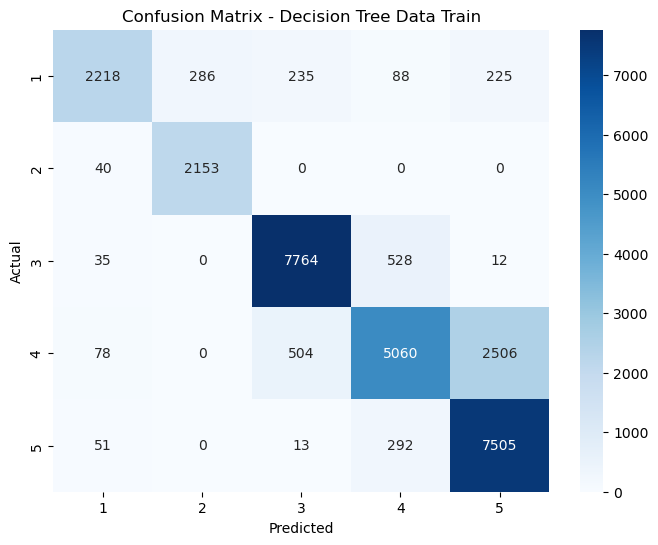

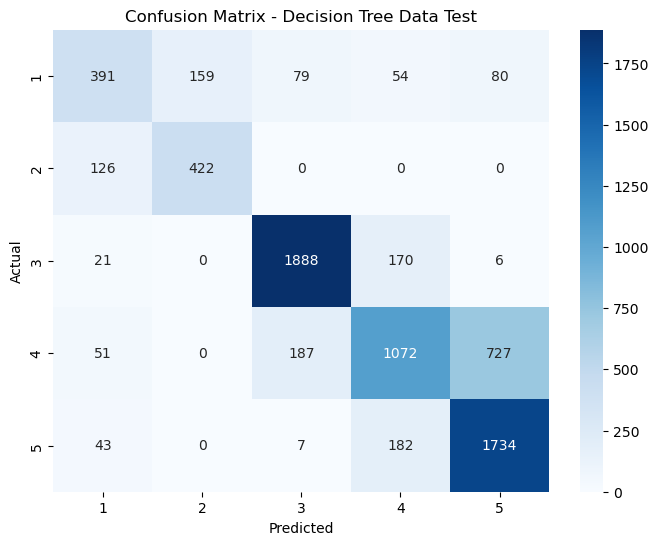

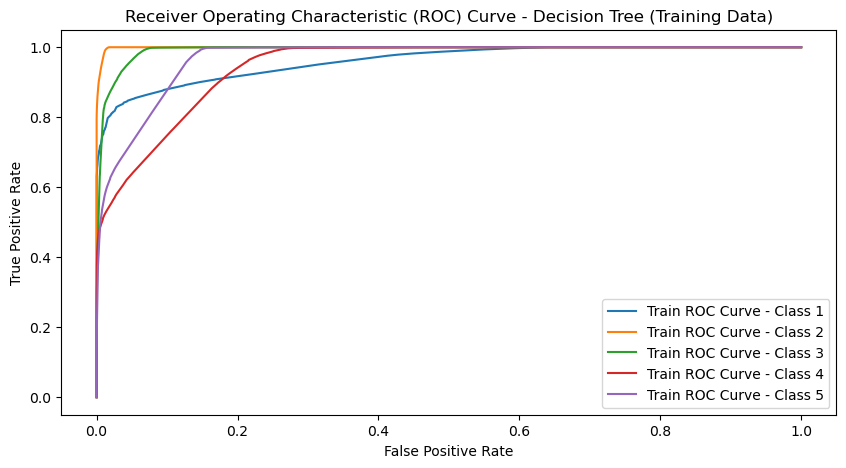

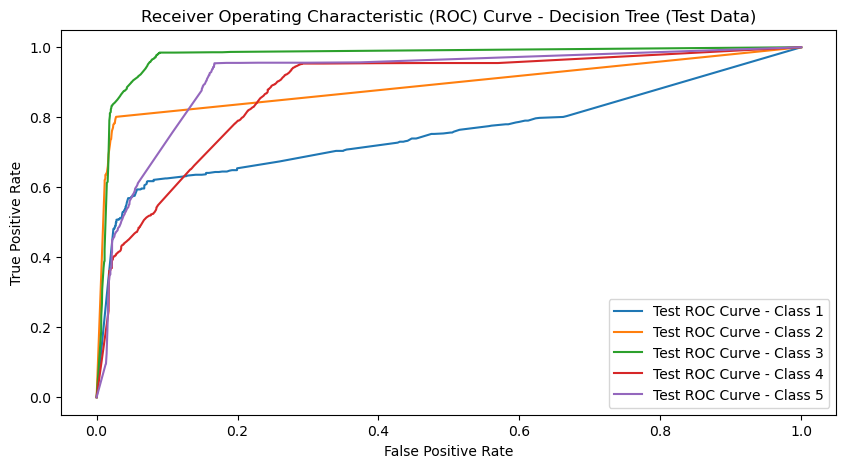

In [ ]:
import sklearn.tree as skt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create and train the Decision Tree model
dt_model_1 = skt.DecisionTreeClassifier(random_state=0, class_weight='balanced',
                                        max_depth=15, min_samples_split=5, min_samples_leaf=1)
dt_model_1.fit(X_train, y_train)

# Predict
y_train_pred_dt = dt_model_1.predict(X_train)
y_test_pred_dt = dt_model_1.predict(X_test)

# Calculate metrics for Decision Tree
train_accuracy_dt = skm.accuracy_score(y_train, y_train_pred_dt)
train_precision_dt = skm.precision_score(y_train, y_train_pred_dt, average='macro')
train_recall_dt = skm.recall_score(y_train, y_train_pred_dt, average='macro')
train_f1_score_dt = skm.f1_score(y_train, y_train_pred_dt, average="macro")
train_f2_score_dt = skm.fbeta_score(y_train, y_train_pred_dt, beta=2, average='macro')

test_accuracy_dt = skm.accuracy_score(y_test, y_test_pred_dt)
test_precision_dt = skm.precision_score(y_test, y_test_pred_dt, average='macro')
test_recall_dt = skm.recall_score(y_test, y_test_pred_dt, average='macro')
test_f1_score_dt = skm.f1_score(y_test, y_test_pred_dt, average="macro")
test_f2_score_dt = skm.fbeta_score(y_test, y_test_pred_dt, beta=2, average='macro')

# Display results in a tabular format for Decision Tree
print("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format("", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score"))
print("{:<10} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format("Data Train", train_accuracy_dt, train_precision_dt, train_recall_dt, train_f1_score_dt, train_f2_score_dt))
print("{:<10} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format("Data Test ", test_accuracy_dt, test_precision_dt, test_recall_dt, test_f1_score_dt, test_f2_score_dt))

# Menghitung Confusion Matrix untuk Decision Tree Data Train dan Data Test
confusion_matrix_train_dt = confusion_matrix(y_train, y_train_pred_dt)
confusion_matrix_test_dt = confusion_matrix(y_test, y_test_pred_dt)

# Membuat heatmap untuk Confusion Matrix Decision Tree Data Train
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Data Train')
plt.show()

# Membuat heatmap untuk Confusion Matrix Decision Tree Data Test
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Data Test')
plt.show()

# Menghitung probabilitas prediksi untuk setiap kelas
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
y_train_scores = dt_model_1.predict_proba(X_train)
y_test_scores = dt_model_1.predict_proba(X_test)

# Menghitung kurva ROC dan AUC untuk setiap kelas pada data latih
fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()

for i in range(len(np.unique(y_train))):
    fpr_train[i], tpr_train[i], _ = roc_curve(y_train_bin[:, i], y_train_scores[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Plotting kurva ROC AUC untuk setiap kelas pada data latih
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y_train))):
    plt.plot(fpr_train[i], tpr_train[i], label='Train ROC Curve - Class {}'.format(np.unique(y_train)[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree (Training Data)')
plt.legend(loc="best")

# Menghitung kurva ROC dan AUC untuk setiap kelas pada data uji
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()

for i in range(len(np.unique(y_train))):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_test_scores[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

# Plotting kurva ROC AUC untuk setiap kelas pada data uji
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y_train))):
    plt.plot(fpr_test[i], tpr_test[i], label='Test ROC Curve - Class {}'.format(np.unique(y_train)[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree (Test Data)')
plt.legend(loc="best")

plt.show()


**2. Random Forest**

           Accuracy   Precision  Recall     F1 Score   F2 Score  
Data Train 0.8950     0.9255     0.8915     0.9019     0.8942    
Data Test  0.7551     0.7515     0.7266     0.7290     0.7254    


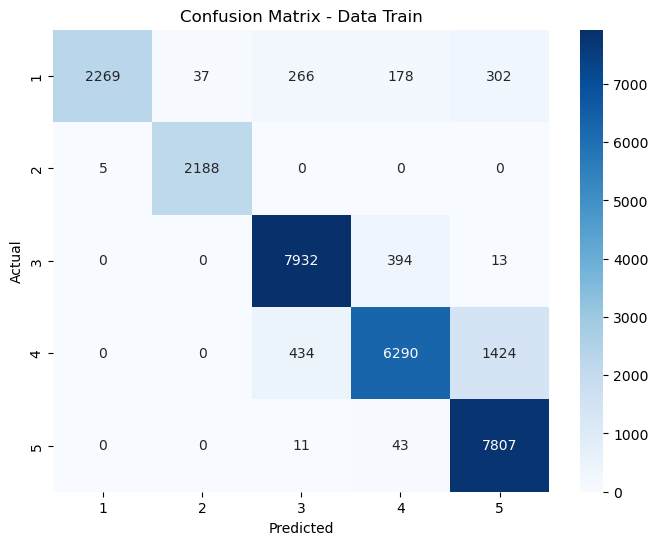

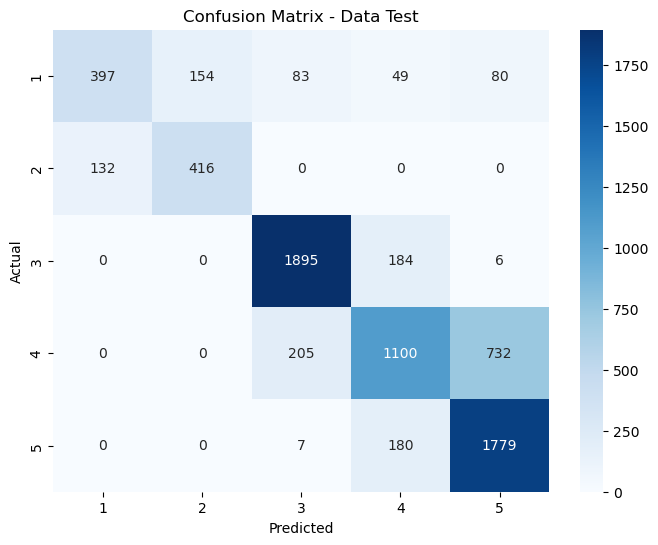

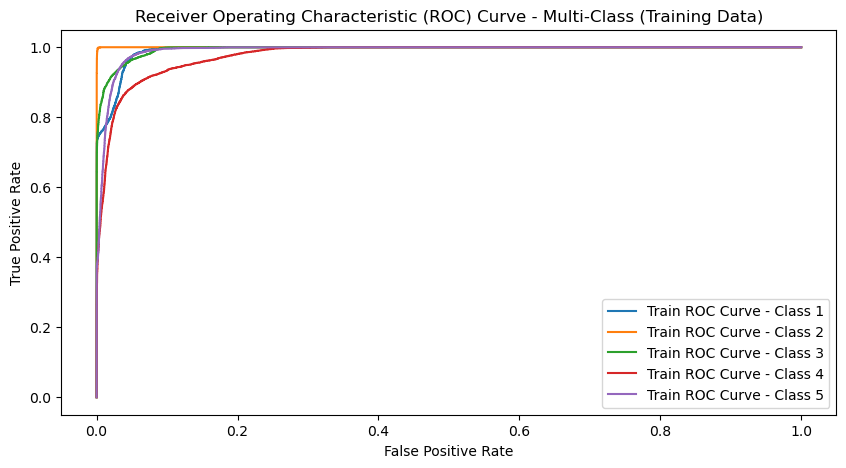

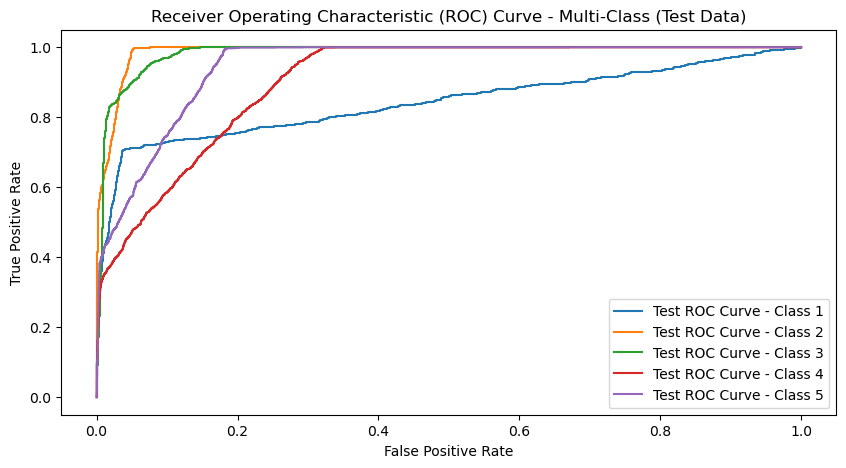

In [ ]:
import sklearn.ensemble as ske
import sklearn.metrics as skm
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

rf_model_1 = ske.RandomForestClassifier(verbose=0, random_state=0, n_jobs=-1, class_weight='balanced_subsample',
                                      n_estimators=100, max_depth=15, min_samples_split=5, min_samples_leaf=1)
rf_model_1.fit(X_train, y_train)

# predict
y_train_pred = rf_model_1.predict(X_train)
y_test_pred = rf_model_1.predict(X_test)

# Calculate metrics
train_accuracy = skm.accuracy_score(y_train, y_train_pred)
train_precision = skm.precision_score(y_train, y_train_pred, average='macro')
train_recall = skm.recall_score(y_train, y_train_pred, average='macro')
train_f1_score = skm.f1_score(y_train, y_train_pred, average="macro")
train_f2_score = skm.fbeta_score(y_train, y_train_pred, beta=2, average='macro')

test_accuracy = skm.accuracy_score(y_test, y_test_pred)
test_precision = skm.precision_score(y_test, y_test_pred, average='macro')
test_recall = skm.recall_score(y_test, y_test_pred, average='macro')
test_f1_score = skm.f1_score(y_test, y_test_pred, average="macro")
test_f2_score = skm.fbeta_score(y_test, y_test_pred, beta=2, average='macro')

# Display results in a tabular format
print("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format("", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score"))
print("{:<10} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format("Data Train", train_accuracy, train_precision, train_recall, train_f1_score, train_f2_score))
print("{:<10} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format("Data Test", test_accuracy, test_precision, test_recall, test_f1_score, test_f2_score))


# Menghitung Confusion Matrix untuk Data Train dan Data Test
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

# Membuat heatmap untuk Confusion Matrix Data Train
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Data Train')
plt.show()

# Membuat heatmap untuk Confusion Matrix Data Test
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Data Test')
plt.show()

# Menghitung probabilitas prediksi untuk setiap kelas
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
# Menghitung probabilitas prediksi untuk setiap kelas
y_train_scores = rf_model_1.predict_proba(X_train)
y_test_scores = rf_model_1.predict_proba(X_test)



# Menghitung kurva ROC dan AUC untuk setiap kelas pada data latih
fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()

for i in range(len(np.unique(y_train))):
    fpr_train[i], tpr_train[i], _ = roc_curve(y_train_bin[:, i], y_train_scores[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Plotting kurva ROC AUC untuk setiap kelas pada data latih
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y_train))):
    plt.plot(fpr_train[i], tpr_train[i], label='Train ROC Curve - Class {}'.format(np.unique(y_train)[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multi-Class (Training Data)')
plt.legend(loc="best")

# Menghitung kurva ROC dan AUC untuk setiap kelas pada data uji
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()

for i in range(len(np.unique(y_train))):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_test_scores[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

# Plotting kurva ROC AUC untuk setiap kelas pada data uji
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y_train))):
    plt.plot(fpr_test[i], tpr_test[i], label='Test ROC Curve - Class {}'.format(np.unique(y_train)[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multi-Class (Test Data)')
plt.legend(loc="best")

plt.show()


**3. SVM**

           Accuracy   Precision  Recall     F1 Score   F2 Score  
SVM Train (SVC) 0.5437     0.5056     0.5412     0.4670     0.5014    
SVM Test (SVC) 0.5464     0.5159     0.5441     0.4737     0.5063    


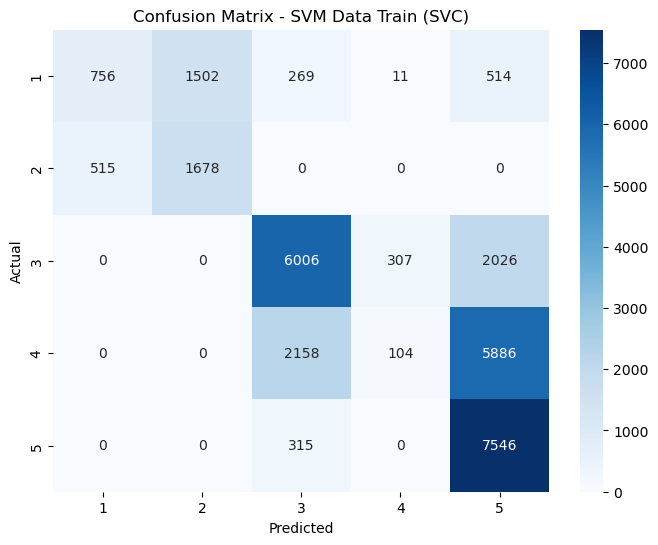

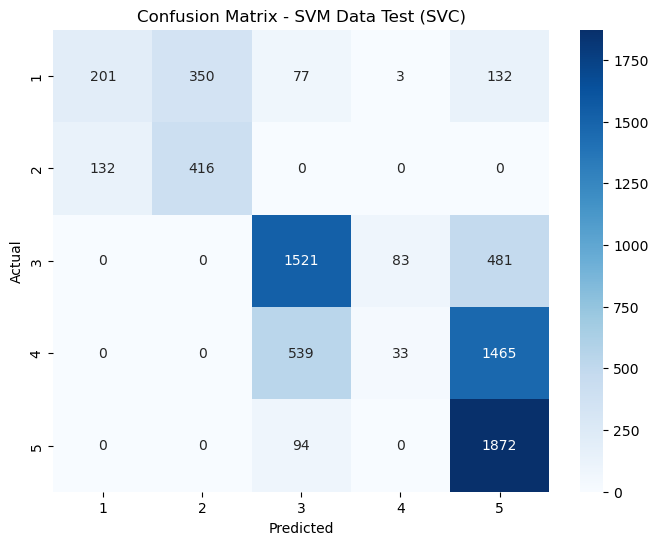

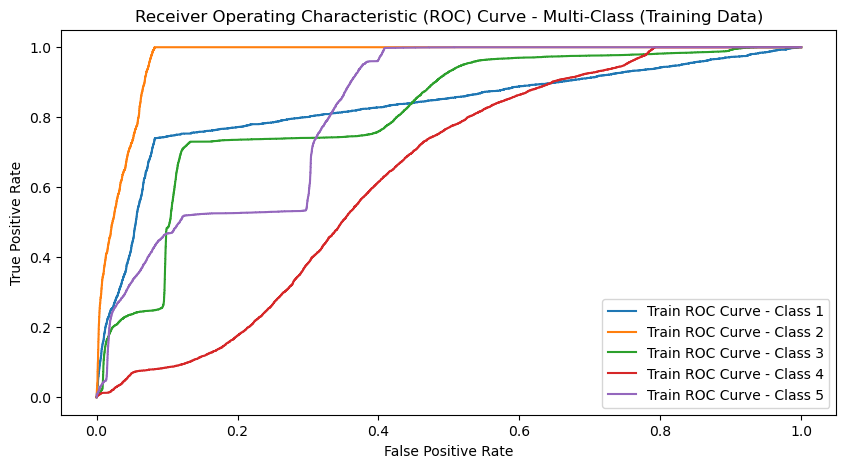

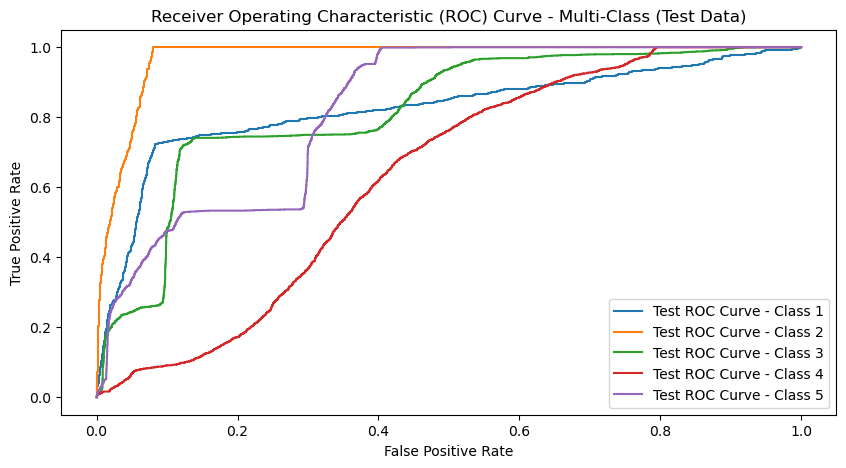

In [ ]:
import sklearn.svm as svm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Create and train the SVM (SVC) model
svc_model = svm.SVC(kernel='linear', random_state=0, class_weight='balanced')
svc_model.fit(X_train, y_train)

# Predict
y_train_pred_svc = svc_model.predict(X_train)
y_test_pred_svc = svc_model.predict(X_test)

# Calculate metrics for SVM (SVC)
train_accuracy_svc = skm.accuracy_score(y_train, y_train_pred_svc)
train_precision_svc = skm.precision_score(y_train, y_train_pred_svc, average='macro')
train_recall_svc = skm.recall_score(y_train, y_train_pred_svc, average='macro')
train_f1_score_svc = skm.f1_score(y_train, y_train_pred_svc, average="macro")
train_f2_score_svc = skm.fbeta_score(y_train, y_train_pred_svc, beta=2, average='macro')

test_accuracy_svc = skm.accuracy_score(y_test, y_test_pred_svc)
test_precision_svc = skm.precision_score(y_test, y_test_pred_svc, average='macro')
test_recall_svc = skm.recall_score(y_test, y_test_pred_svc, average='macro')
test_f1_score_svc = skm.f1_score(y_test, y_test_pred_svc, average="macro")
test_f2_score_svc = skm.fbeta_score(y_test, y_test_pred_svc, beta=2, average='macro')

# Display results in a tabular format for SVM (SVC)
print("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format("", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score"))
print("{:<10} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format("SVM Train (SVC)", train_accuracy_svc, train_precision_svc, train_recall_svc, train_f1_score_svc, train_f2_score_svc))
print("{:<10} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format("SVM Test (SVC)", test_accuracy_svc, test_precision_svc, test_recall_svc, test_f1_score_svc, test_f2_score_svc))

# Menghitung Confusion Matrix untuk SVM Data Train dan Data Test (SVC)
confusion_matrix_train_svc = confusion_matrix(y_train, y_train_pred_svc)
confusion_matrix_test_svc = confusion_matrix(y_test, y_test_pred_svc)

# Membuat heatmap untuk Confusion Matrix SVM Data Train (SVC)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train_svc, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM Data Train (SVC)')
plt.show()

# Membuat heatmap untuk Confusion Matrix SVM Data Test (SVC)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test_svc, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM Data Test (SVC)')
plt.show()

# Menghitung probabilitas prediksi untuk setiap kelas
y_train_scores_svc = svc_model.decision_function(X_train)
y_test_scores_svc = svc_model.decision_function(X_test)

# Menghitung kurva ROC dan AUC untuk setiap kelas pada data latih
fpr_train_svc = dict()
tpr_train_svc = dict()
roc_auc_train_svc = dict()

for i in range(len(np.unique(y_train))):
    fpr_train_svc[i], tpr_train_svc[i], _ = roc_curve(y_train_bin[:, i], y_train_scores_svc[:, i])
    roc_auc_train_svc[i] = auc(fpr_train_svc[i], tpr_train_svc[i])

# Plotting kurva ROC AUC untuk setiap kelas pada data latih
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y_train))):
    plt.plot(fpr_train_svc[i], tpr_train_svc[i], label='Train ROC Curve - Class {}'.format(np.unique(y_train)[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multi-Class (Training Data)')
plt.legend(loc="best")

# Menghitung kurva ROC dan AUC untuk setiap kelas pada data uji
fpr_test_svc = dict()
tpr_test_svc = dict()
roc_auc_test_svc = dict()

for i in range(len(np.unique(y_train))):
    fpr_test_svc[i], tpr_test_svc[i], _ = roc_curve(y_test_bin[:, i], y_test_scores_svc[:, i])
    roc_auc_test_svc[i] = auc(fpr_test_svc[i], tpr_test_svc[i])

# Plotting kurva ROC AUC untuk setiap kelas pada data uji
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y_train))):
    plt.plot(fpr_test_svc[i], tpr_test_svc[i], label='Test ROC Curve - Class {}'.format(np.unique(y_train)[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multi-Class (Test Data)')
plt.legend(loc="best")

plt.show()


**4.Logistic Regression**

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


           Accuracy   Precision  Recall     F1 Score   F2 Score  
Logistic Regression Train 0.4893     0.5041     0.4983     0.4782     0.4863    
Logistic Regression Test 0.4947     0.5095     0.5026     0.4851     0.4920    


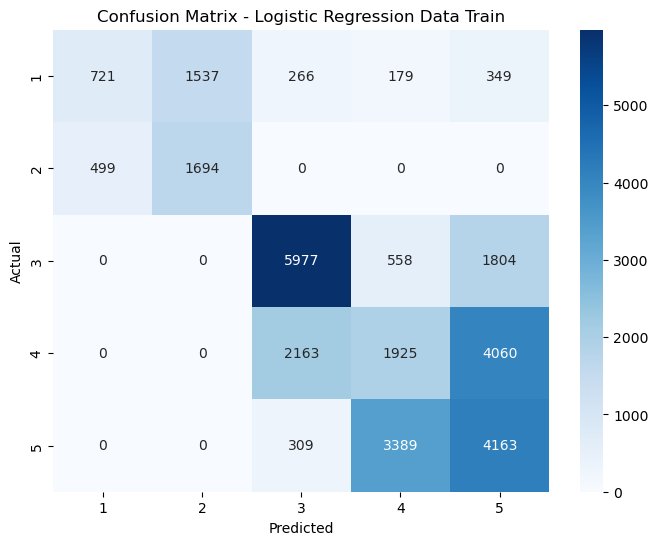

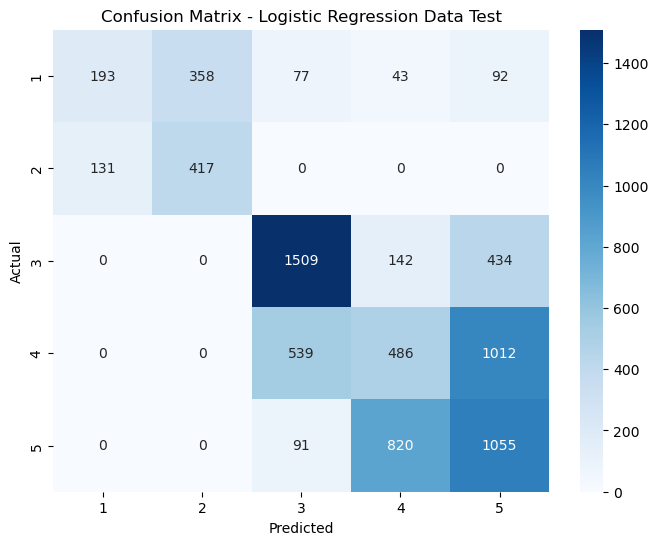

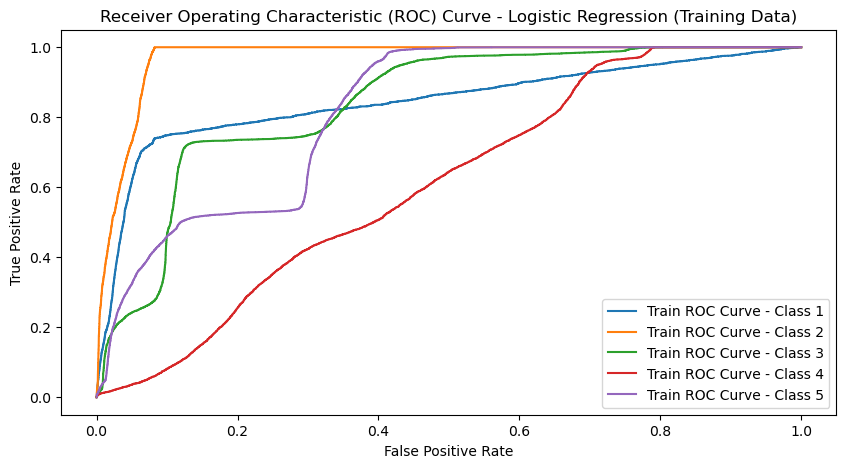

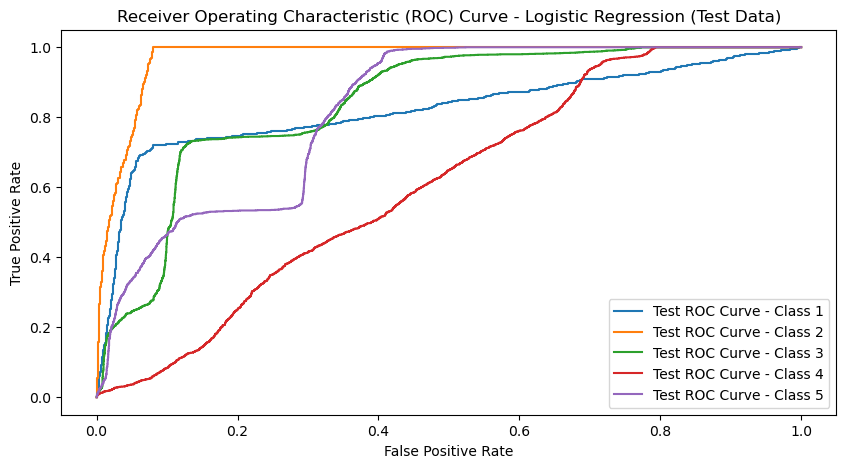

In [ ]:
import sklearn.linear_model as lm

# Create and train the Logistic Regression model
logistic_model_1 = lm.LogisticRegression(class_weight='balanced', random_state=0)
logistic_model_1.fit(X_train, y_train)

# Predict
y_train_pred_logistic = logistic_model_1.predict(X_train)
y_test_pred_logistic = logistic_model_1.predict(X_test)

# Calculate metrics for Logistic Regression
train_accuracy_logistic = skm.accuracy_score(y_train, y_train_pred_logistic)
train_precision_logistic = skm.precision_score(y_train, y_train_pred_logistic, average='macro')
train_recall_logistic = skm.recall_score(y_train, y_train_pred_logistic, average='macro')
train_f1_score_logistic = skm.f1_score(y_train, y_train_pred_logistic, average="macro")
train_f2_score_logistic = skm.fbeta_score(y_train, y_train_pred_logistic, beta=2, average='macro')

test_accuracy_logistic = skm.accuracy_score(y_test, y_test_pred_logistic)
test_precision_logistic = skm.precision_score(y_test, y_test_pred_logistic, average='macro')
test_recall_logistic = skm.recall_score(y_test, y_test_pred_logistic, average='macro')
test_f1_score_logistic = skm.f1_score(y_test, y_test_pred_logistic, average="macro")
test_f2_score_logistic = skm.fbeta_score(y_test, y_test_pred_logistic, beta=2, average='macro')

# Display results in a tabular format for Logistic Regression
print("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format("", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score"))
print("{:<10} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format("Logistic Regression Train", train_accuracy_logistic, train_precision_logistic, train_recall_logistic, train_f1_score_logistic, train_f2_score_logistic))
print("{:<10} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format("Logistic Regression Test", test_accuracy_logistic, test_precision_logistic, test_recall_logistic, test_f1_score_logistic, test_f2_score_logistic))

# Menghitung Confusion Matrix untuk Logistic Regression Data Train dan Data Test
confusion_matrix_train_logistic = confusion_matrix(y_train, y_train_pred_logistic)
confusion_matrix_test_logistic = confusion_matrix(y_test, y_test_pred_logistic)

# Membuat heatmap untuk Confusion Matrix Logistic Regression Data Train
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train_logistic, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression Data Train')
plt.show()

# Membuat heatmap untuk Confusion Matrix Logistic Regression Data Test
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test_logistic, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression Data Test')
plt.show()

# Menghitung probabilitas prediksi untuk setiap kelas
y_train_scores = logistic_model_1.predict_proba(X_train)
y_test_scores = logistic_model_1.predict_proba(X_test)

# Menghitung kurva ROC dan AUC untuk setiap kelas pada data latih
fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()

for i in range(len(np.unique(y_train))):
    fpr_train[i], tpr_train[i], _ = roc_curve(y_train_bin[:, i], y_train_scores[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Plotting kurva ROC AUC untuk setiap kelas pada data latih
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y_train))):
    plt.plot(fpr_train[i], tpr_train[i], label='Train ROC Curve - Class {}'.format(np.unique(y_train)[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression (Training Data)')
plt.legend(loc="best")

# Menghitung kurva ROC dan AUC untuk setiap kelas pada data uji
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()

for i in range(len(np.unique(y_train))):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_test_scores[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

# Plotting kurva ROC AUC untuk setiap kelas pada data uji
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y_train))):
    plt.plot(fpr_test[i], tpr_test[i], label='Test ROC Curve - Class {}'.format(np.unique(y_train)[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression (Test Data)')
plt.legend(loc="best")

plt.show()

**5.KNN**

           Accuracy   Precision  Recall     F1 Score   F2 Score  
KNN Train  0.6402     0.6571     0.6356     0.6425     0.6374    
KNN Test   0.4526     0.4644     0.4528     0.4547     0.4526    


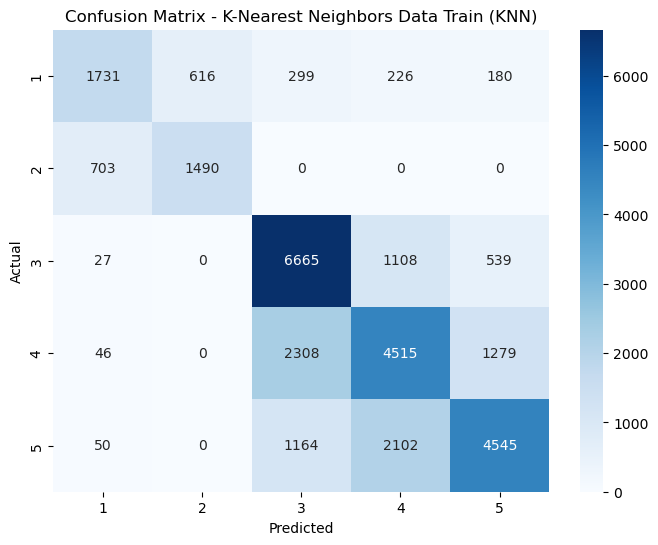

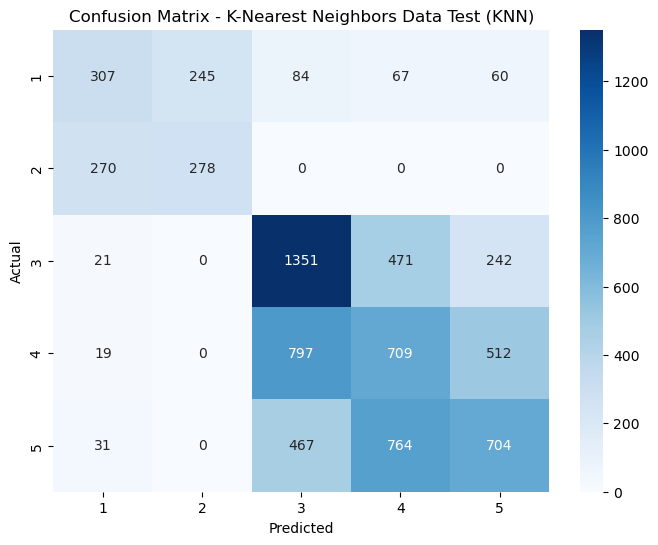

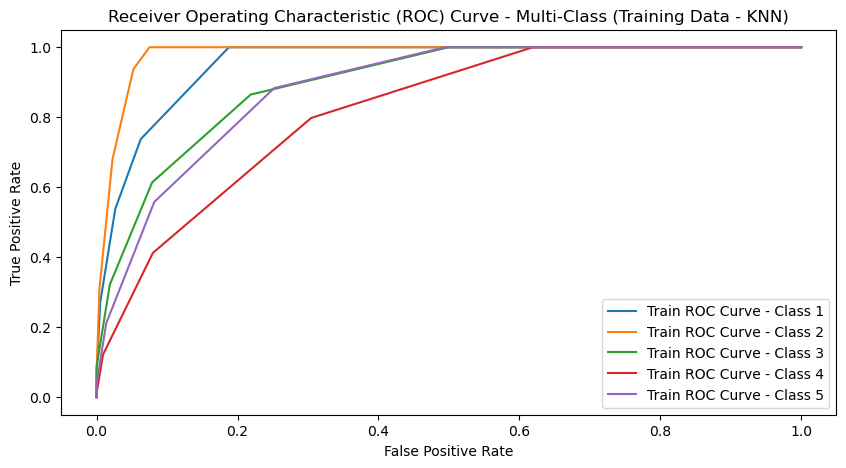

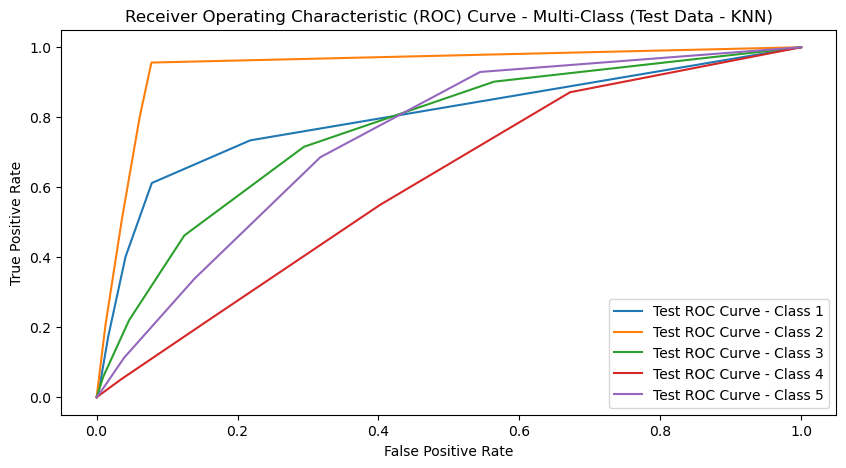

In [ ]:
import sklearn.neighbors as neighbors
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create and train the K-Nearest Neighbors (KNN) model
knn_model = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_model.fit(X_train, y_train)

# Predict
y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)

# Calculate metrics for K-Nearest Neighbors (KNN)
train_accuracy_knn = skm.accuracy_score(y_train, y_train_pred_knn)
train_precision_knn = skm.precision_score(y_train, y_train_pred_knn, average='macro')
train_recall_knn = skm.recall_score(y_train, y_train_pred_knn, average='macro')
train_f1_score_knn = skm.f1_score(y_train, y_train_pred_knn, average="macro")
train_f2_score_knn = skm.fbeta_score(y_train, y_train_pred_knn, beta=2, average='macro')

test_accuracy_knn = skm.accuracy_score(y_test, y_test_pred_knn)
test_precision_knn = skm.precision_score(y_test, y_test_pred_knn, average='macro')
test_recall_knn = skm.recall_score(y_test, y_test_pred_knn, average='macro')
test_f1_score_knn = skm.f1_score(y_test, y_test_pred_knn, average="macro")
test_f2_score_knn = skm.fbeta_score(y_test, y_test_pred_knn, beta=2, average='macro')

# Display results in a tabular format for K-Nearest Neighbors (KNN)
print("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format("", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score"))
print("{:<10} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format("KNN Train", train_accuracy_knn, train_precision_knn, train_recall_knn, train_f1_score_knn, train_f2_score_knn))
print("{:<10} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format("KNN Test", test_accuracy_knn, test_precision_knn, test_recall_knn, test_f1_score_knn, test_f2_score_knn))

# Menghitung Confusion Matrix untuk K-Nearest Neighbors Data Train dan Data Test (KNN)
confusion_matrix_train_knn = confusion_matrix(y_train, y_train_pred_knn)
confusion_matrix_test_knn = confusion_matrix(y_test, y_test_pred_knn)

# Membuat heatmap untuk Confusion Matrix K-Nearest Neighbors Data Train (KNN)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K-Nearest Neighbors Data Train (KNN)')
plt.show()

# Membuat heatmap untuk Confusion Matrix K-Nearest Neighbors Data Test (KNN)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K-Nearest Neighbors Data Test (KNN)')
plt.show()

# Menghitung probabilitas prediksi untuk setiap kelas
y_train_scores_knn = knn_model.predict_proba(X_train)
y_test_scores_knn = knn_model.predict_proba(X_test)

# Menghitung kurva ROC dan AUC untuk setiap kelas pada data latih
fpr_train_knn = dict()
tpr_train_knn = dict()
roc_auc_train_knn = dict()

for i in range(len(np.unique(y_train))):
    fpr_train_knn[i], tpr_train_knn[i], _ = roc_curve(y_train_bin[:, i], y_train_scores_knn[:, i])
    roc_auc_train_knn[i] = auc(fpr_train_knn[i], tpr_train_knn[i])

# Plotting kurva ROC AUC untuk setiap kelas pada data latih
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y_train))):
    plt.plot(fpr_train_knn[i], tpr_train_knn[i], label='Train ROC Curve - Class {}'.format(np.unique(y_train)[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multi-Class (Training Data - KNN)')
plt.legend(loc="best")

# Menghitung kurva ROC dan AUC untuk setiap kelas pada data uji
fpr_test_knn = dict()
tpr_test_knn = dict()
roc_auc_test_knn = dict()

for i in range(len(np.unique(y_train))):
    fpr_test_knn[i], tpr_test_knn[i], _ = roc_curve(y_test_bin[:, i], y_test_scores_knn[:, i])
    roc_auc_test_knn[i] = auc(fpr_test_knn[i], tpr_test_knn[i])

# Plotting kurva ROC AUC untuk setiap kelas pada data uji
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y_train))):
    plt.plot(fpr_test_knn[i], tpr_test_knn[i], label='Test ROC Curve - Class {}'.format(np.unique(y_train)[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multi-Class (Test Data - KNN)')
plt.legend(loc="best")

plt.show()


**8.2 MODEL LABEL ENCODING (ENCODE 2)**

**1. Decision Tree**

Model                                    Accuracy   Precision  Recall     F1 Score   F2 Score  
Decision Tree Train (dt_model_2)         0.8634     0.8704     0.8672     0.8640     0.8648    
Decision Tree Test (dt_model_2)          0.7248     0.6955     0.6986     0.6926     0.6952    


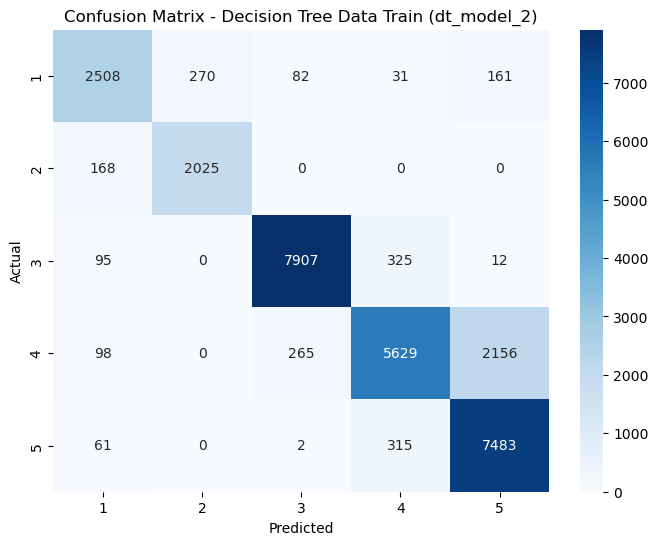

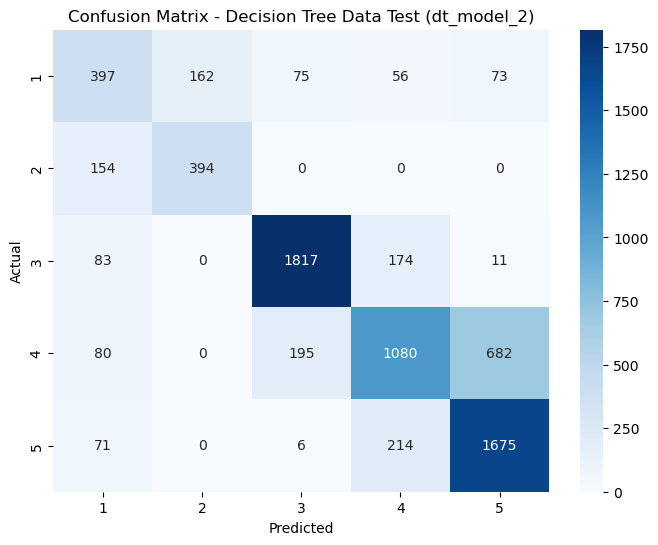

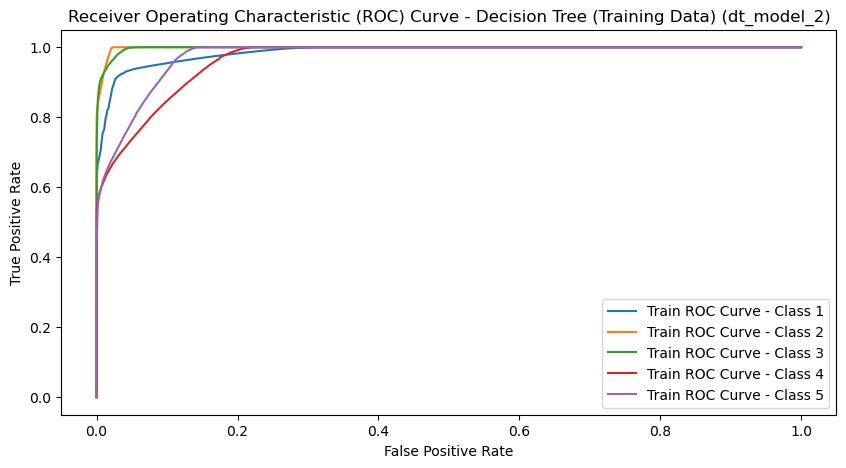

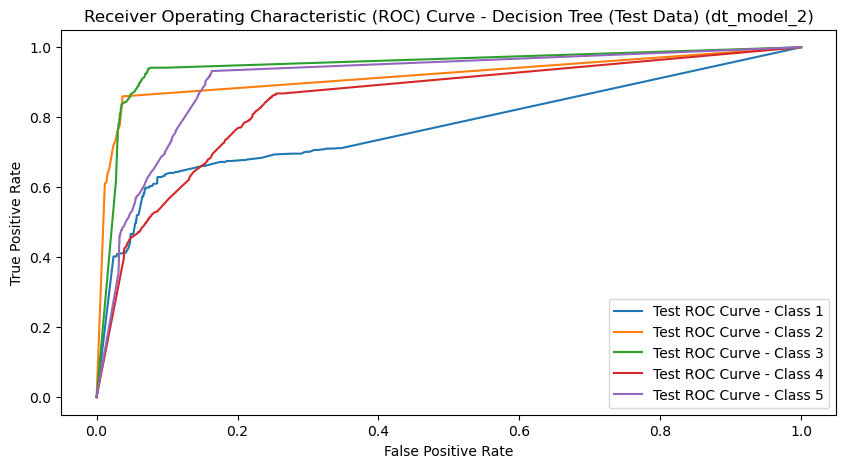

In [ ]:
import sklearn.tree as tree
import sklearn.metrics as skm

# Create and train the Decision Tree model (dt_model_2)
dt_model_2 = tree.DecisionTreeClassifier(random_state=0, class_weight='balanced',
                                         max_depth=15, min_samples_split=5, min_samples_leaf=1)
dt_model_2.fit(X_train_2, y_train_2)

# Predict
y_train_pred_dt2 = dt_model_2.predict(X_train_2)
y_test_pred_dt2 = dt_model_2.predict(X_test_2)

# Calculate metrics for Decision Tree (dt_model_2)
train_accuracy_dt2 = skm.accuracy_score(y_train_2, y_train_pred_dt2)
train_precision_dt2 = skm.precision_score(y_train_2, y_train_pred_dt2, average='macro')
train_recall_dt2 = skm.recall_score(y_train_2, y_train_pred_dt2, average='macro')
train_f1_score_dt2 = skm.f1_score(y_train_2, y_train_pred_dt2, average="macro")
train_f2_score_dt2 = skm.fbeta_score(y_train_2, y_train_pred_dt2, beta=2, average='macro')

test_accuracy_dt2 = skm.accuracy_score(y_test_2, y_test_pred_dt2)
test_precision_dt2 = skm.precision_score(y_test_2, y_test_pred_dt2, average='macro')
test_recall_dt2 = skm.recall_score(y_test_2, y_test_pred_dt2, average='macro')
test_f1_score_dt2 = skm.f1_score(y_test_2, y_test_pred_dt2, average="macro")
test_f2_score_dt2 = skm.fbeta_score(y_test_2, y_test_pred_dt2, beta=2, average='macro')

# Display results in a tabular format for Decision Tree (dt_model_2)
print("{:<40} {:<10} {:<10} {:<10} {:<10} {:<10}".format(
    "Model",
    "Accuracy",
    "Precision",
    "Recall",
    "F1 Score",
    "F2 Score"
))
print("{:<40} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format(
    "Decision Tree Train (dt_model_2)",
    train_accuracy_dt2,
    train_precision_dt2,
    train_recall_dt2,
    train_f1_score_dt2,
    train_f2_score_dt2
))
print("{:<40} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format(
    "Decision Tree Test (dt_model_2)",
    test_accuracy_dt2,
    test_precision_dt2,
    test_recall_dt2,
    test_f1_score_dt2,
    test_f2_score_dt2
))

# Menghitung Confusion Matrix untuk Decision Tree Data Train dan Data Test (dt_model_2)
confusion_matrix_train_dt2 = confusion_matrix(y_train_2, y_train_pred_dt2)
confusion_matrix_test_dt2 = confusion_matrix(y_test_2, y_test_pred_dt2)

# Membuat heatmap untuk Confusion Matrix Decision Tree Data Train (dt_model_2)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train_dt2, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train_2), yticklabels=np.unique(y_train_2))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Data Train (dt_model_2)')
plt.show()

# Membuat heatmap untuk Confusion Matrix Decision Tree Data Test (dt_model_2)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test_dt2, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train_2), yticklabels=np.unique(y_train_2))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Data Test (dt_model_2)')
plt.show()


# Menghitung probabilitas prediksi untuk setiap kelas
y_train_bin = label_binarize(y_train_2, classes=np.unique(y_train_2))
y_test_bin = label_binarize(y_test_2, classes=np.unique(y_train_2))

# Menghitung probabilitas prediksi untuk setiap kelas
y_train_scores_dt2 = dt_model_2.predict_proba(X_train_2)
y_test_scores_dt2 = dt_model_2.predict_proba(X_test_2)

# Menghitung kurva ROC dan AUC untuk setiap kelas pada data latih
fpr_train_dt2 = dict()
tpr_train_dt2 = dict()
roc_auc_train_dt2 = dict()

for i in range(len(np.unique(y_train_2))):
    fpr_train_dt2[i], tpr_train_dt2[i], _ = roc_curve(y_train_bin[:, i], y_train_scores_dt2[:, i])
    roc_auc_train_dt2[i] = auc(fpr_train_dt2[i], tpr_train_dt2[i])

# Plotting kurva ROC AUC untuk setiap kelas pada data latih
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y_train_2))):
    plt.plot(fpr_train_dt2[i], tpr_train_dt2[i], label='Train ROC Curve - Class {}'.format(np.unique(y_train_2)[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree (Training Data) (dt_model_2)')
plt.legend(loc="best")

# Menghitung kurva ROC AUC untuk setiap kelas pada data uji
fpr_test_dt2 = dict()
tpr_test_dt2 = dict()
roc_auc_test_dt2 = dict()

for i in range(len(np.unique(y_train_2))):
    fpr_test_dt2[i], tpr_test_dt2[i], _ = roc_curve(y_test_bin[:, i], y_test_scores_dt2[:, i])
    roc_auc_test_dt2[i] = auc(fpr_test_dt2[i], tpr_test_dt2[i])

# Plotting kurva ROC AUC untuk setiap kelas pada data uji
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y_train_2))):
    plt.plot(fpr_test_dt2[i], tpr_test_dt2[i], label='Test ROC Curve - Class {}'.format(np.unique(y_train_2)[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree (Test Data) (dt_model_2)')
plt.legend(loc="best")

plt.show()


**2. Random Forest**

                                Accuracy   Precision  Recall     F1 Score   F2 Score  
Random Forest Train (rf_model_2) 0.9460     0.9593     0.9367     0.9454     0.9396    
Random Forest Test (rf_model_2)  0.7547     0.7505     0.7247     0.7293     0.7247    


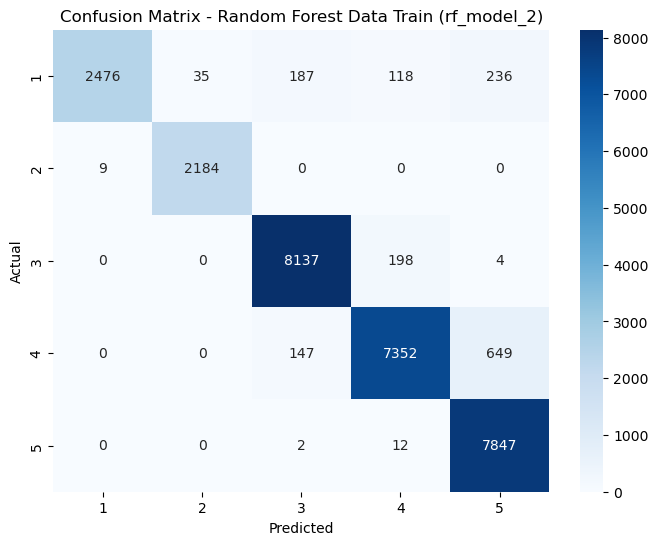

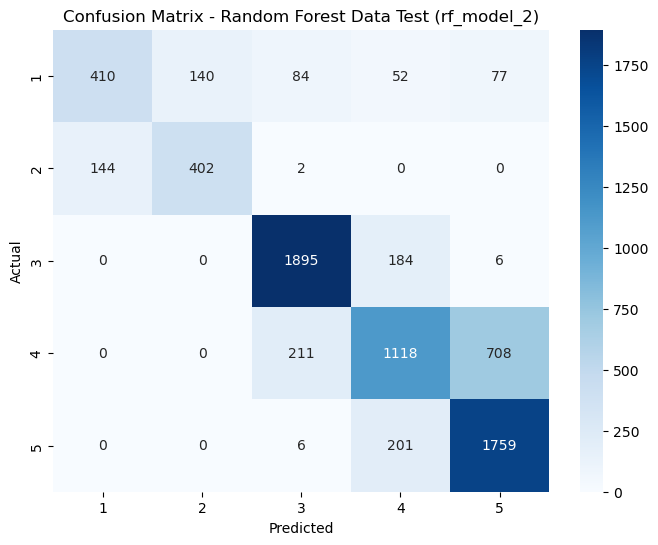

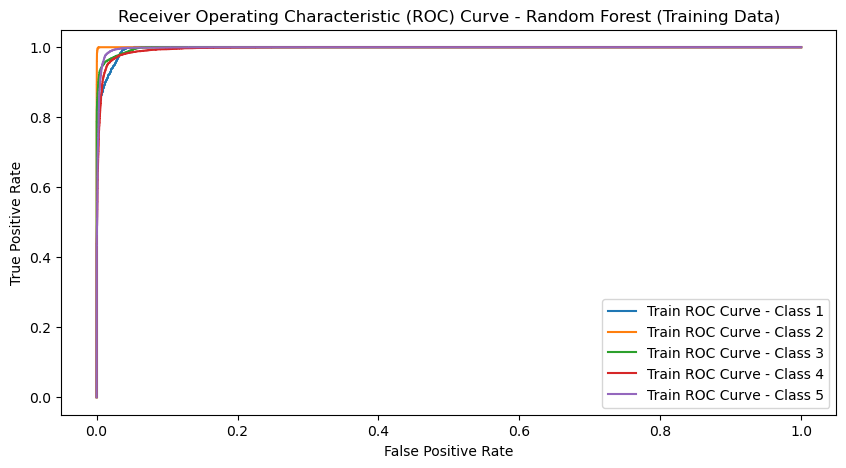

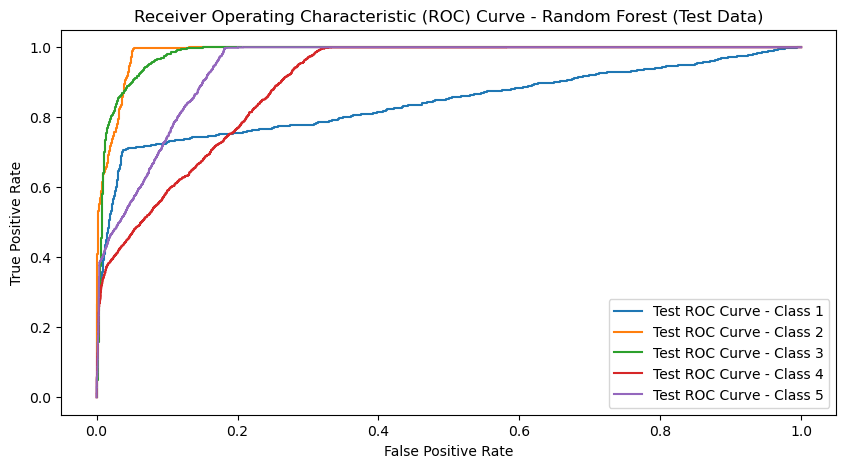

In [ ]:
import sklearn.ensemble as ske
import sklearn.metrics as skm

# Create and train the Random Forest model (rf_model_2)
rf_model_2 = ske.RandomForestClassifier(verbose=0, random_state=0, n_jobs=-1, class_weight='balanced_subsample',
                                      n_estimators=100, max_depth=15, min_samples_split=5, min_samples_leaf=1)
rf_model_2.fit(X_train_2, y_train_2)

# Predict
y_train_pred_rf2 = rf_model_2.predict(X_train_2)
y_test_pred_rf2 = rf_model_2.predict(X_test_2)

# Calculate metrics for Random Forest (rf_model_2)
train_accuracy_rf2 = skm.accuracy_score(y_train_2, y_train_pred_rf2)
train_precision_rf2 = skm.precision_score(y_train_2, y_train_pred_rf2, average='macro')
train_recall_rf2 = skm.recall_score(y_train_2, y_train_pred_rf2, average='macro')
train_f1_score_rf2 = skm.f1_score(y_train_2, y_train_pred_rf2, average="macro")
train_f2_score_rf2 = skm.fbeta_score(y_train_2, y_train_pred_rf2, beta=2, average='macro')

test_accuracy_rf2 = skm.accuracy_score(y_test_2, y_test_pred_rf2)
test_precision_rf2 = skm.precision_score(y_test_2, y_test_pred_rf2, average='macro')
test_recall_rf2 = skm.recall_score(y_test_2, y_test_pred_rf2, average='macro')
test_f1_score_rf2 = skm.f1_score(y_test_2, y_test_pred_rf2, average="macro")
test_f2_score_rf2 = skm.fbeta_score(y_test_2, y_test_pred_rf2, beta=2, average='macro')

# Display results in a tabular format for Random Forest (rf_model_2)
print("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format("                               ", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score"))
print("{:<10} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format("Random Forest Train (rf_model_2)", train_accuracy_rf2, train_precision_rf2, train_recall_rf2, train_f1_score_rf2, train_f2_score_rf2))
print("{:<10} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format("Random Forest Test (rf_model_2) ", test_accuracy_rf2, test_precision_rf2, test_recall_rf2, test_f1_score_rf2, test_f2_score_rf2))

# Menghitung Confusion Matrix untuk Random Forest Data Train dan Data Test (rf_model_2)
confusion_matrix_train_rf2 = confusion_matrix(y_train_2, y_train_pred_rf2)
confusion_matrix_test_rf2 = confusion_matrix(y_test_2, y_test_pred_rf2)

# Membuat heatmap untuk Confusion Matrix Random Forest Data Train (rf_model_2)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train_rf2, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train_2), yticklabels=np.unique(y_train_2))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Data Train (rf_model_2)')
plt.show()

# Membuat heatmap untuk Confusion Matrix Random Forest Data Test (rf_model_2)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test_rf2, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train_2), yticklabels=np.unique(y_train_2))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Data Test (rf_model_2)')
plt.show()

# Menghitung probabilitas prediksi untuk setiap kelas
y_train_scores = rf_model_2.predict_proba(X_train_2)
y_test_scores = rf_model_2.predict_proba(X_test_2)  # Menggunakan X_test_2

# Menghitung kurva ROC dan AUC untuk setiap kelas pada data latih
fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()

for i in range(len(np.unique(y_train_2))):
    fpr_train[i], tpr_train[i], _ = roc_curve(y_train_bin[:, i], y_train_scores[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Plotting kurva ROC AUC untuk setiap kelas pada data latih
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y_train_2))):
    plt.plot(fpr_train[i], tpr_train[i], label='Train ROC Curve - Class {}'.format(np.unique(y_train_2)[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest (Training Data)')
plt.legend(loc="best")

# Menghitung kurva ROC dan AUC untuk setiap kelas pada data uji
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()

for i in range(len(np.unique(y_train_2))):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_test_scores[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

# Plotting kurva ROC AUC untuk setiap kelas pada data uji
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y_train_2))):
    plt.plot(fpr_test[i], tpr_test[i], label='Test ROC Curve - Class {}'.format(np.unique(y_train_2)[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest (Test Data)')
plt.legend(loc="best")

plt.show()

**3. SVM**

Model                                    Accuracy   Precision  Recall     F1 Score   F2 Score  
Support Vector Classifier Train (svc_model_2) 0.4632     0.3871     0.4684     0.3832     0.4251    
Support Vector Classifier Test (svc_model_2) 0.4644     0.3855     0.4674     0.3842     0.4254    


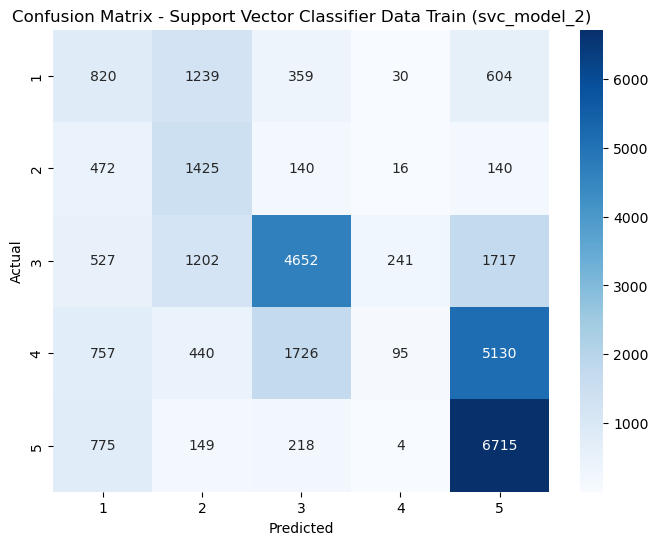

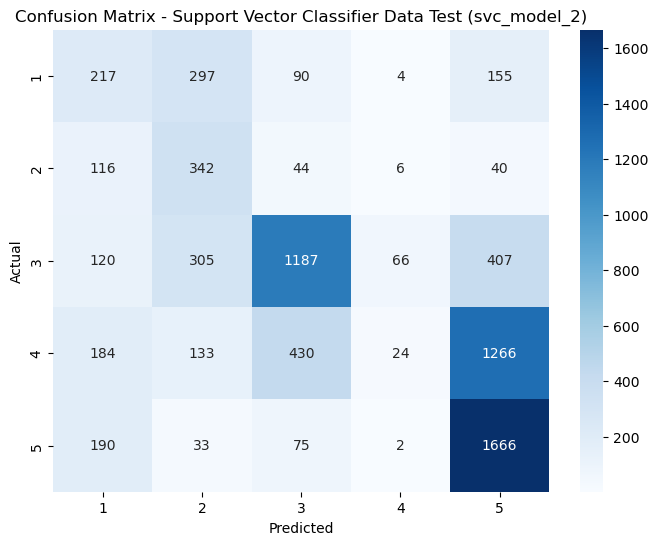

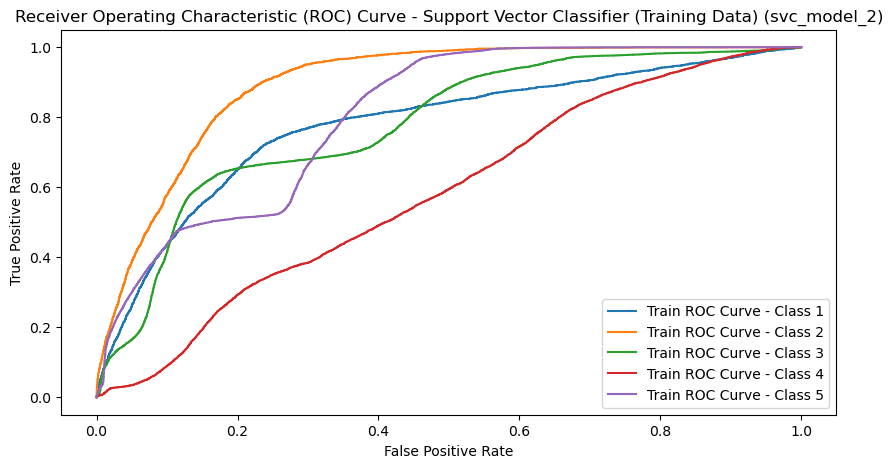

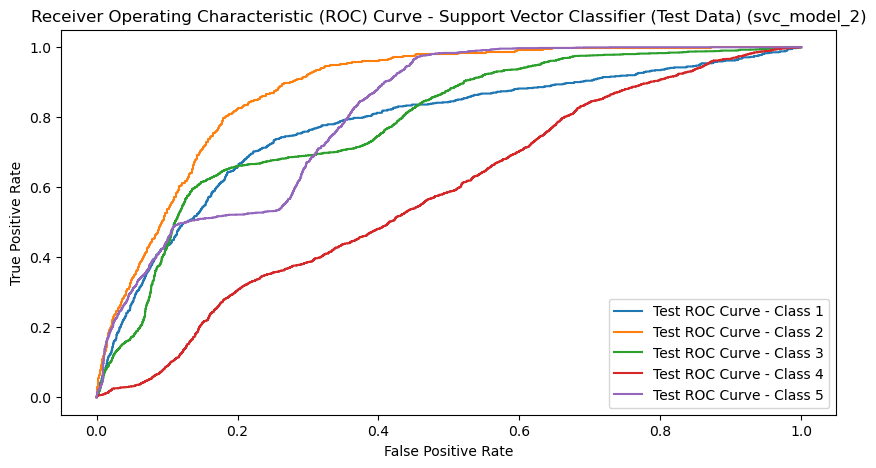

In [ ]:
import sklearn.svm as svm
import sklearn.metrics as skm

# Create and train the Support Vector Classifier (svc_model_2)
svc_model_2 = svm.SVC(kernel='linear', C=1, class_weight='balanced', random_state=0, probability=True)
svc_model_2.fit(X_train_2, y_train_2)

# Predict
y_train_pred_svc2 = svc_model_2.predict(X_train_2)
y_test_pred_svc2 = svc_model_2.predict(X_test_2)

# Calculate metrics for Support Vector Classifier (svc_model_2)
train_accuracy_svc2 = skm.accuracy_score(y_train_2, y_train_pred_svc2)
train_precision_svc2 = skm.precision_score(y_train_2, y_train_pred_svc2, average='macro')
train_recall_svc2 = skm.recall_score(y_train_2, y_train_pred_svc2, average='macro')
train_f1_score_svc2 = skm.f1_score(y_train_2, y_train_pred_svc2, average="macro")
train_f2_score_svc2 = skm.fbeta_score(y_train_2, y_train_pred_svc2, beta=2, average='macro')

test_accuracy_svc2 = skm.accuracy_score(y_test_2, y_test_pred_svc2)
test_precision_svc2 = skm.precision_score(y_test_2, y_test_pred_svc2, average='macro')
test_recall_svc2 = skm.recall_score(y_test_2, y_test_pred_svc2, average='macro')
test_f1_score_svc2 = skm.f1_score(y_test_2, y_test_pred_svc2, average="macro")
test_f2_score_svc2 = skm.fbeta_score(y_test_2, y_test_pred_svc2, beta=2, average='macro')

# Display results in a tabular format for Support Vector Classifier (svc_model_2)
print("{:<40} {:<10} {:<10} {:<10} {:<10} {:<10}".format(
    "Model",
    "Accuracy",
    "Precision",
    "Recall",
    "F1 Score",
    "F2 Score"
))
print("{:<40} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format(
    "Support Vector Classifier Train (svc_model_2)",
    train_accuracy_svc2,
    train_precision_svc2,
    train_recall_svc2,
    train_f1_score_svc2,
    train_f2_score_svc2
))
print("{:<40} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format(
    "Support Vector Classifier Test (svc_model_2)",
    test_accuracy_svc2,
    test_precision_svc2,
    test_recall_svc2,
    test_f1_score_svc2,
    test_f2_score_svc2
))

# Menghitung Confusion Matrix untuk Support Vector Classifier Data Train dan Data Test (svc_model_2)
confusion_matrix_train_svc2 = confusion_matrix(y_train_2, y_train_pred_svc2)
confusion_matrix_test_svc2 = confusion_matrix(y_test_2, y_test_pred_svc2)

# Membuat heatmap untuk Confusion Matrix Support Vector Classifier Data Train (svc_model_2)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train_svc2, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train_2), yticklabels=np.unique(y_train_2))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Support Vector Classifier Data Train (svc_model_2)')
plt.show()

# Membuat heatmap untuk Confusion Matrix Support Vector Classifier Data Test (svc_model_2)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test_svc2, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train_2), yticklabels=np.unique(y_train_2))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Support Vector Classifier Data Test (svc_model_2)')
plt.show()

# Menghitung probabilitas prediksi untuk setiap kelas
y_train_scores_svc2 = svc_model_2.predict_proba(X_train_2)
y_test_scores_svc2 = svc_model_2.predict_proba(X_test_2)

# Menghitung kurva ROC dan AUC untuk setiap kelas pada data latih
fpr_train_svc2 = dict()
tpr_train_svc2 = dict()
roc_auc_train_svc2 = dict()

for i in range(len(np.unique(y_train_2))):
    fpr_train_svc2[i], tpr_train_svc2[i], _ = roc_curve(y_train_bin[:, i], y_train_scores_svc2[:, i])
    roc_auc_train_svc2[i] = auc(fpr_train_svc2[i], tpr_train_svc2[i])

# Plotting kurva ROC AUC untuk setiap kelas pada data latih
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y_train_2))):
    plt.plot(fpr_train_svc2[i], tpr_train_svc2[i], label='Train ROC Curve - Class {}'.format(np.unique(y_train_2)[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Support Vector Classifier (Training Data) (svc_model_2)')
plt.legend(loc="best")

# Menghitung kurva ROC dan AUC untuk setiap kelas pada data uji
fpr_test_svc2 = dict()
tpr_test_svc2 = dict()
roc_auc_test_svc2 = dict()

for i in range(len(np.unique(y_train_2))):
    fpr_test_svc2[i], tpr_test_svc2[i], _ = roc_curve(y_test_bin[:, i], y_test_scores_svc2[:, i])
    roc_auc_test_svc2[i] = auc(fpr_test_svc2[i], tpr_test_svc2[i])

# Plotting kurva ROC AUC untuk setiap kelas pada data uji
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y_train_2))):
    plt.plot(fpr_test_svc2[i], tpr_test_svc2[i], label='Test ROC Curve - Class {}'.format(np.unique(y_train_2)[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Support Vector Classifier (Test Data) (svc_model_2)')
plt.legend(loc="best")

plt.show()

**4.Logistic Regression**

Model                                    Accuracy   Precision  Recall     F1 Score   F2 Score  
Logistic Regression Train (logistic_model_2) 0.4182     0.3865     0.4328     0.3946     0.4127    
Logistic Regression Test (logistic_model_2) 0.4229     0.3875     0.4337     0.3959     0.4139    


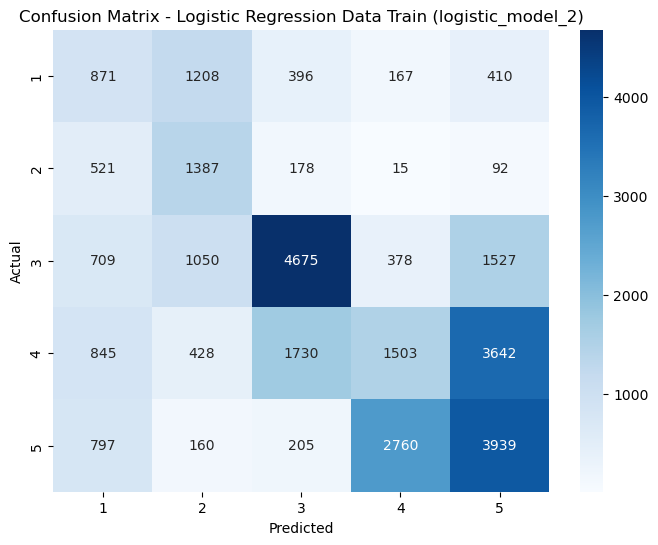

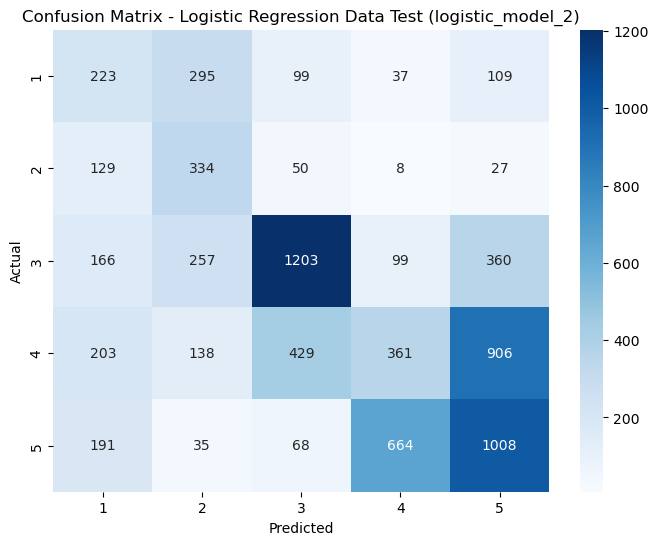

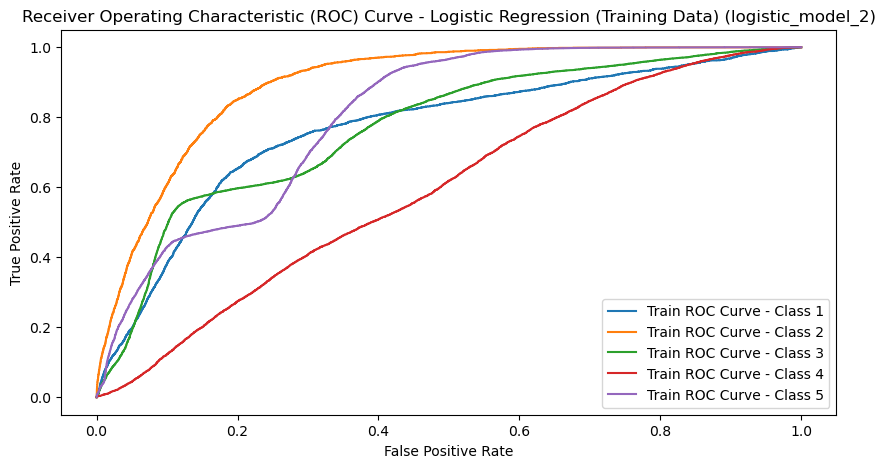

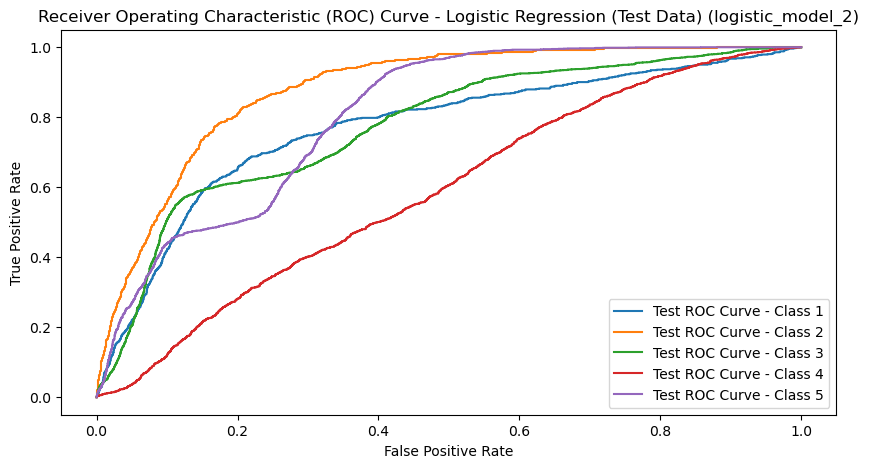

In [ ]:
import sklearn.linear_model as lm
import sklearn.metrics as skm

# Create and train the Logistic Regression model (logistic_model_2)
logistic_model_2 = lm.LogisticRegression(random_state=0, class_weight='balanced')
logistic_model_2.fit(X_train_2, y_train_2)

# Predict
y_train_pred_logistic2 = logistic_model_2.predict(X_train_2)
y_test_pred_logistic2 = logistic_model_2.predict(X_test_2)

# Calculate metrics for Logistic Regression (logistic_model_2)
train_accuracy_logistic2 = skm.accuracy_score(y_train_2, y_train_pred_logistic2)
train_precision_logistic2 = skm.precision_score(y_train_2, y_train_pred_logistic2, average='macro')
train_recall_logistic2 = skm.recall_score(y_train_2, y_train_pred_logistic2, average='macro')
train_f1_score_logistic2 = skm.f1_score(y_train_2, y_train_pred_logistic2, average="macro")
train_f2_score_logistic2 = skm.fbeta_score(y_train_2, y_train_pred_logistic2, beta=2, average='macro')

test_accuracy_logistic2 = skm.accuracy_score(y_test_2, y_test_pred_logistic2)
test_precision_logistic2 = skm.precision_score(y_test_2, y_test_pred_logistic2, average='macro')
test_recall_logistic2 = skm.recall_score(y_test_2, y_test_pred_logistic2, average='macro')
test_f1_score_logistic2 = skm.f1_score(y_test_2, y_test_pred_logistic2, average="macro")
test_f2_score_logistic2 = skm.fbeta_score(y_test_2, y_test_pred_logistic2, beta=2, average='macro')

# Display results in a tabular format for Logistic Regression (logistic_model_2)
print("{:<40} {:<10} {:<10} {:<10} {:<10} {:<10}".format(
    "Model",
    "Accuracy",
    "Precision",
    "Recall",
    "F1 Score",
    "F2 Score"
))
print("{:<40} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format(
    "Logistic Regression Train (logistic_model_2)",
    train_accuracy_logistic2,
    train_precision_logistic2,
    train_recall_logistic2,
    train_f1_score_logistic2,
    train_f2_score_logistic2
))
print("{:<40} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format(
    "Logistic Regression Test (logistic_model_2)",
    test_accuracy_logistic2,
    test_precision_logistic2,
    test_recall_logistic2,
    test_f1_score_logistic2,
    test_f2_score_logistic2
))

# Menghitung Confusion Matrix untuk Logistic Regression Data Train dan Data Test (logistic_model_2)
confusion_matrix_train_logistic2 = confusion_matrix(y_train_2, y_train_pred_logistic2)
confusion_matrix_test_logistic2 = confusion_matrix(y_test_2, y_test_pred_logistic2)

# Membuat heatmap untuk Confusion Matrix Logistic Regression Data Train (logistic_model_2)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train_logistic2, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train_2), yticklabels=np.unique(y_train_2))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression Data Train (logistic_model_2)')
plt.show()

# Membuat heatmap untuk Confusion Matrix Logistic Regression Data Test (logistic_model_2)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test_logistic2, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train_2), yticklabels=np.unique(y_train_2))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression Data Test (logistic_model_2)')
plt.show()

# Menghitung probabilitas prediksi untuk setiap kelas
y_train_scores_logistic2 = logistic_model_2.predict_proba(X_train_2)
y_test_scores_logistic2 = logistic_model_2.predict_proba(X_test_2)

# Menghitung kurva ROC dan AUC untuk setiap kelas pada data latih
fpr_train_logistic2 = dict()
tpr_train_logistic2 = dict()
roc_auc_train_logistic2 = dict()

for i in range(len(np.unique(y_train_2))):
    fpr_train_logistic2[i], tpr_train_logistic2[i], _ = roc_curve(y_train_bin[:, i], y_train_scores_logistic2[:, i])
    roc_auc_train_logistic2[i] = auc(fpr_train_logistic2[i], tpr_train_logistic2[i])

# Plotting kurva ROC AUC untuk setiap kelas pada data latih
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y_train_2))):
    plt.plot(fpr_train_logistic2[i], tpr_train_logistic2[i], label='Train ROC Curve - Class {}'.format(np.unique(y_train_2)[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression (Training Data) (logistic_model_2)')
plt.legend(loc="best")

# Menghitung kurva ROC dan AUC untuk setiap kelas pada data uji
fpr_test_logistic2 = dict()
tpr_test_logistic2 = dict()
roc_auc_test_logistic2 = dict()

for i in range(len(np.unique(y_train_2))):
    fpr_test_logistic2[i], tpr_test_logistic2[i], _ = roc_curve(y_test_bin[:, i], y_test_scores_logistic2[:, i])
    roc_auc_test_logistic2[i] = auc(fpr_test_logistic2[i], tpr_test_logistic2[i])

# Plotting kurva ROC AUC untuk setiap kelas pada data uji
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y_train_2))):
    plt.plot(fpr_test_logistic2[i], tpr_test_logistic2[i], label='Test ROC Curve - Class {}'.format(np.unique(y_train_2)[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression (Test Data) (logistic_model_2)')
plt.legend(loc="best")

plt.show()


**5.KNN**

           Accuracy   Precision  Recall     F1 Score   F2 Score  
KNN Train  0.6320     0.6245     0.6028     0.6105     0.6051    
KNN Test   0.4268     0.3955     0.3857     0.3877     0.3858    


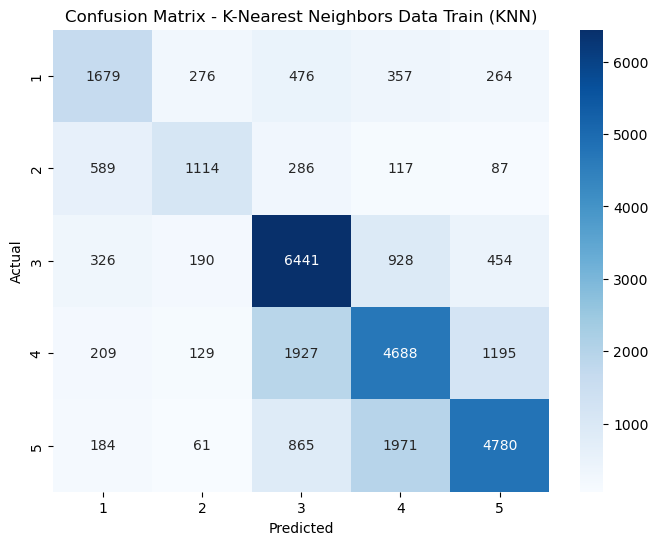

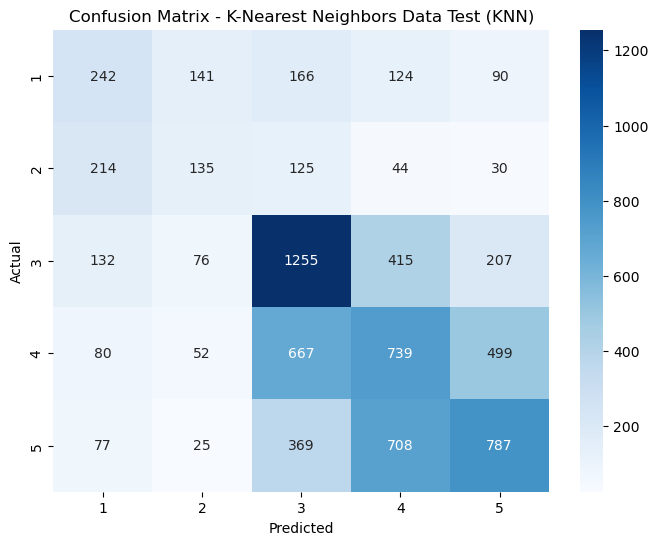

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

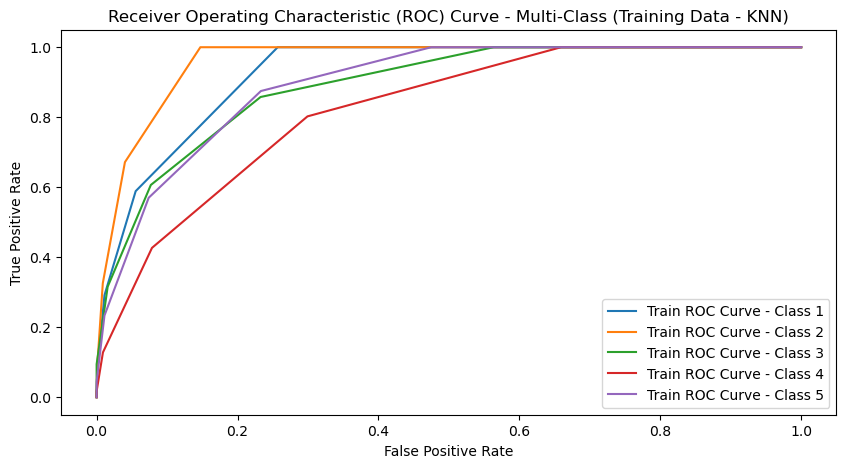

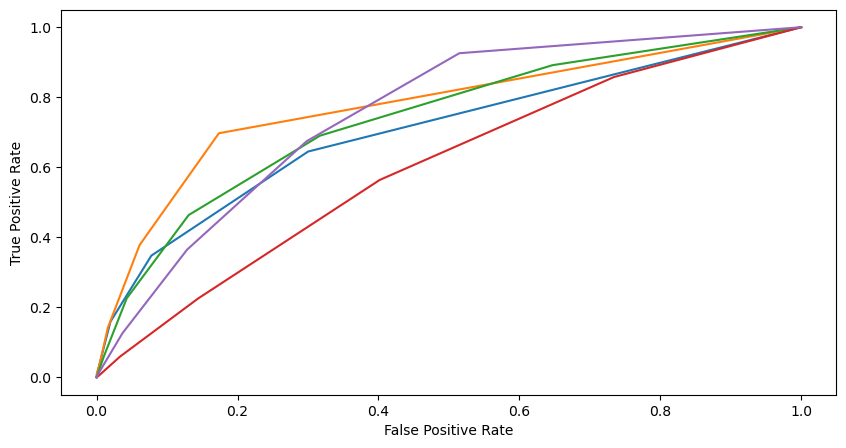

In [ ]:
import sklearn.neighbors as neighbors
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create and train the K-Nearest Neighbors (KNN) model
knn_model_2 = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_model_2.fit(X_train_2, y_train_2)

# Predict
y_train_pred_knn_2 = knn_model_2.predict(X_train_2)
y_test_pred_knn_2 = knn_model_2.predict(X_test_2)

# Calculate metrics for K-Nearest Neighbors (KNN)
train_accuracy_knn_2 = skm.accuracy_score(y_train_2, y_train_pred_knn_2)
train_precision_knn_2 = skm.precision_score(y_train_2, y_train_pred_knn_2, average='macro')
train_recall_knn_2 = skm.recall_score(y_train_2, y_train_pred_knn_2, average='macro')
train_f1_score_knn_2 = skm.f1_score(y_train_2, y_train_pred_knn_2, average="macro")
train_f2_score_knn_2 = skm.fbeta_score(y_train_2, y_train_pred_knn_2, beta=2, average='macro')

test_accuracy_knn_2 = skm.accuracy_score(y_test_2, y_test_pred_knn_2)
test_precision_knn_2 = skm.precision_score(y_test_2, y_test_pred_knn_2, average='macro')
test_recall_knn_2 = skm.recall_score(y_test_2, y_test_pred_knn_2, average='macro')
test_f1_score_knn_2 = skm.f1_score(y_test_2, y_test_pred_knn_2, average="macro")
test_f2_score_knn_2 = skm.fbeta_score(y_test_2, y_test_pred_knn_2, beta=2, average='macro')

# Display results in a tabular format for K-Nearest Neighbors (KNN)
print("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format("", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score"))
print("{:<10} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format("KNN Train", train_accuracy_knn_2, train_precision_knn_2, train_recall_knn_2, train_f1_score_knn_2, train_f2_score_knn_2))
print("{:<10} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format("KNN Test", test_accuracy_knn_2, test_precision_knn_2, test_recall_knn_2, test_f1_score_knn_2, test_f2_score_knn_2))

# Menghitung Confusion Matrix untuk K-Nearest Neighbors Data Train dan Data Test (KNN)
confusion_matrix_train_knn_2 = confusion_matrix(y_train_2, y_train_pred_knn_2)
confusion_matrix_test_knn_2 = confusion_matrix(y_test_2, y_test_pred_knn_2)

# Membuat heatmap untuk Confusion Matrix K-Nearest Neighbors Data Train (KNN)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train_knn_2, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train_2), yticklabels=np.unique(y_train_2))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K-Nearest Neighbors Data Train (KNN)')
plt.show()

# Membuat heatmap untuk Confusion Matrix K-Nearest Neighbors Data Test (KNN)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test_knn_2, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train_2), yticklabels=np.unique(y_train_2))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K-Nearest Neighbors Data Test (KNN)')
plt.show()

# Menghitung probabilitas prediksi untuk setiap kelas
y_train_scores_knn_2 = knn_model_2.predict_proba(X_train_2)
y_test_scores_knn_2 = knn_model_2.predict_proba(X_test_2)

# Menghitung kurva ROC dan AUC untuk setiap kelas pada data latih
fpr_train_knn_2 = dict()
tpr_train_knn_2 = dict()
roc_auc_train_knn_2 = dict()

for i in range(len(np.unique(y_train_2))):
    fpr_train_knn_2[i], tpr_train_knn_2[i], _ = roc_curve(y_train_bin[:, i], y_train_scores_knn_2[:, i])
    roc_auc_train_knn_2[i] = auc(fpr_train_knn_2[i], tpr_train_knn_2[i])

# Plotting kurva ROC AUC untuk setiap kelas pada data latih
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y_train_2))):
    plt.plot(fpr_train_knn_2[i], tpr_train_knn_2[i], label='Train ROC Curve - Class {}'.format(np.unique(y_train_2)[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multi-Class (Training Data - KNN)')
plt.legend(loc="best")

# Menghitung kurva ROC dan AUC untuk setiap kelas pada data uji
fpr_test_knn_2 = dict()
tpr_test_knn_2 = dict()
roc_auc_test_knn_2 = dict()

for i in range(len(np.unique(y_train_2))):
    fpr_test_knn_2[i], tpr_test_knn_2[i], _ = roc_curve(y_test_bin[:, i], y_test_scores_knn_2[:, i])
    roc_auc_test_knn_2[i] = auc(fpr_test_knn_2[i], tpr_test_knn_2[i])

# Plotting kurva ROC AUC untuk setiap kelas pada data uji
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y_train_2))):
    plt.plot(fpr_test_knn_2[i], tpr_test_knn_2[i], label='Test ROC Curve - Class {}'.format(np.unique(y_train_2)[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title


**8.3 Compare All model and make Hyper Parameter for The Best Model**

Akan dilakukan hyper parameter tunning yaitu pada model terbaik yang dipilih yaitu **Random forest** model dengan **Label encoding** karena pada saat dibandingkan dengan model random forest one hot encoding dapat dilihat nilai accuracy, precision, recall, F1,F2 score data train RF label encoding jauh lebih lebih besar yaitu accuracy 94% data train sedangkan untuk RF one hot encoding accuracy 89% data train.

Hyper parameter ->
n_estimators=100,
**max_depth=15** ,
min_samples_split=5,
min_samples_leaf=1

                                Accuracy   Precision  Recall     F1 Score   F2 Score  
Random Forest Train (rf_model_2a) 0.9460     0.9593     0.9367     0.9454     0.9396    
Random Forest Test (rf_model_2a)  0.7547     0.7505     0.7247     0.7293     0.7247    


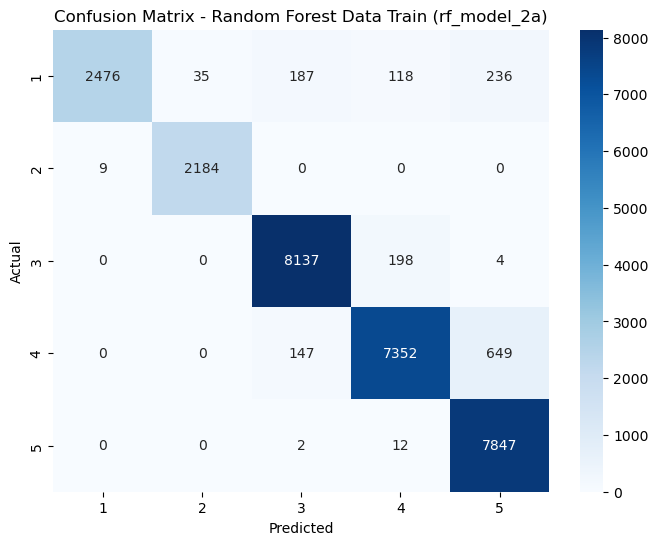

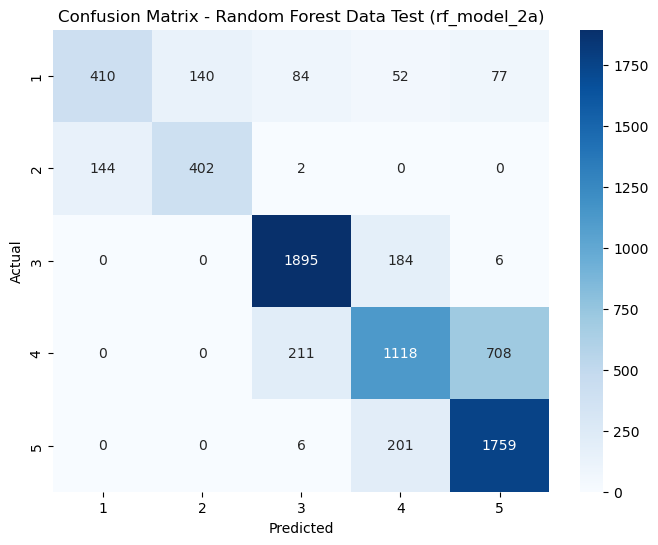

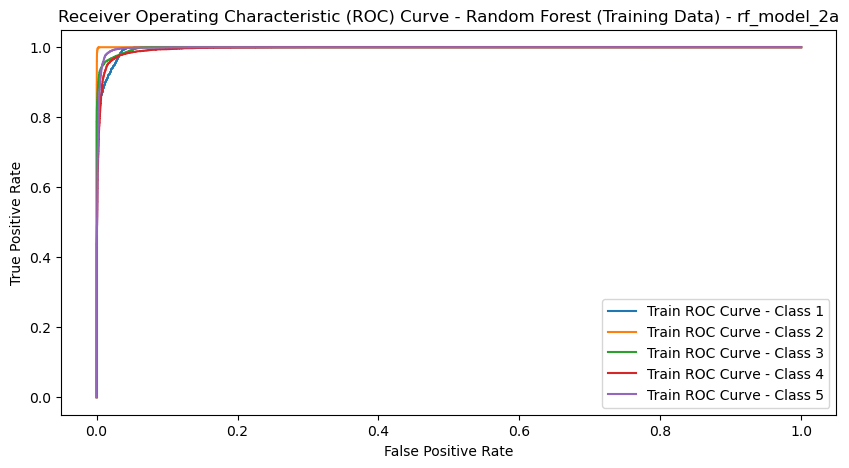

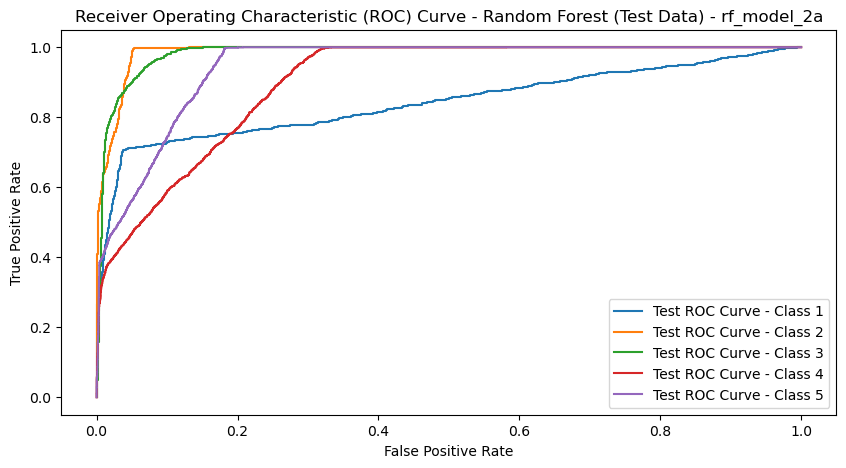

In [ ]:
import sklearn.ensemble as ske
import sklearn.metrics as skm
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create and train the Random Forest model (rf_model_2a)
rf_model_2a = ske.RandomForestClassifier(verbose=0, random_state=0, n_jobs=-1, class_weight='balanced_subsample',
                                      n_estimators=100, max_depth=15, min_samples_split=5, min_samples_leaf=1)
rf_model_2a.fit(X_train_2, y_train_2)

# Predict
y_train_pred_rf2a = rf_model_2a.predict(X_train_2)
y_test_pred_rf2a = rf_model_2a.predict(X_test_2)

# Calculate metrics for Random Forest (rf_model_2a)
train_accuracy_rf2a = skm.accuracy_score(y_train_2, y_train_pred_rf2a)
train_precision_rf2a = skm.precision_score(y_train_2, y_train_pred_rf2a, average='macro')
train_recall_rf2a = skm.recall_score(y_train_2, y_train_pred_rf2a, average='macro')
train_f1_score_rf2a = skm.f1_score(y_train_2, y_train_pred_rf2a, average="macro")
train_f2_score_rf2a = skm.fbeta_score(y_train_2, y_train_pred_rf2a, beta=2, average='macro')

test_accuracy_rf2a = skm.accuracy_score(y_test_2, y_test_pred_rf2a)
test_precision_rf2a = skm.precision_score(y_test_2, y_test_pred_rf2a, average='macro')
test_recall_rf2a = skm.recall_score(y_test_2, y_test_pred_rf2a, average='macro')
test_f1_score_rf2a = skm.f1_score(y_test_2, y_test_pred_rf2a, average="macro")
test_f2_score_rf2a = skm.fbeta_score(y_test_2, y_test_pred_rf2a, beta=2, average='macro')

# Display results in a tabular format for Random Forest (rf_model_2a)
print("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format("                               ", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score"))
print("{:<10} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format("Random Forest Train (rf_model_2a)", train_accuracy_rf2a, train_precision_rf2a, train_recall_rf2a, train_f1_score_rf2a, train_f2_score_rf2a))
print("{:<10} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format("Random Forest Test (rf_model_2a) ", test_accuracy_rf2a, test_precision_rf2a, test_recall_rf2a, test_f1_score_rf2a, test_f2_score_rf2a))

# Menghitung Confusion Matrix untuk Random Forest Data Train dan Data Test (rf_model_2a)
confusion_matrix_train_rf2a = confusion_matrix(y_train_2, y_train_pred_rf2a)
confusion_matrix_test_rf2a = confusion_matrix(y_test_2, y_test_pred_rf2a)

# Membuat heatmap untuk Confusion Matrix Random Forest Data Train (rf_model_2a)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train_rf2a, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train_2), yticklabels=np.unique(y_train_2))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Data Train (rf_model_2a)')
plt.show()

# Membuat heatmap untuk Confusion Matrix Random Forest Data Test (rf_model_2a)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test_rf2a, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train_2), yticklabels=np.unique(y_train_2))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Data Test (rf_model_2a)')
plt.show()

# Menghitung probabilitas prediksi untuk setiap kelas
y_train_bin = label_binarize(y_train_2, classes=np.unique(y_train_2))
y_test_bin = label_binarize(y_test_2, classes=np.unique(y_train_2))
y_train_scores_rf2a = rf_model_2a.predict_proba(X_train_2)
y_test_scores_rf2a = rf_model_2a.predict_proba(X_test_2)

# Menghitung probabilitas prediksi untuk setiap kelas
y_train_scores_rf2a = rf_model_2a.predict_proba(X_train_2)
y_test_scores_rf2a = rf_model_2a.predict_proba(X_test_2)  # Menggunakan X_test_2

# Menghitung kurva ROC dan AUC untuk setiap kelas pada data latih
fpr_train_rf2a = dict()
tpr_train_rf2a = dict()
roc_auc_train_rf2a = dict()

for i in range(len(np.unique(y_train_2))):
    fpr_train_rf2a[i], tpr_train_rf2a[i], _ = roc_curve(y_train_bin[:, i], y_train_scores_rf2a[:, i])
    roc_auc_train_rf2a[i] = auc(fpr_train_rf2a[i], tpr_train_rf2a[i])

# Plotting kurva ROC AUC untuk setiap kelas pada data latih
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y_train_2))):
    plt.plot(fpr_train_rf2a[i], tpr_train_rf2a[i], label='Train ROC Curve - Class {}'.format(np.unique(y_train_2)[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest (Training Data) - rf_model_2a')
plt.legend(loc="best")


# Menghitung kurva ROC dan AUC untuk setiap kelas pada data uji
fpr_test_rf2a = dict()
tpr_test_rf2a = dict()
roc_auc_test_rf2a = dict()

for i in range(len(np.unique(y_train_2))):
    fpr_test_rf2a[i], tpr_test_rf2a[i], _ = roc_curve(y_test_bin[:, i], y_test_scores_rf2a[:, i])
    roc_auc_test_rf2a[i] = auc(fpr_test_rf2a[i], tpr_test_rf2a[i])

# Plotting kurva ROC AUC untuk setiap kelas pada data uji
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y_train_2))):
    plt.plot(fpr_test_rf2a[i], tpr_test_rf2a[i], label='Test ROC Curve - Class {}'.format(np.unique(y_train_2)[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest (Test Data) - rf_model_2a')
plt.legend(loc="best")

plt.show()


Hyper parameter ->
n_estimators=100,
**max_depth=20** ,
min_samples_split=5,
min_samples_leaf=1

                                Accuracy   Precision  Recall     F1 Score   F2 Score  
Random Forest Train (rf_model_2b) 0.9941     0.9950     0.9908     0.9928     0.9916    
Random Forest Test (rf_model_2b)  0.7529     0.7490     0.7220     0.7309     0.7245    


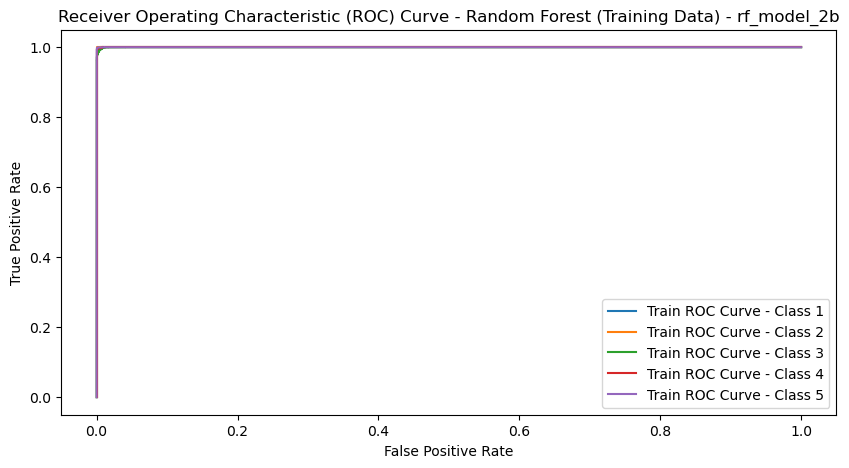

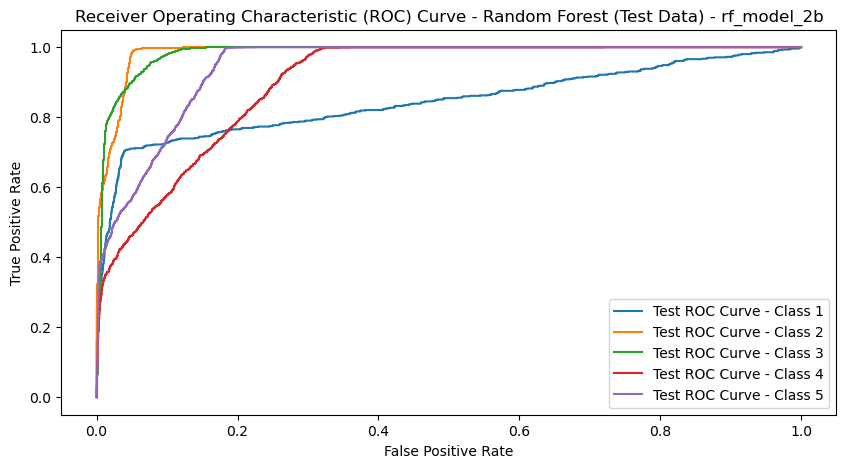

In [ ]:
# Create and train the Random Forest model (rf_model_2b)
rf_model_2b = ske.RandomForestClassifier(verbose=0, random_state=0, n_jobs=-1, class_weight='balanced_subsample',
                                      n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=1)
rf_model_2b.fit(X_train_2, y_train_2)

# Predict
y_train_pred_rf2b = rf_model_2b.predict(X_train_2)
y_test_pred_rf2b = rf_model_2b.predict(X_test_2)

# Calculate metrics for Random Forest (rf_model_2b)
train_accuracy_rf2b = skm.accuracy_score(y_train_2, y_train_pred_rf2b)
train_precision_rf2b = skm.precision_score(y_train_2, y_train_pred_rf2b, average='macro')
train_recall_rf2b = skm.recall_score(y_train_2, y_train_pred_rf2b, average='macro')
train_f1_score_rf2b = skm.f1_score(y_train_2, y_train_pred_rf2b, average="macro")
train_f2_score_rf2b = skm.fbeta_score(y_train_2, y_train_pred_rf2b, beta=2, average='macro')

test_accuracy_rf2b = skm.accuracy_score(y_test_2, y_test_pred_rf2b)
test_precision_rf2b = skm.precision_score(y_test_2, y_test_pred_rf2b, average='macro')
test_recall_rf2b = skm.recall_score(y_test_2, y_test_pred_rf2b, average='macro')
test_f1_score_rf2b = skm.f1_score(y_test_2, y_test_pred_rf2b, average="macro")
test_f2_score_rf2b = skm.fbeta_score(y_test_2, y_test_pred_rf2b, beta=2, average='macro')

# Display results in a tabular format for Random Forest (rf_model_2b)
print("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format("                               ", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score"))
print("{:<10} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format("Random Forest Train (rf_model_2b)", train_accuracy_rf2b, train_precision_rf2b, train_recall_rf2b, train_f1_score_rf2b, train_f2_score_rf2b))
print("{:<10} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format("Random Forest Test (rf_model_2b) ", test_accuracy_rf2b, test_precision_rf2b, test_recall_rf2b, test_f1_score_rf2b, test_f2_score_rf2b))

# Menghitung probabilitas prediksi untuk setiap kelas
y_train_bin = label_binarize(y_train_2, classes=np.unique(y_train_2))
y_test_bin = label_binarize(y_test_2, classes=np.unique(y_train_2))
y_train_scores_rf2b = rf_model_2b.predict_proba(X_train_2)
y_test_scores_rf2b = rf_model_2b.predict_proba(X_test_2)

# Menghitung kurva ROC dan AUC untuk setiap kelas pada data latih
fpr_train_rf2b = dict()
tpr_train_rf2b = dict()
roc_auc_train_rf2b = dict()

for i in range(len(np.unique(y_train_2))):
    fpr_train_rf2b[i], tpr_train_rf2b[i], _ = roc_curve(y_train_bin[:, i], y_train_scores_rf2b[:, i])
    roc_auc_train_rf2b[i] = auc(fpr_train_rf2b[i], tpr_train_rf2b[i])

# Plotting kurva ROC AUC untuk setiap kelas pada data latih
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y_train_2))):
    plt.plot(fpr_train_rf2b[i], tpr_train_rf2b[i], label='Train ROC Curve - Class {}'.format(np.unique(y_train_2)[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest (Training Data) - rf_model_2b')
plt.legend(loc="best")

# Menghitung kurva ROC dan AUC untuk setiap kelas pada data uji
fpr_test_rf2b = dict()
tpr_test_rf2b = dict()
roc_auc_test_rf2b = dict()

for i in range(len(np.unique(y_train_2))):
    fpr_test_rf2b[i], tpr_test_rf2b[i], _ = roc_curve(y_test_bin[:, i], y_test_scores_rf2b[:, i])
    roc_auc_test_rf2b[i] = auc(fpr_test_rf2b[i], tpr_test_rf2b[i])

# Plotting kurva ROC AUC untuk setiap kelas pada data uji
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y_train_2))):
    plt.plot(fpr_test_rf2b[i], tpr_test_rf2b[i], label='Test ROC Curve - Class {}'.format(np.unique(y_train_2)[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest (Test Data) - rf_model_2b')
plt.legend(loc="best")

plt.show()

Hyper parameter ->
n_estimators=100,
**max_depth=25** ,
min_samples_split=5,
min_samples_leaf=1

                                Accuracy   Precision  Recall     F1 Score   F2 Score  
Random Forest Train (rf_model_2c) 0.9965     0.9966     0.9942     0.9954     0.9947    
Random Forest Test (rf_model_2c)  0.7500     0.7464     0.7179     0.7283     0.7212    


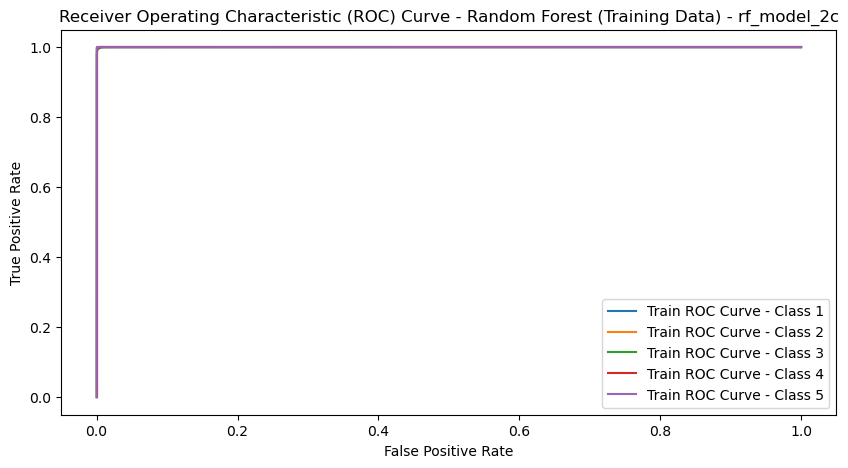

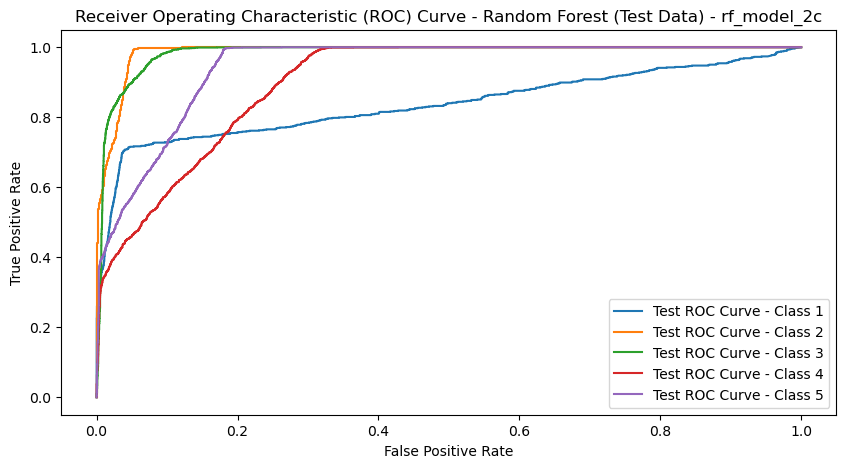

In [ ]:
# Create and train the Random Forest model (rf_model_2c)
rf_model_2c = ske.RandomForestClassifier(verbose=0, random_state=0, n_jobs=-1, class_weight='balanced_subsample',
                                      n_estimators=100, max_depth=25, min_samples_split=5, min_samples_leaf=1)
rf_model_2c.fit(X_train_2, y_train_2)

# Predict
y_train_pred_rf2c = rf_model_2c.predict(X_train_2)
y_test_pred_rf2c = rf_model_2c.predict(X_test_2)

# Calculate metrics for Random Forest (rf_model_2c)
train_accuracy_rf2c = skm.accuracy_score(y_train_2, y_train_pred_rf2c)
train_precision_rf2c = skm.precision_score(y_train_2, y_train_pred_rf2c, average='macro')
train_recall_rf2c = skm.recall_score(y_train_2, y_train_pred_rf2c, average='macro')
train_f1_score_rf2c = skm.f1_score(y_train_2, y_train_pred_rf2c, average="macro")
train_f2_score_rf2c = skm.fbeta_score(y_train_2, y_train_pred_rf2c, beta=2, average='macro')

test_accuracy_rf2c = skm.accuracy_score(y_test_2, y_test_pred_rf2c)
test_precision_rf2c = skm.precision_score(y_test_2, y_test_pred_rf2c, average='macro')
test_recall_rf2c = skm.recall_score(y_test_2, y_test_pred_rf2c, average='macro')
test_f1_score_rf2c = skm.f1_score(y_test_2, y_test_pred_rf2c, average="macro")
test_f2_score_rf2c = skm.fbeta_score(y_test_2, y_test_pred_rf2c, beta=2, average='macro')

# Display results in a tabular format for Random Forest (rf_model_2c)
print("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format("                               ", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score"))
print("{:<10} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format("Random Forest Train (rf_model_2c)", train_accuracy_rf2c, train_precision_rf2c, train_recall_rf2c, train_f1_score_rf2c, train_f2_score_rf2c))
print("{:<10} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format("Random Forest Test (rf_model_2c) ", test_accuracy_rf2c, test_precision_rf2c, test_recall_rf2c, test_f1_score_rf2c, test_f2_score_rf2c))

# Menghitung probabilitas prediksi untuk setiap kelas
y_train_bin = label_binarize(y_train_2, classes=np.unique(y_train_2))
y_test_bin = label_binarize(y_test_2, classes=np.unique(y_train_2))
y_train_scores_rf2c = rf_model_2c.predict_proba(X_train_2)
y_test_scores_rf2c = rf_model_2c.predict_proba(X_test_2)

# Menghitung kurva ROC dan AUC untuk setiap kelas pada data latih
fpr_train_rf2c = dict()
tpr_train_rf2c = dict()
roc_auc_train_rf2c = dict()

for i in range(len(np.unique(y_train_2))):
    fpr_train_rf2c[i], tpr_train_rf2c[i], _ = roc_curve(y_train_bin[:, i], y_train_scores_rf2c[:, i])
    roc_auc_train_rf2c[i] = auc(fpr_train_rf2c[i], tpr_train_rf2c[i])

# Plotting kurva ROC AUC untuk setiap kelas pada data latih
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y_train_2))):
    plt.plot(fpr_train_rf2c[i], tpr_train_rf2c[i], label='Train ROC Curve - Class {}'.format(np.unique(y_train_2)[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest (Training Data) - rf_model_2c')
plt.legend(loc="best")

# Menghitung kurva ROC dan AUC untuk setiap kelas pada data uji
fpr_test_rf2c = dict()
tpr_test_rf2c = dict()
roc_auc_test_rf2c = dict()

for i in range(len(np.unique(y_train_2))):
    fpr_test_rf2c[i], tpr_test_rf2c[i], _ = roc_curve(y_test_bin[:, i], y_test_scores_rf2c[:, i])
    roc_auc_test_rf2c[i] = auc(fpr_test_rf2c[i], tpr_test_rf2c[i])

# Plotting kurva ROC AUC untuk setiap kelas pada data uji
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y_train_2))):
    plt.plot(fpr_test_rf2c[i], tpr_test_rf2c[i], label='Test ROC Curve - Class {}'.format(np.unique(y_train_2)[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest (Test Data) - rf_model_2c')
plt.legend(loc="best")

plt.show()


Hyper parameter ->
**n_estimators=200**,
max_depth=15,
min_samples_split=5,
min_samples_leaf=1

                                Accuracy   Precision  Recall     F1 Score   F2 Score  
Random Forest Train (rf_model_2d) 0.9943     0.9949     0.9905     0.9926     0.9913    
Random Forest Test (rf_model_2d)  0.7524     0.7470     0.7206     0.7287     0.7226    


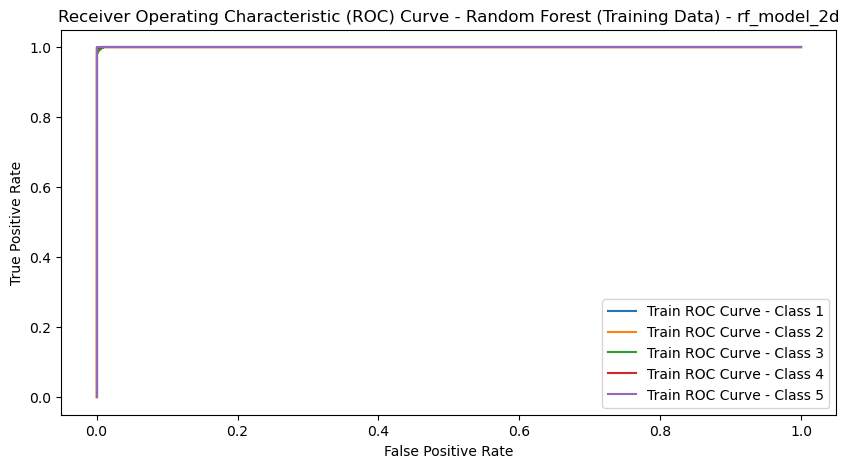

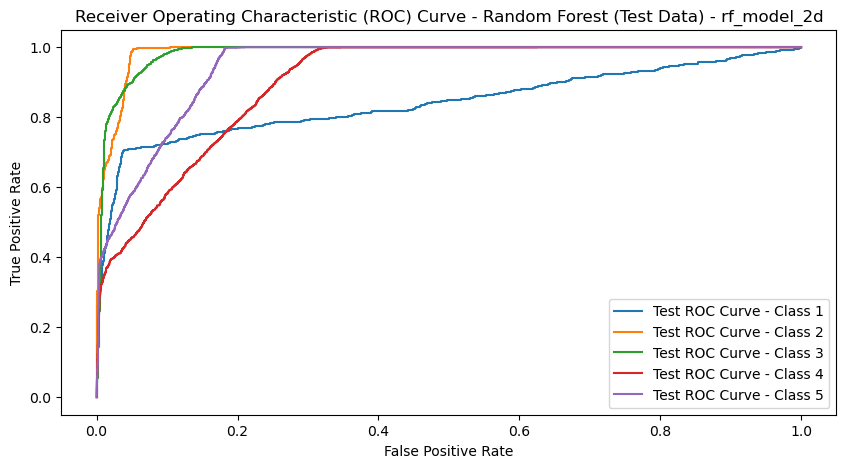

In [ ]:
# Create and train the Random Forest model (rf_model_2d)
rf_model_2d = ske.RandomForestClassifier(verbose=0, random_state=0, n_jobs=-1, class_weight='balanced_subsample',
                                      n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=1)
rf_model_2d.fit(X_train_2, y_train_2)

# Predict
y_train_pred_rf2d = rf_model_2d.predict(X_train_2)
y_test_pred_rf2d = rf_model_2d.predict(X_test_2)

# Calculate metrics for Random Forest (rf_model_2d)
train_accuracy_rf2d = skm.accuracy_score(y_train_2, y_train_pred_rf2d)
train_precision_rf2d = skm.precision_score(y_train_2, y_train_pred_rf2d, average='macro')
train_recall_rf2d = skm.recall_score(y_train_2, y_train_pred_rf2d, average='macro')
train_f1_score_rf2d = skm.f1_score(y_train_2, y_train_pred_rf2d, average="macro")
train_f2_score_rf2d = skm.fbeta_score(y_train_2, y_train_pred_rf2d, beta=2, average='macro')

test_accuracy_rf2d = skm.accuracy_score(y_test_2, y_test_pred_rf2d)
test_precision_rf2d = skm.precision_score(y_test_2, y_test_pred_rf2d, average='macro')
test_recall_rf2d = skm.recall_score(y_test_2, y_test_pred_rf2d, average='macro')
test_f1_score_rf2d = skm.f1_score(y_test_2, y_test_pred_rf2d, average="macro")
test_f2_score_rf2d = skm.fbeta_score(y_test_2, y_test_pred_rf2d, beta=2, average='macro')

# Display results in a tabular format for Random Forest (rf_model_2d)
print("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format("                               ", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score"))
print("{:<10} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format("Random Forest Train (rf_model_2d)", train_accuracy_rf2d, train_precision_rf2d, train_recall_rf2d, train_f1_score_rf2d, train_f2_score_rf2d))
print("{:<10} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format("Random Forest Test (rf_model_2d) ", test_accuracy_rf2d, test_precision_rf2d, test_recall_rf2d, test_f1_score_rf2d, test_f2_score_rf2d))

# Menghitung probabilitas prediksi untuk setiap kelas
y_train_bin = label_binarize(y_train_2, classes=np.unique(y_train_2))
y_test_bin = label_binarize(y_test_2, classes=np.unique(y_train_2))
y_train_scores_rf2d = rf_model_2d.predict_proba(X_train_2)
y_test_scores_rf2d = rf_model_2d.predict_proba(X_test_2)

# Menghitung kurva ROC dan AUC untuk setiap kelas pada data latih
fpr_train_rf2d = dict()
tpr_train_rf2d = dict()
roc_auc_train_rf2d = dict()

for i in range(len(np.unique(y_train_2))):
    fpr_train_rf2d[i], tpr_train_rf2d[i], _ = roc_curve(y_train_bin[:, i], y_train_scores_rf2d[:, i])
    roc_auc_train_rf2d[i] = auc(fpr_train_rf2d[i], tpr_train_rf2d[i])

# Plotting kurva ROC AUC untuk setiap kelas pada data latih
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y_train_2))):
    plt.plot(fpr_train_rf2d[i], tpr_train_rf2d[i], label='Train ROC Curve - Class {}'.format(np.unique(y_train_2)[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest (Training Data) - rf_model_2d')
plt.legend(loc="best")

# Menghitung kurva ROC dan AUC untuk setiap kelas pada data uji
fpr_test_rf2d = dict()
tpr_test_rf2d = dict()
roc_auc_test_rf2d = dict()

for i in range(len(np.unique(y_train_2))):
    fpr_test_rf2d[i], tpr_test_rf2d[i], _ = roc_curve(y_test_bin[:, i], y_test_scores_rf2d[:, i])
    roc_auc_test_rf2d[i] = auc(fpr_test_rf2d[i], tpr_test_rf2d[i])

# Plotting kurva ROC AUC untuk setiap kelas pada data uji
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y_train_2))):
    plt.plot(fpr_test_rf2d[i], tpr_test_rf2d[i], label='Test ROC Curve - Class {}'.format(np.unique(y_train_2)[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest (Test Data) - rf_model_2d')
plt.legend(loc="best")

plt.show()

Hyper parameter ->
**n_estimators=300**,
max_depth=15,
min_samples_split=5,
min_samples_leaf=1

                                Accuracy   Precision  Recall     F1 Score   F2 Score  
Random Forest Train (rf_model_2e) 0.9491     0.9624     0.9389     0.9481     0.9420    
Random Forest Test (rf_model_2e)  0.7532     0.7495     0.7234     0.7279     0.7233    


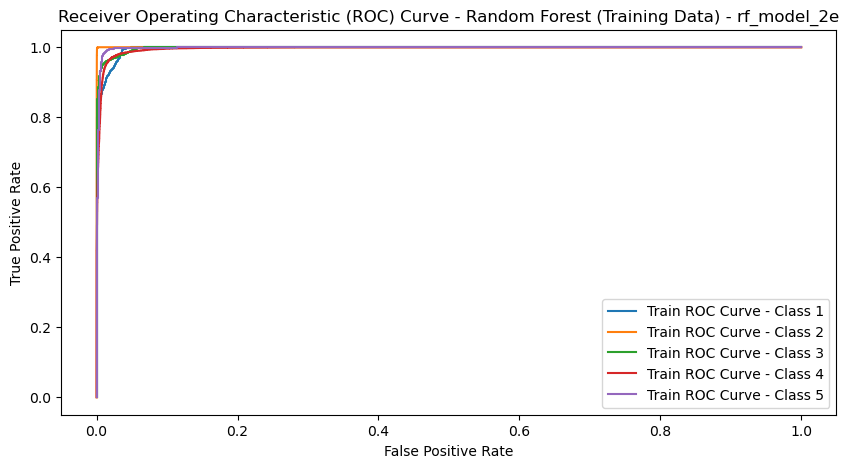

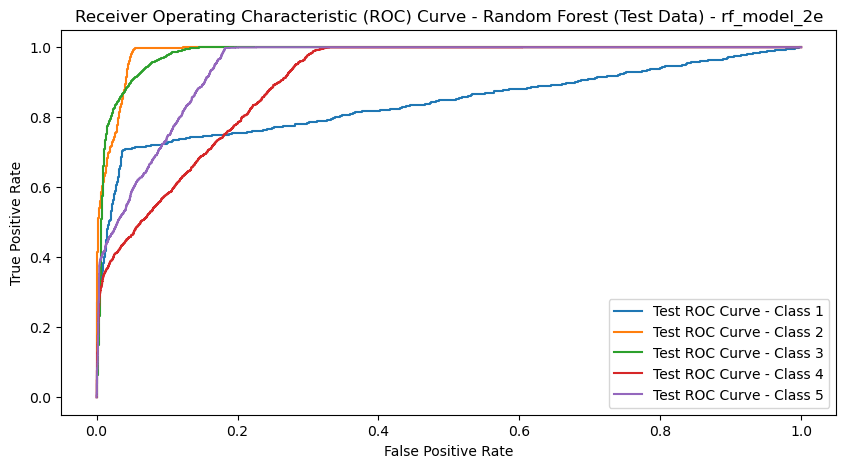

In [ ]:
# Create and train the Random Forest model (rf_model_2e)
rf_model_2e = ske.RandomForestClassifier(verbose=0, random_state=0, n_jobs=-1, class_weight='balanced_subsample',
                                      n_estimators=300, max_depth=15, min_samples_split=5, min_samples_leaf=1)
rf_model_2e.fit(X_train_2, y_train_2)

# Predict
y_train_pred_rf2e = rf_model_2e.predict(X_train_2)
y_test_pred_rf2e = rf_model_2e.predict(X_test_2)

# Calculate metrics for Random Forest (rf_model_2e)
train_accuracy_rf2e = skm.accuracy_score(y_train_2, y_train_pred_rf2e)
train_precision_rf2e = skm.precision_score(y_train_2, y_train_pred_rf2e, average='macro')
train_recall_rf2e = skm.recall_score(y_train_2, y_train_pred_rf2e, average='macro')
train_f1_score_rf2e = skm.f1_score(y_train_2, y_train_pred_rf2e, average="macro")
train_f2_score_rf2e = skm.fbeta_score(y_train_2, y_train_pred_rf2e, beta=2, average='macro')

test_accuracy_rf2e = skm.accuracy_score(y_test_2, y_test_pred_rf2e)
test_precision_rf2e = skm.precision_score(y_test_2, y_test_pred_rf2e, average='macro')
test_recall_rf2e = skm.recall_score(y_test_2, y_test_pred_rf2e, average='macro')
test_f1_score_rf2e = skm.f1_score(y_test_2, y_test_pred_rf2e, average="macro")
test_f2_score_rf2e = skm.fbeta_score(y_test_2, y_test_pred_rf2e, beta=2, average='macro')

# Display results in a tabular format for Random Forest (rf_model_2e)
print("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format("                               ", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score"))
print("{:<10} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format("Random Forest Train (rf_model_2e)", train_accuracy_rf2e, train_precision_rf2e, train_recall_rf2e, train_f1_score_rf2e, train_f2_score_rf2e))
print("{:<10} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format("Random Forest Test (rf_model_2e) ", test_accuracy_rf2e, test_precision_rf2e, test_recall_rf2e, test_f1_score_rf2e, test_f2_score_rf2e))

# Menghitung probabilitas prediksi untuk setiap kelas
y_train_bin = label_binarize(y_train_2, classes=np.unique(y_train_2))
y_test_bin = label_binarize(y_test_2, classes=np.unique(y_train_2))
y_train_scores_rf2e = rf_model_2e.predict_proba(X_train_2)
y_test_scores_rf2e = rf_model_2e.predict_proba(X_test_2)

# Menghitung kurva ROC dan AUC untuk setiap kelas pada data latih
fpr_train_rf2e = dict()
tpr_train_rf2e = dict()
roc_auc_train_rf2e = dict()

for i in range(len(np.unique(y_train_2))):
    fpr_train_rf2e[i], tpr_train_rf2e[i], _ = roc_curve(y_train_bin[:, i], y_train_scores_rf2e[:, i])
    roc_auc_train_rf2e[i] = auc(fpr_train_rf2e[i], tpr_train_rf2e[i])

# Plotting kurva ROC AUC untuk setiap kelas pada data latih
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y_train_2))):
    plt.plot(fpr_train_rf2e[i], tpr_train_rf2e[i], label='Train ROC Curve - Class {}'.format(np.unique(y_train_2)[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest (Training Data) - rf_model_2e')
plt.legend(loc="best")

# Menghitung kurva ROC dan AUC untuk setiap kelas pada data uji
fpr_test_rf2e = dict()
tpr_test_rf2e = dict()
roc_auc_test_rf2e = dict()

for i in range(len(np.unique(y_train_2))):
    fpr_test_rf2e[i], tpr_test_rf2e[i], _ = roc_curve(y_test_bin[:, i], y_test_scores_rf2e[:, i])
    roc_auc_test_rf2e[i] = auc(fpr_test_rf2e[i], tpr_test_rf2e[i])

# Plotting kurva ROC AUC untuk setiap kelas pada data uji
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y_train_2))):
    plt.plot(fpr_test_rf2e[i], tpr_test_rf2e[i], label='Test ROC Curve - Class {}'.format(np.unique(y_train_2)[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest (Test Data) - rf_model_2e')
plt.legend(loc="best")

plt.show()

Setelah membuat hyper parameter dan dibandingkan kelima model diatas maka model **Random forest model 2a** yang paling bagus dan tidak overfitting.

# 9. Import Pickle file

**9.1 Scaler**

In [ ]:
import pickle
from sklearn.preprocessing import StandardScaler

# Inisialisasi objek StandardScaler
#sc_X = StandardScaler()

# Menyimpan objek Scaler ke dalam file pickle
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(sc_X2, scaler_file, protocol=4)

# Tutup file
scaler_file.close()

**9.2 Transform**

In [ ]:
import pickle

# Simpan transformasi log 'avg_transaction_value' ke dalam file pickle
with open('log_transformed_ATV.pkl', 'wb') as log_file:
    pickle.dump(log_transformed_ATV, log_file)

# Simpan transformasi log 'points_in_wallet' ke dalam file pickle
with open('log_transformed_PIW.pkl', 'wb') as log_file:
    pickle.dump(log_transformed_PIW, log_file)

# Simpan transformasi log 'avg_time_spent' ke dalam file pickle
with open('log_transformed_ATS.pkl', 'wb') as log_file:
    pickle.dump(log_transformed_ATS, log_file)

# Tutup file
log_file.close()

**9.3 Random Forest Model**

In [ ]:
import pickle

# Simpan model Random Forest ke dalam file pickle
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model_2a, model_file, protocol=4)

# Tutup file
model_file.close()
